# Autoregression, autocorrelation and forecasting

In [1]:
# Import libraries
import logging
import os
import os.path as op
import pathlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne

from subject_number import subject_number
import neurokit2 as nk


c:\Users\dadam\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Check whether there is a presence of autocorrelation in your time series data:
- (EDA raw) 
- EDA raw (5 secs mean)
- EDA SMNA (5 secs mean)

Opening raw data file outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-01\eeg\sub-01_task-rest_proc-filt_raw.fif...
    Range : 0 ... 1980927 =      0.000 ...  3868.998 secs
Ready.
Reading 0 ... 1980927  =      0.000 ...  3868.998 secs...


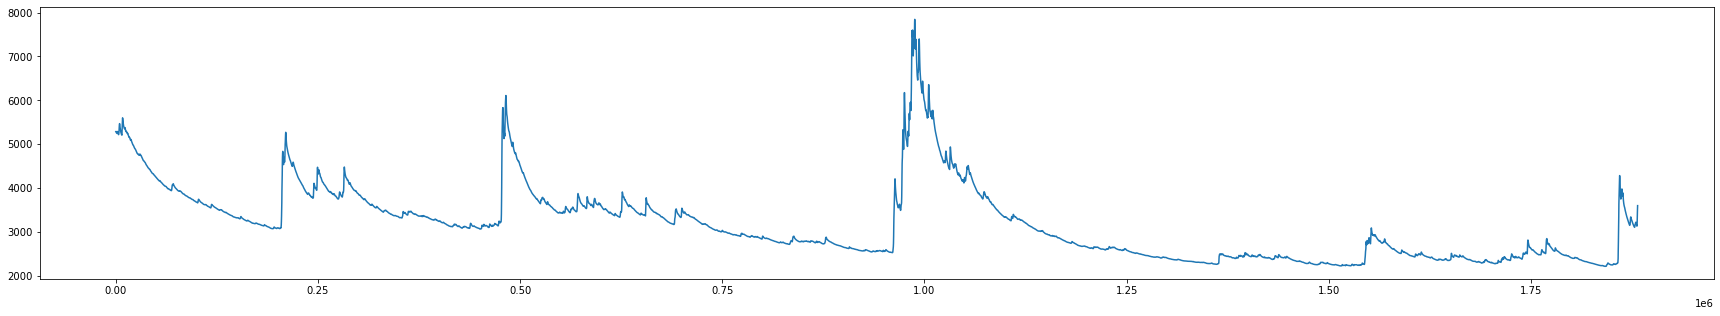

In [2]:
# EDA raw (5 secs mean)
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 5] 

# Open data subject 1
number_subject = '01'

# open .fif filtered raw files
extension = '.fif'
directory = 'outputs/DEAP-bids/derivatives/mne-bids-pipeline/'
fname_fif = op.join(directory, 'sub-' + number_subject , 'eeg',
                    'sub-' + number_subject + '_task-rest_proc-filt_raw' + extension)
raw = mne.io.read_raw_fif(fname_fif, preload=True) 

# Extract just EDA data 
raw_eda = raw.copy().pick_channels(ch_names=['EDA']).get_data()
raw_eda = np.squeeze(raw_eda)
raw_eda = raw_eda[:len(raw_eda)-int(len(raw_eda)/20)]
plt.plot(raw_eda)

Creating a lag plot (compare EDA*t* vs EDA*t+1*)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

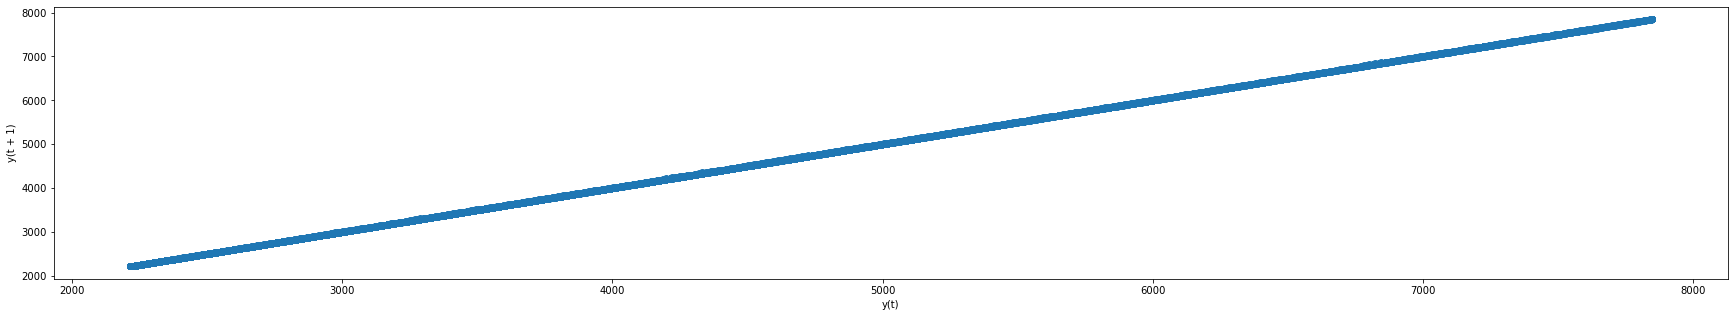

In [3]:
from pandas.plotting import lag_plot
plt.figure()
lag_plot(pd. DataFrame(raw_eda))

Era esperable que haya una correlacion positiva casi perfecta entre **y** e **y t+1** para la data cruda.\


Que pasa si ahora hacemos lo mismo pero sobre la señal de **EDA SMNA** (variable de interés en nuestro estudio) sobre la cual ya se calculo un promedio en ventanas de 5 segundos (con un segundo de overlap, que podria influir en los datos al pensar la correlación entre ventanas)?\

Ademas de eso voy a agregar:
- **Autocorrelation plot** (check  randomness in time series by computing autocorrelations for data values at fluctuating time lags. If time series is nonrandom, then one or more of the autocorrelations will be significantly non-zero.)
- **Partial Autocorroation plot**


Reading C:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-01\eeg\sub-01_task-rest_proc-EDA_epoRejected.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
567 matching events found
No baseline correction applied


C:\Users\dadam\AppData\Local\Temp/ipykernel_15176/3020609557.py:14: RuntimeWarning: This filename (C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-01/eeg/sub-01_task-rest_proc-EDA_epoRejected.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(bp,


01


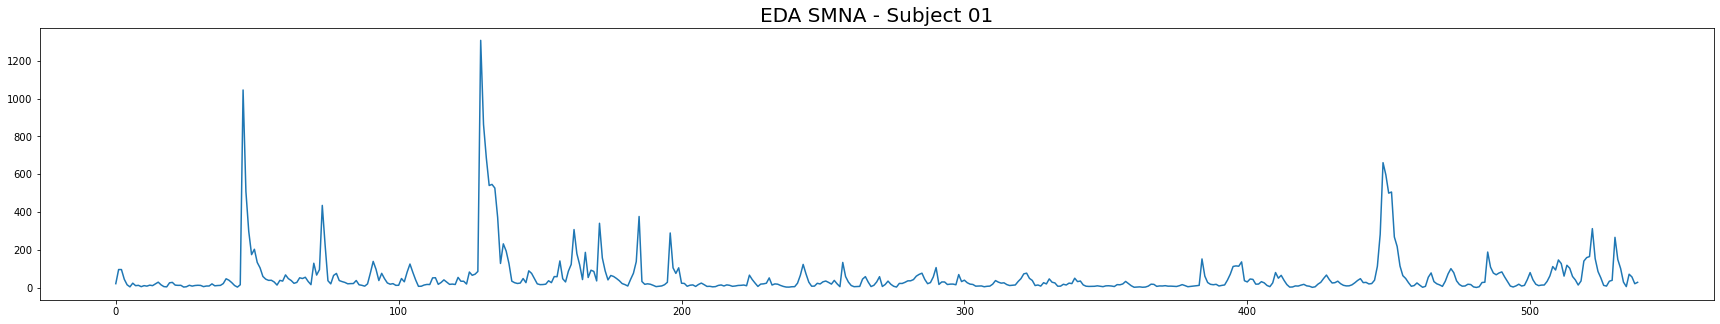

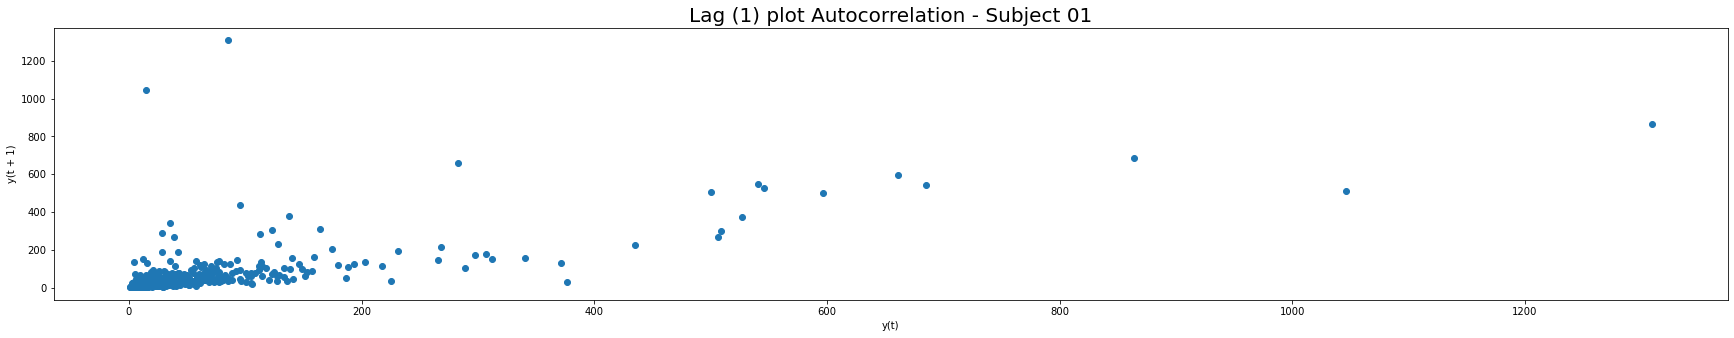

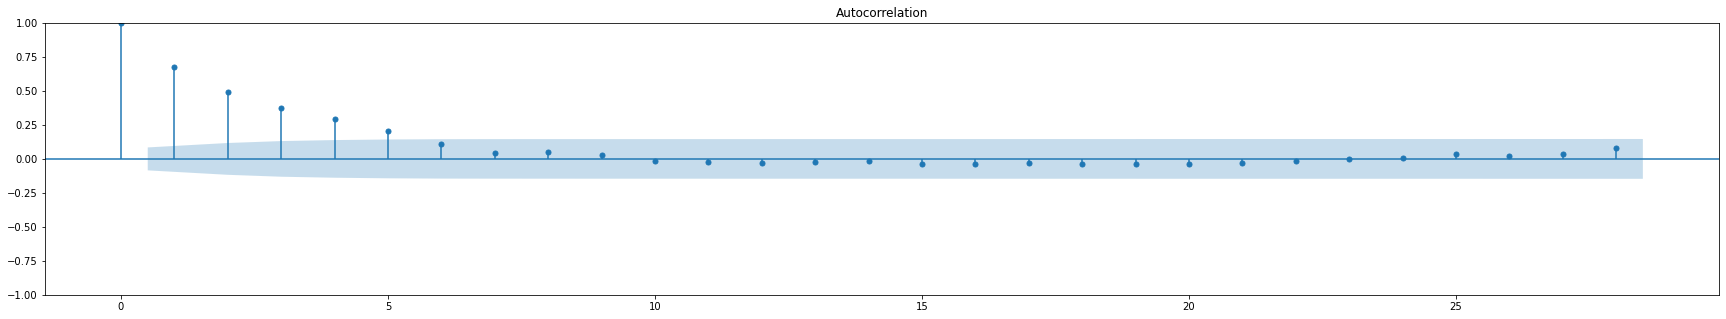

c:\Users\dadam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


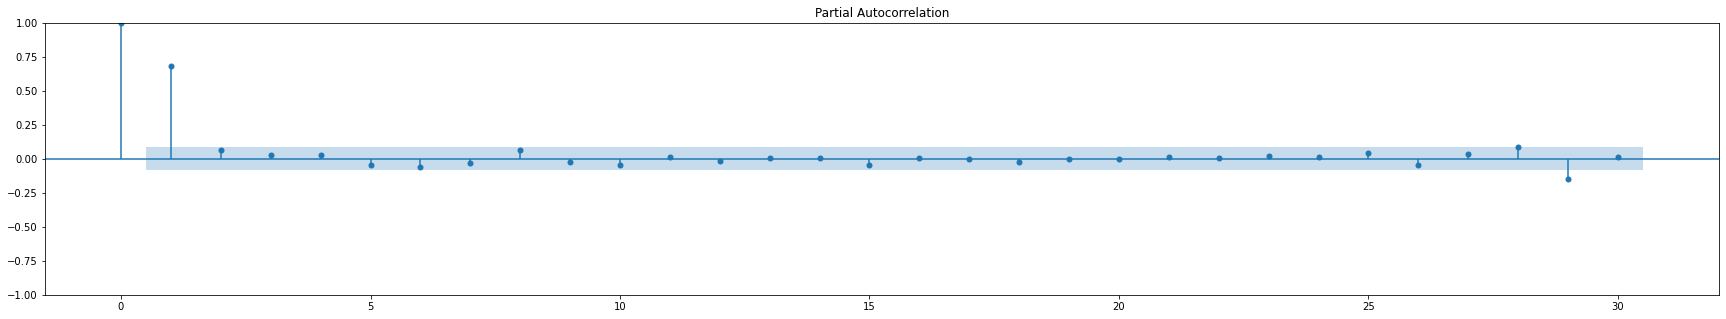

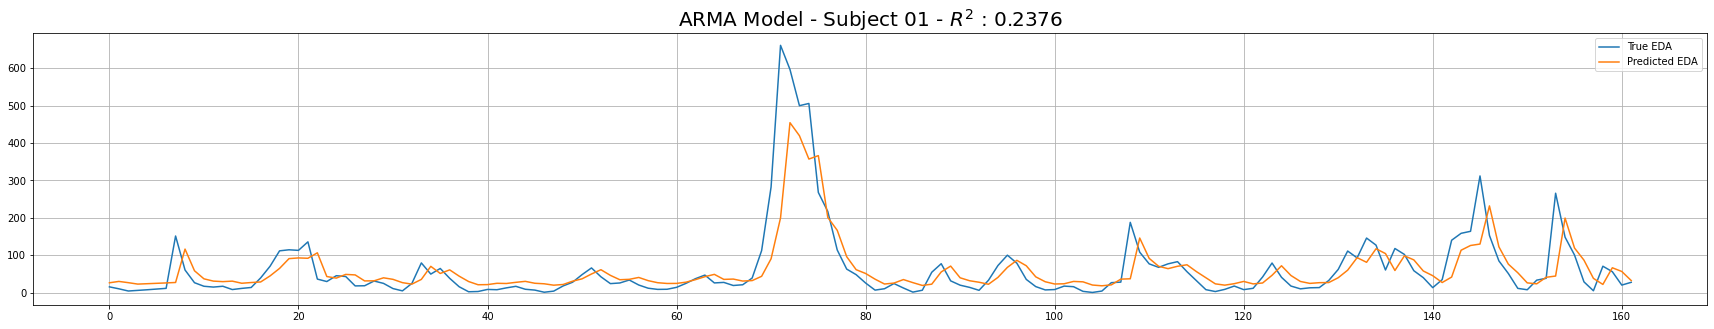

Reading C:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-02\eeg\sub-02_task-rest_proc-EDA_epoRejected.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
490 matching events found
No baseline correction applied


C:\Users\dadam\AppData\Local\Temp/ipykernel_15176/3020609557.py:14: RuntimeWarning: This filename (C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-02/eeg/sub-02_task-rest_proc-EDA_epoRejected.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(bp,


02


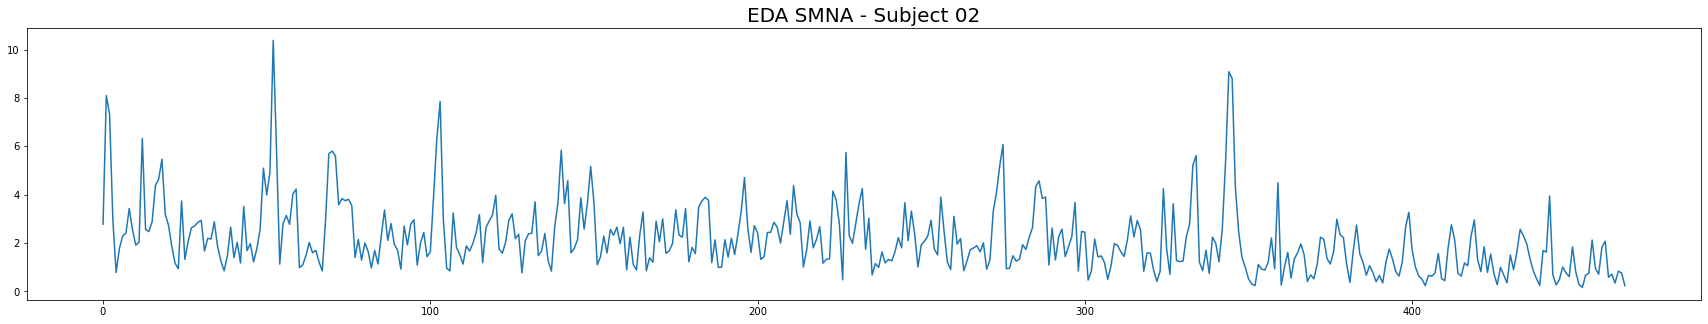

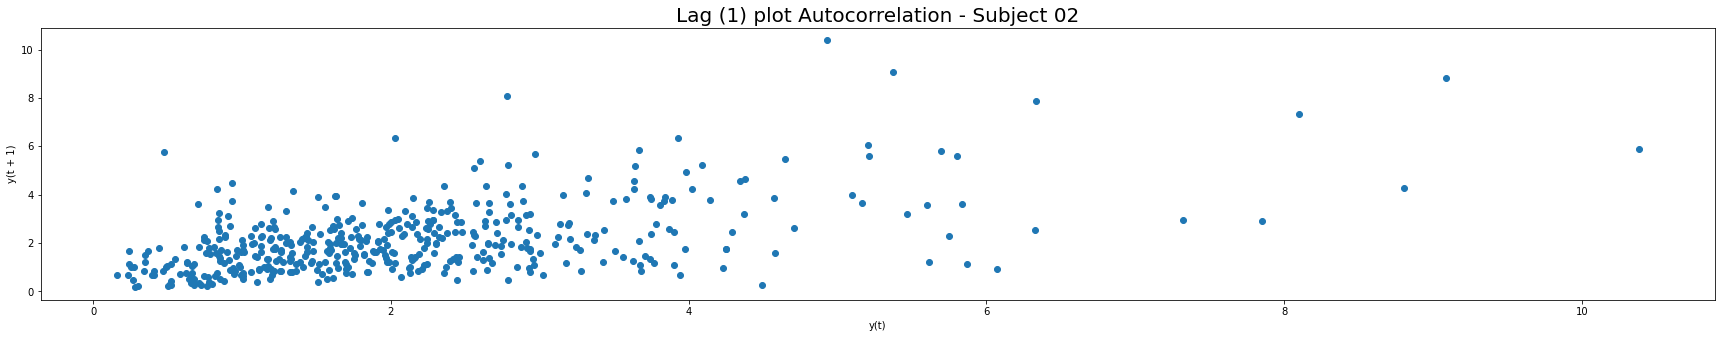

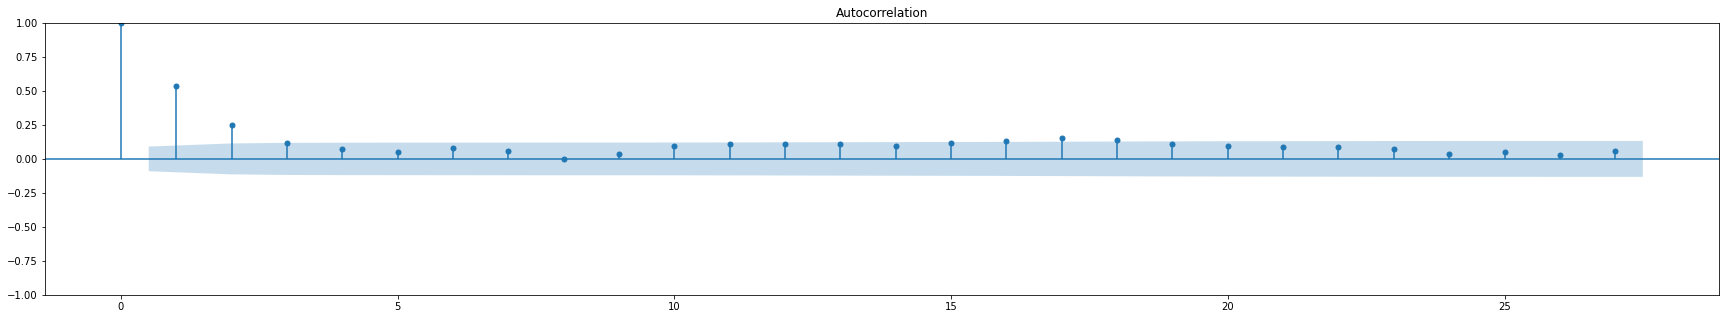

c:\Users\dadam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


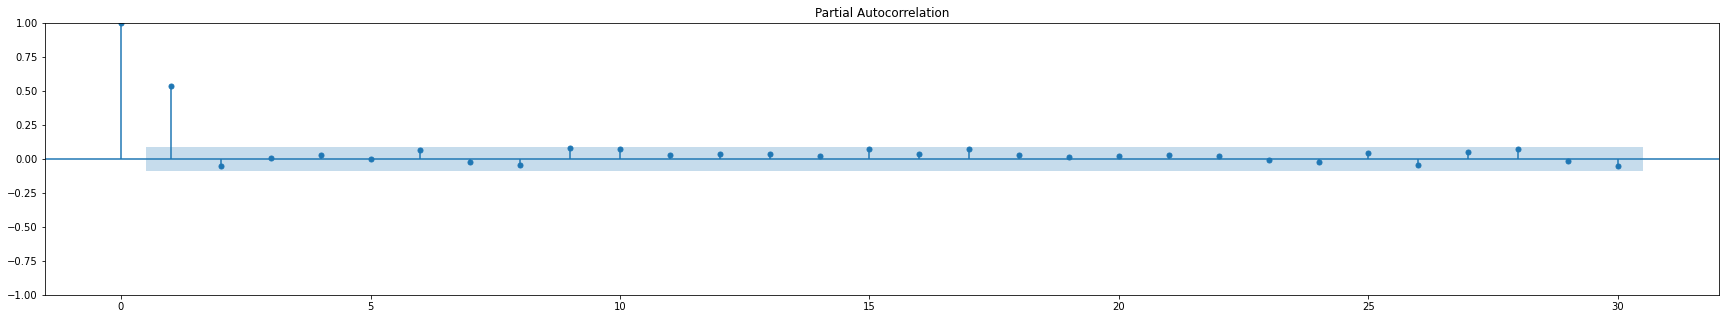

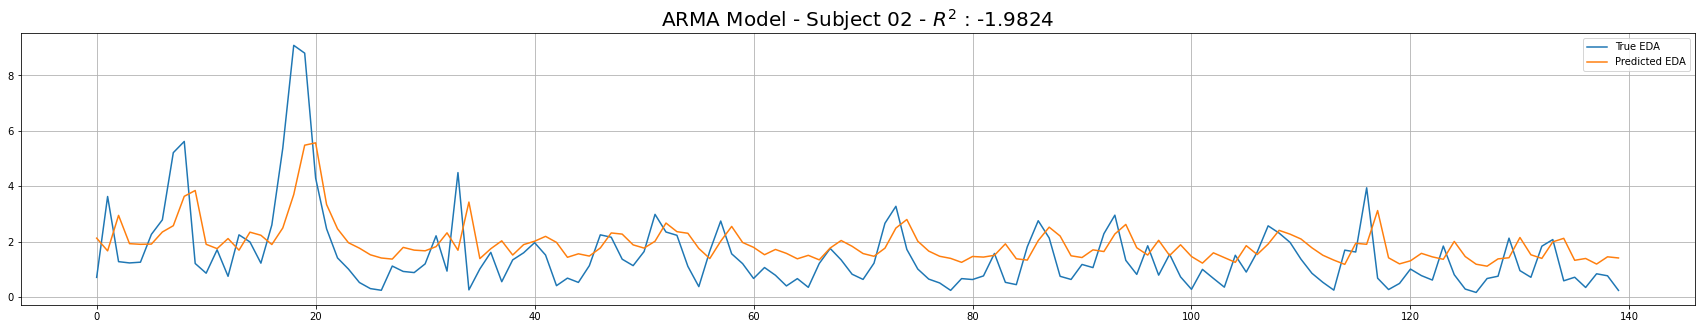

Reading C:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-03\eeg\sub-03_task-rest_proc-EDA_epoRejected.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
503 matching events found
No baseline correction applied


C:\Users\dadam\AppData\Local\Temp/ipykernel_15176/3020609557.py:14: RuntimeWarning: This filename (C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-03/eeg/sub-03_task-rest_proc-EDA_epoRejected.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(bp,


03


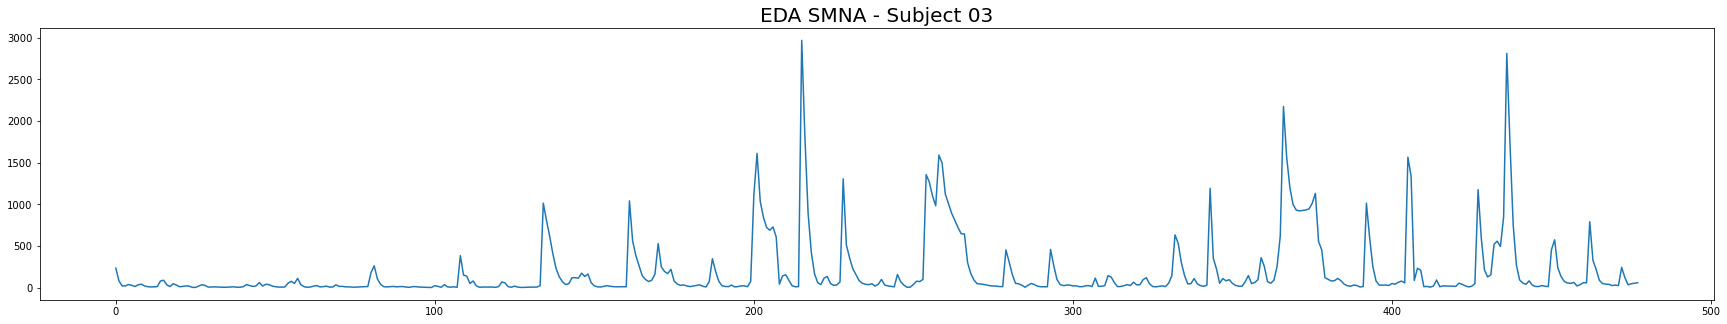

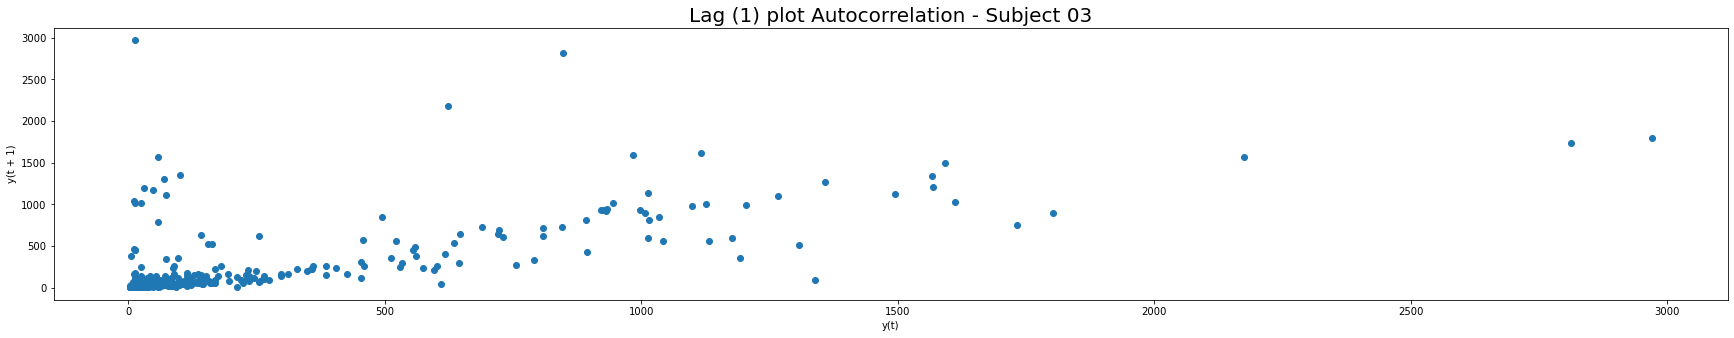

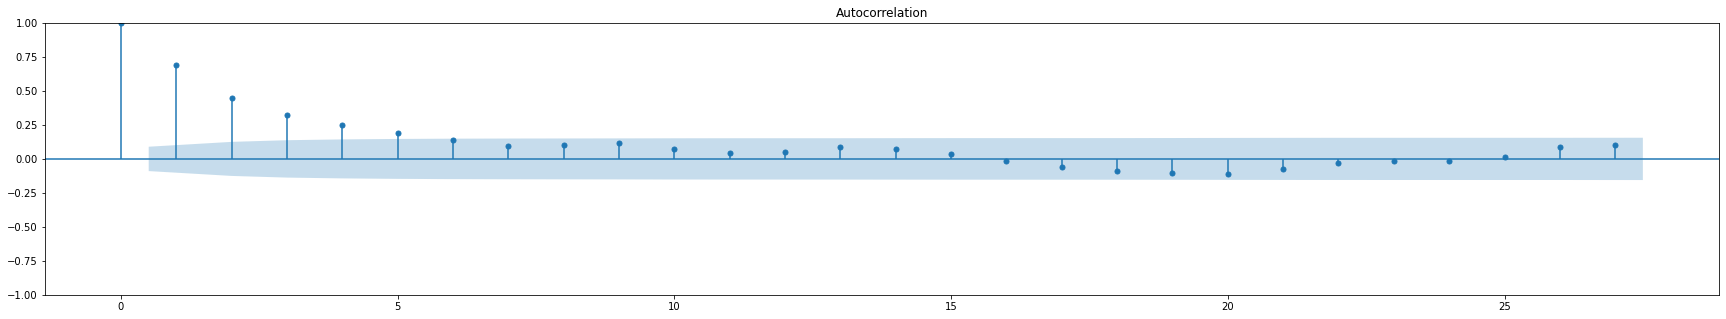

c:\Users\dadam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


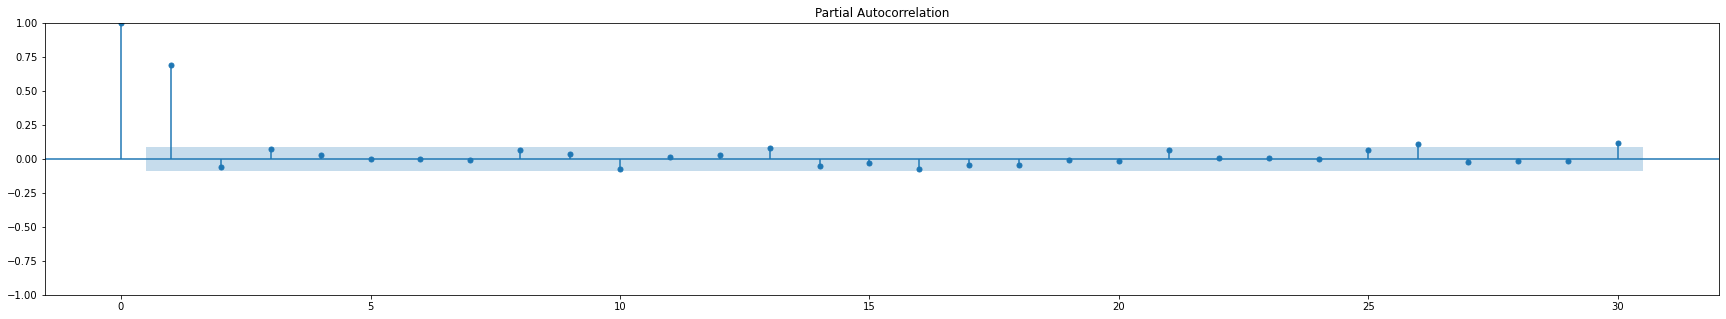

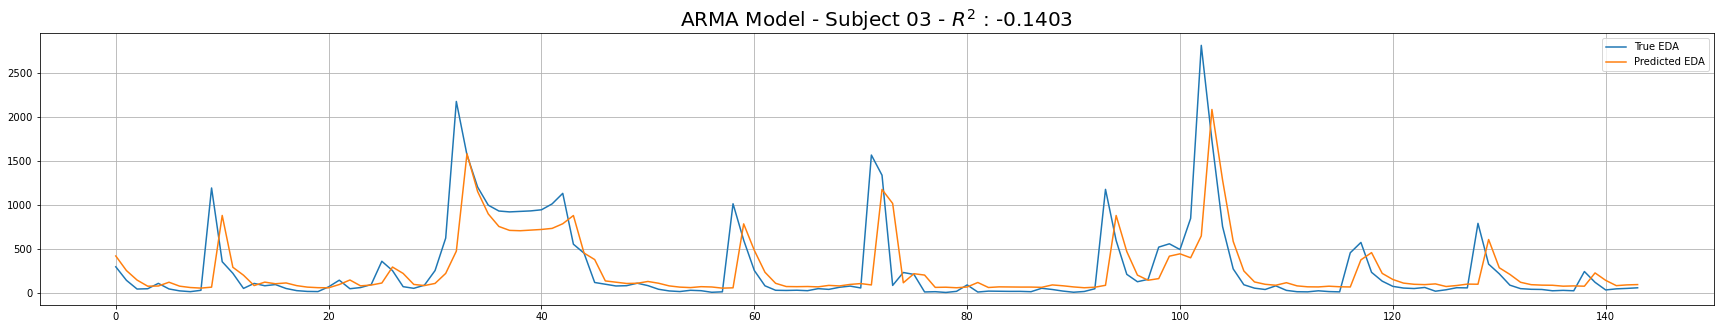

Reading C:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-04\eeg\sub-04_task-rest_proc-EDA_epoRejected.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
590 matching events found
No baseline correction applied


C:\Users\dadam\AppData\Local\Temp/ipykernel_15176/3020609557.py:14: RuntimeWarning: This filename (C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-04/eeg/sub-04_task-rest_proc-EDA_epoRejected.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(bp,


04


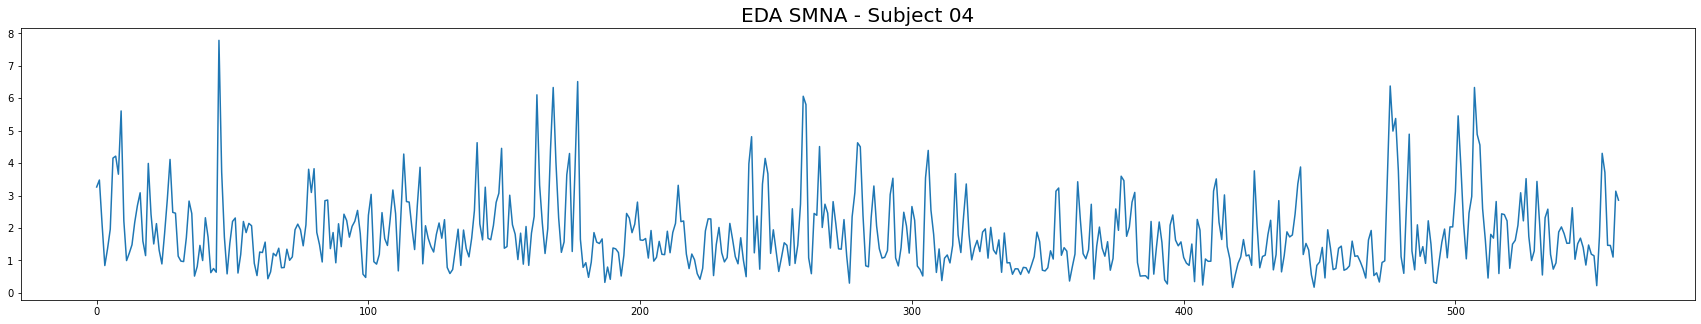

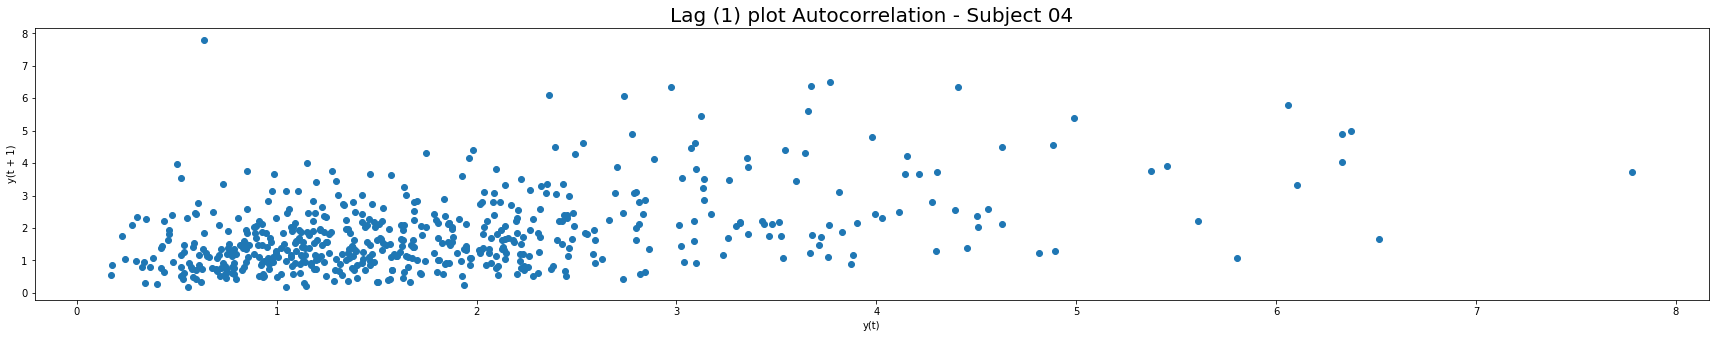

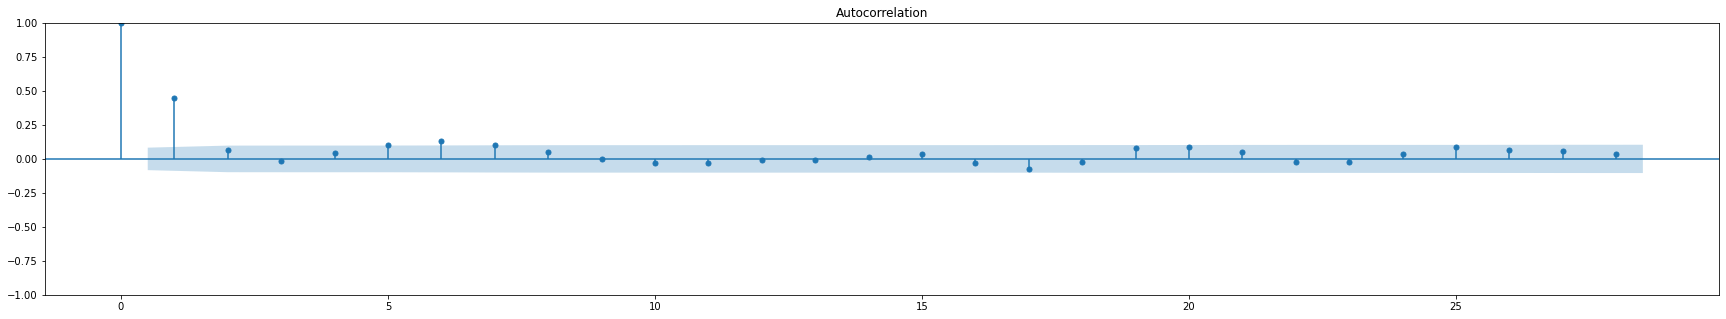

c:\Users\dadam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


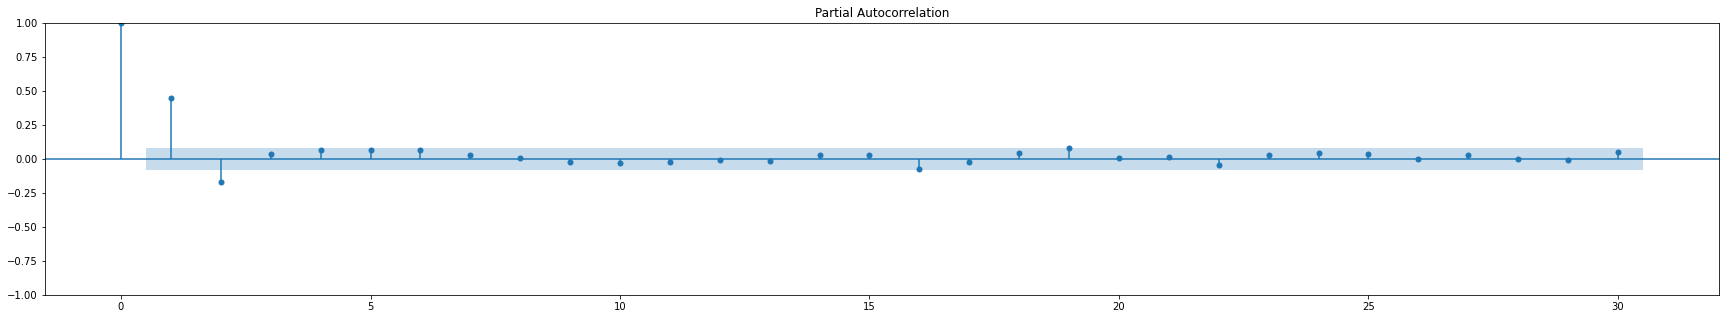

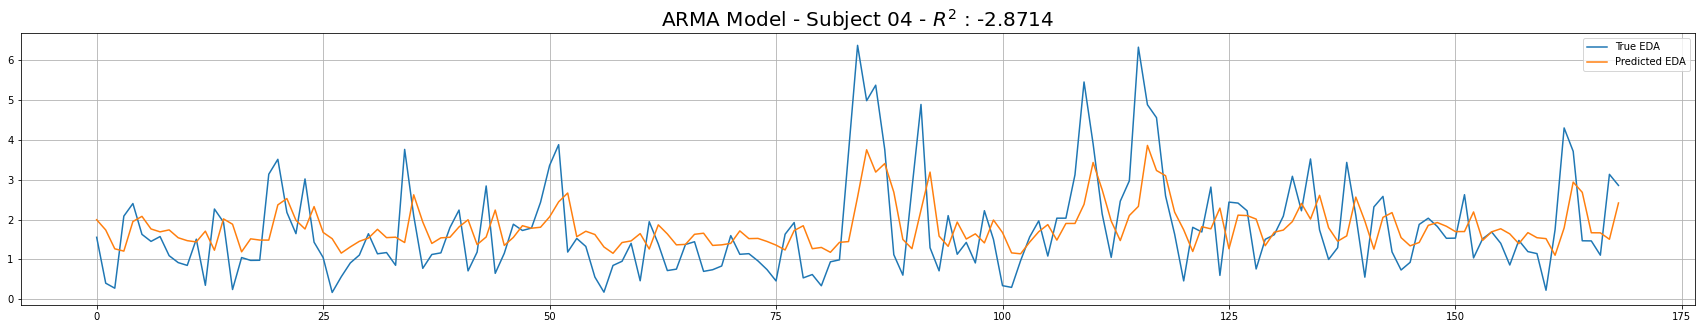

Reading C:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-05\eeg\sub-05_task-rest_proc-EDA_epoRejected.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
568 matching events found
No baseline correction applied


C:\Users\dadam\AppData\Local\Temp/ipykernel_15176/3020609557.py:14: RuntimeWarning: This filename (C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-05/eeg/sub-05_task-rest_proc-EDA_epoRejected.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(bp,


05


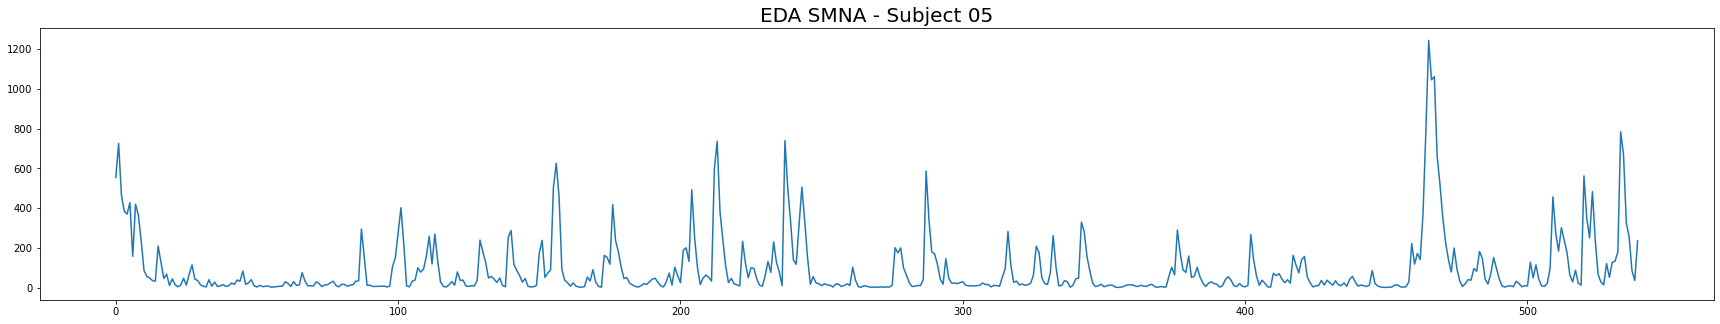

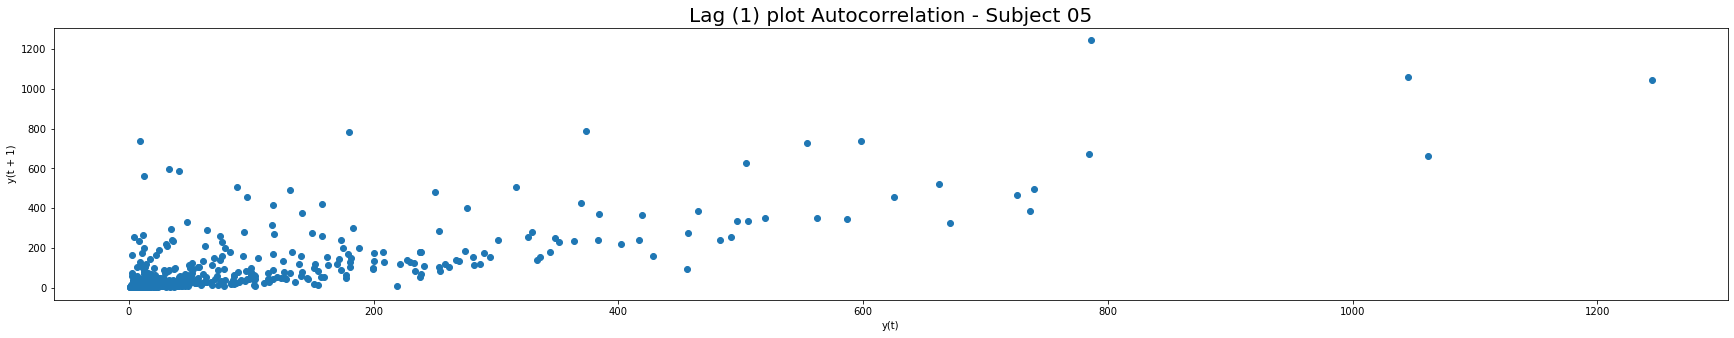

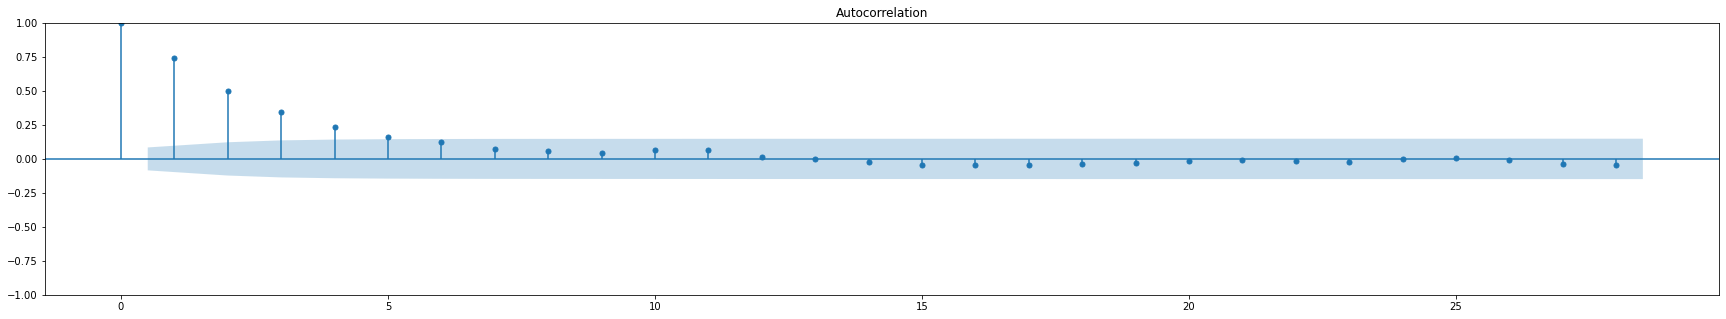

c:\Users\dadam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


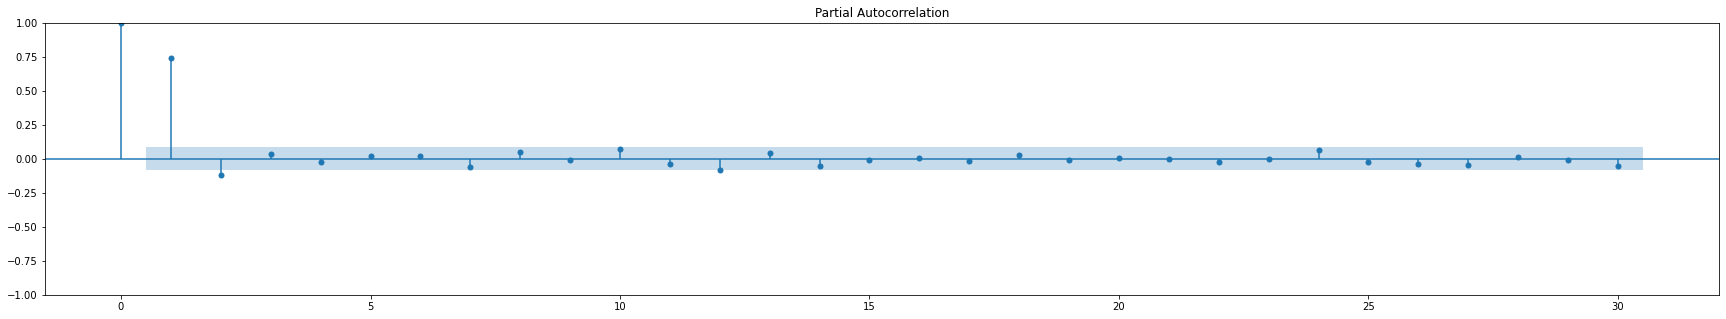

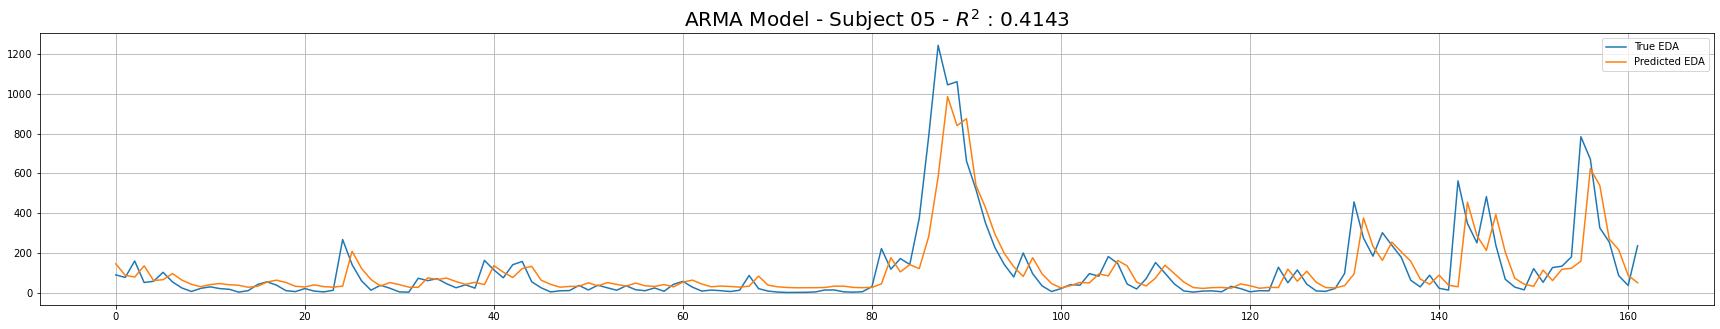

Reading C:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-06\eeg\sub-06_task-rest_proc-EDA_epoRejected.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
592 matching events found
No baseline correction applied


C:\Users\dadam\AppData\Local\Temp/ipykernel_15176/3020609557.py:14: RuntimeWarning: This filename (C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-06/eeg/sub-06_task-rest_proc-EDA_epoRejected.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(bp,


06


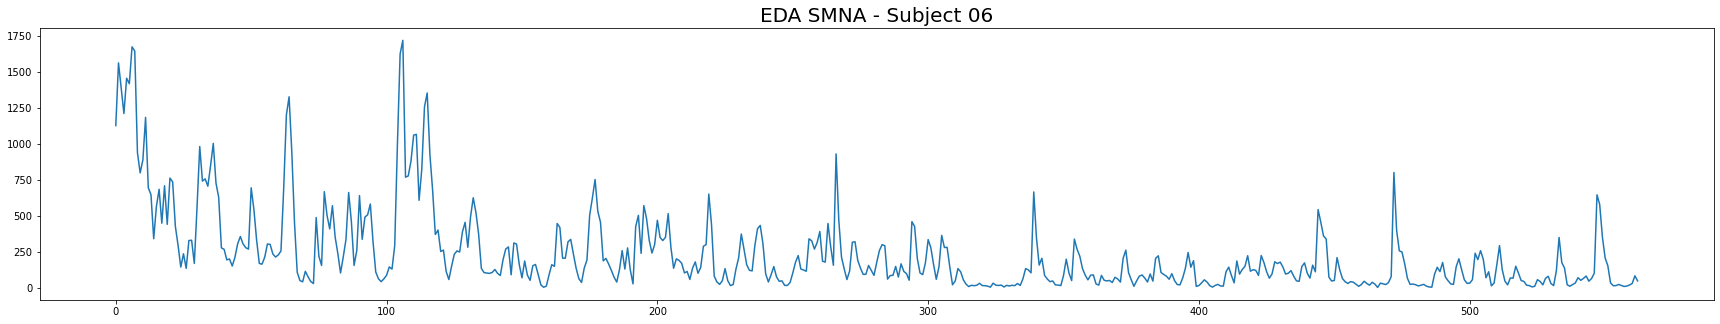

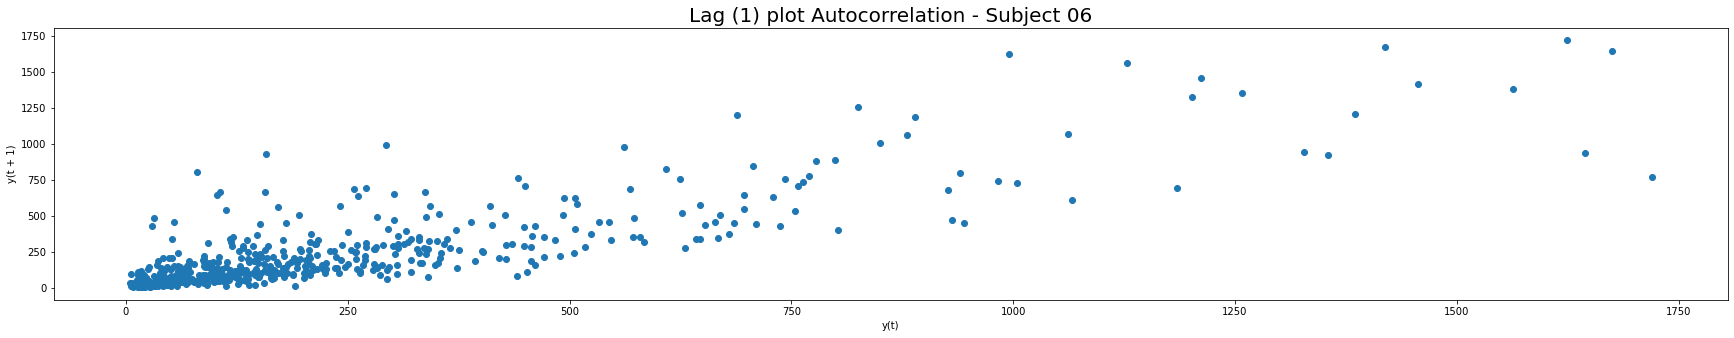

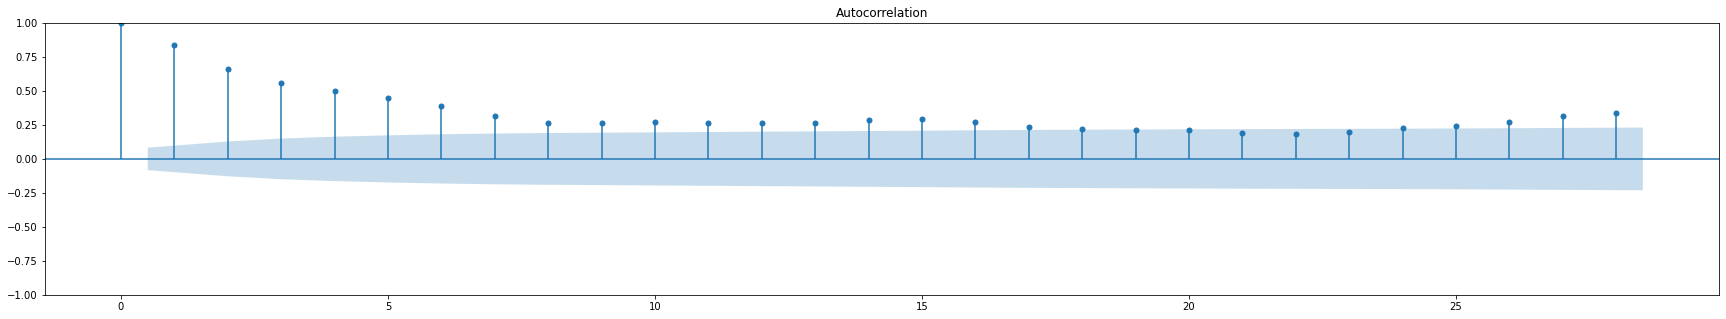

c:\Users\dadam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


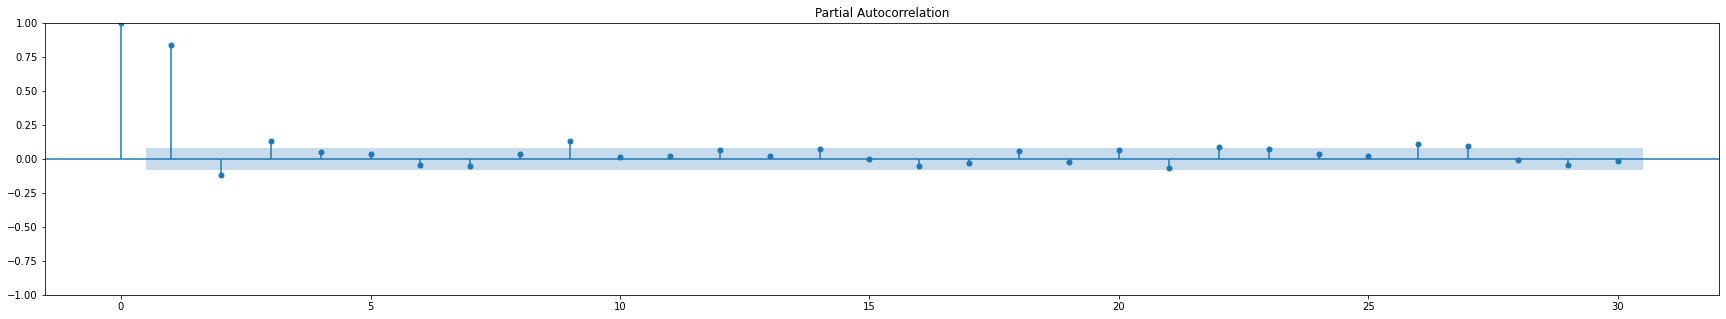

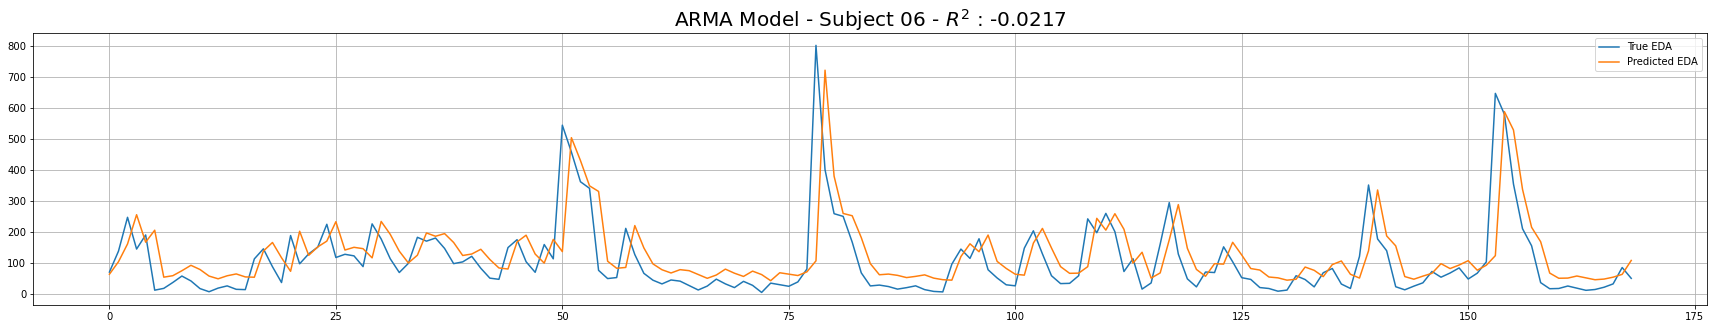

Reading C:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-07\eeg\sub-07_task-rest_proc-EDA_epoRejected.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
592 matching events found
No baseline correction applied


C:\Users\dadam\AppData\Local\Temp/ipykernel_15176/3020609557.py:14: RuntimeWarning: This filename (C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-07/eeg/sub-07_task-rest_proc-EDA_epoRejected.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(bp,


07


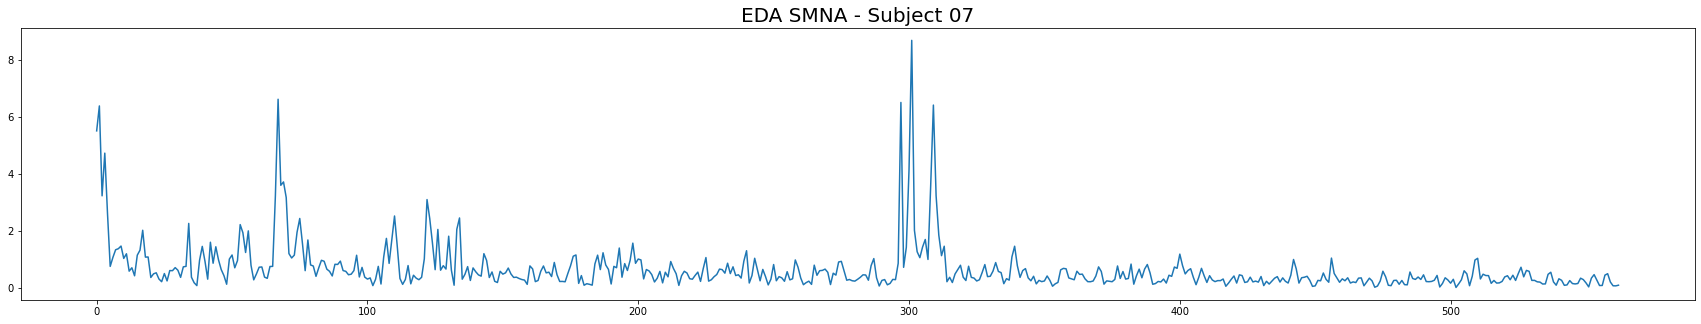

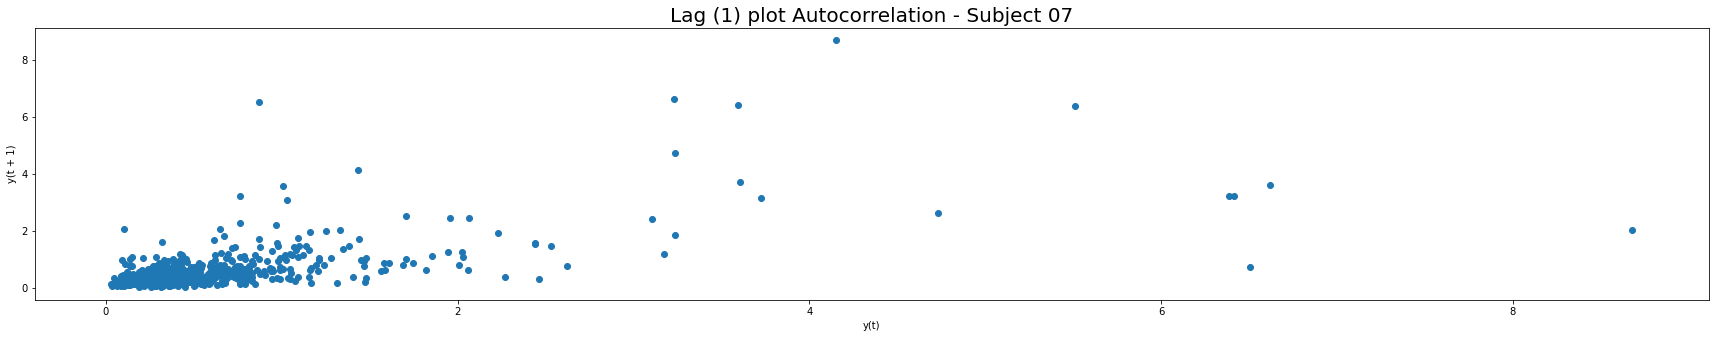

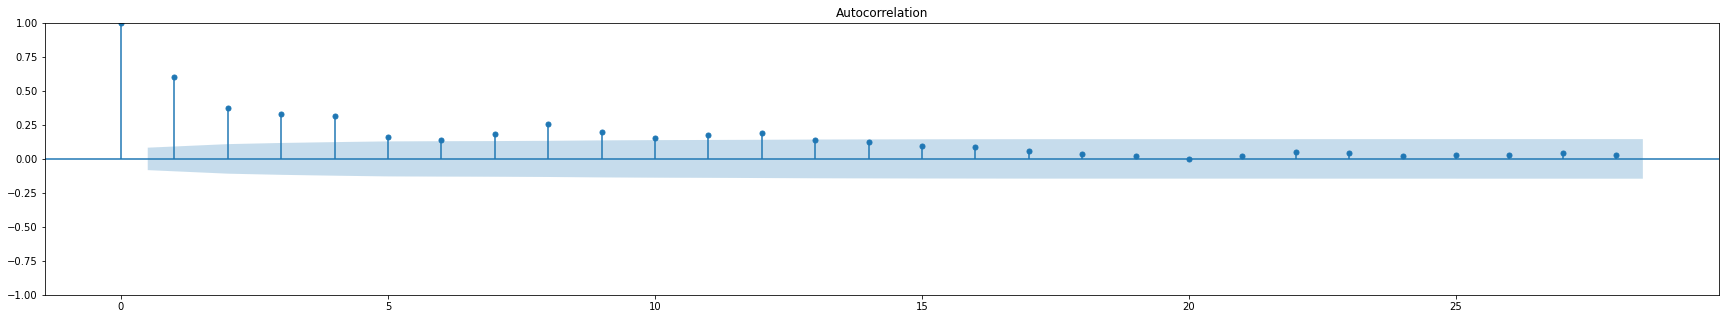

c:\Users\dadam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


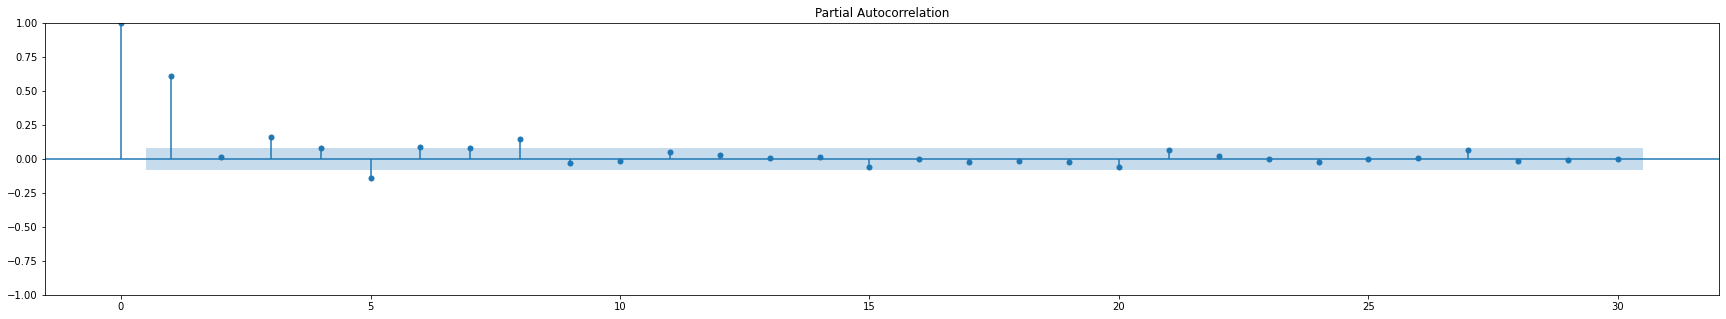

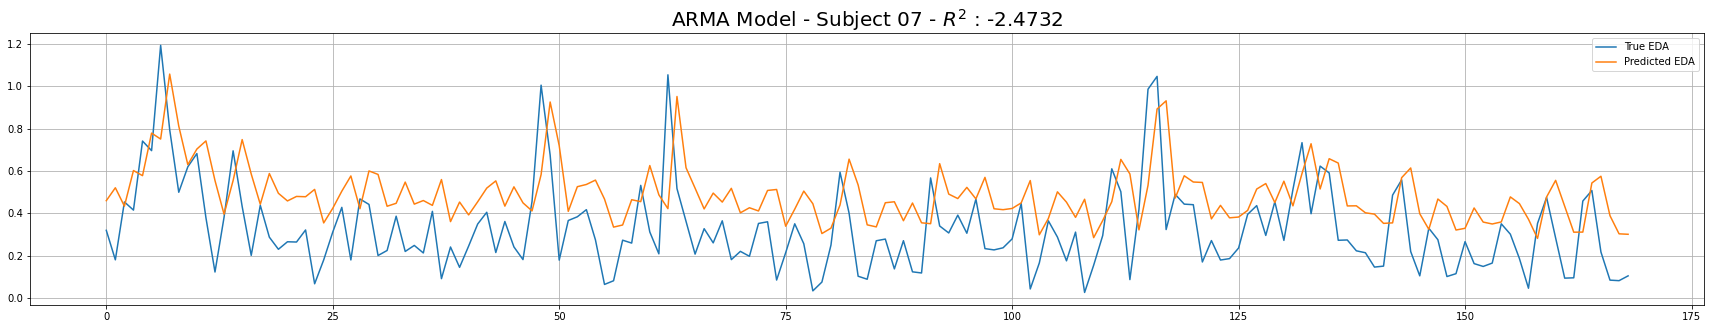

Reading C:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-08\eeg\sub-08_task-rest_proc-EDA_epoRejected.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
234 matching events found
No baseline correction applied


C:\Users\dadam\AppData\Local\Temp/ipykernel_15176/3020609557.py:14: RuntimeWarning: This filename (C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-08/eeg/sub-08_task-rest_proc-EDA_epoRejected.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(bp,


08


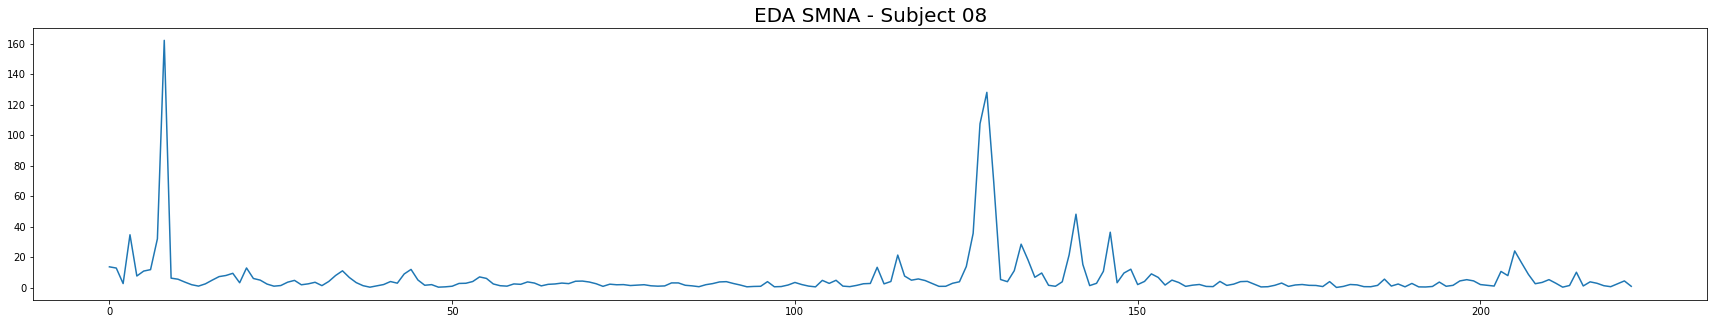

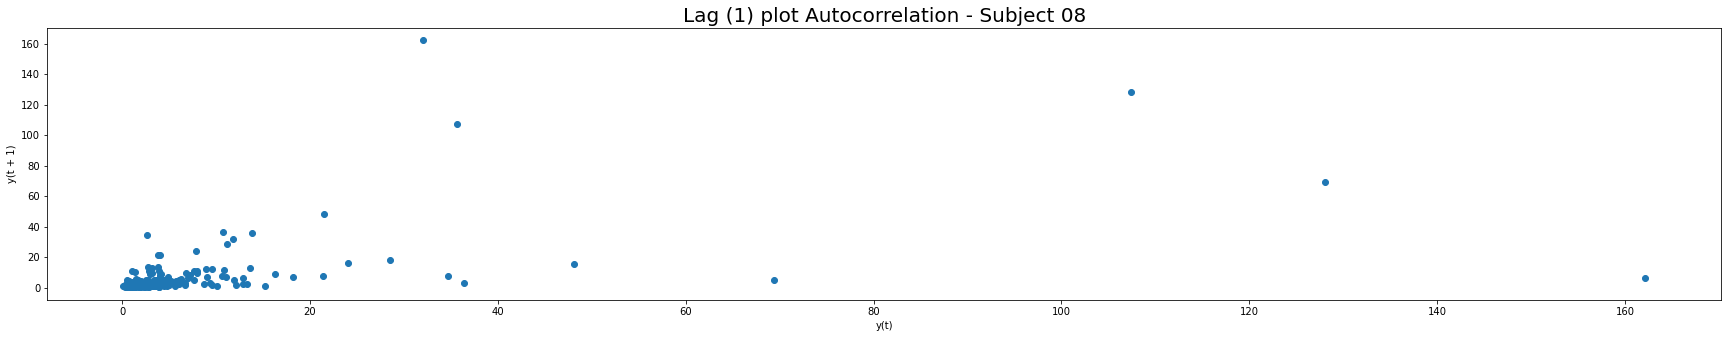

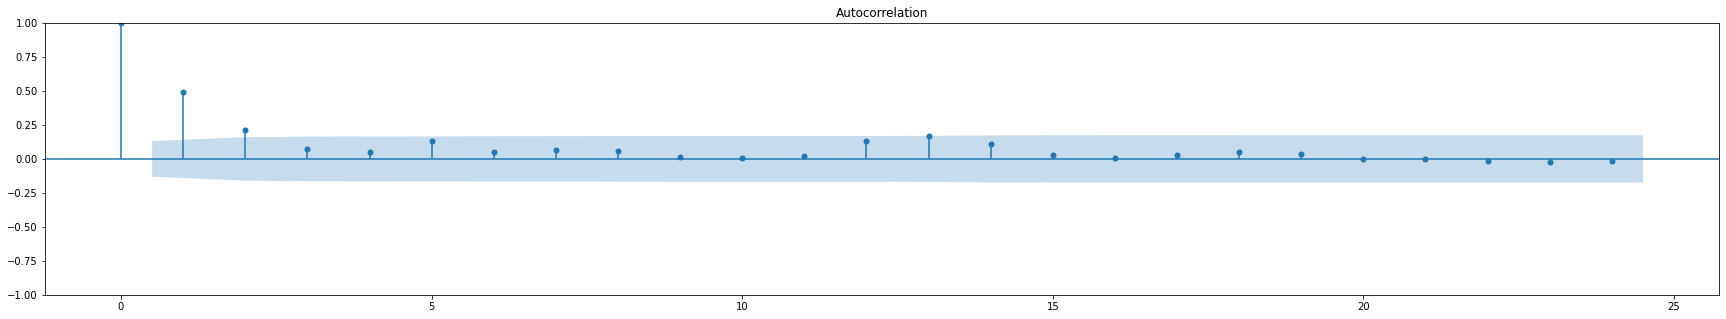

c:\Users\dadam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


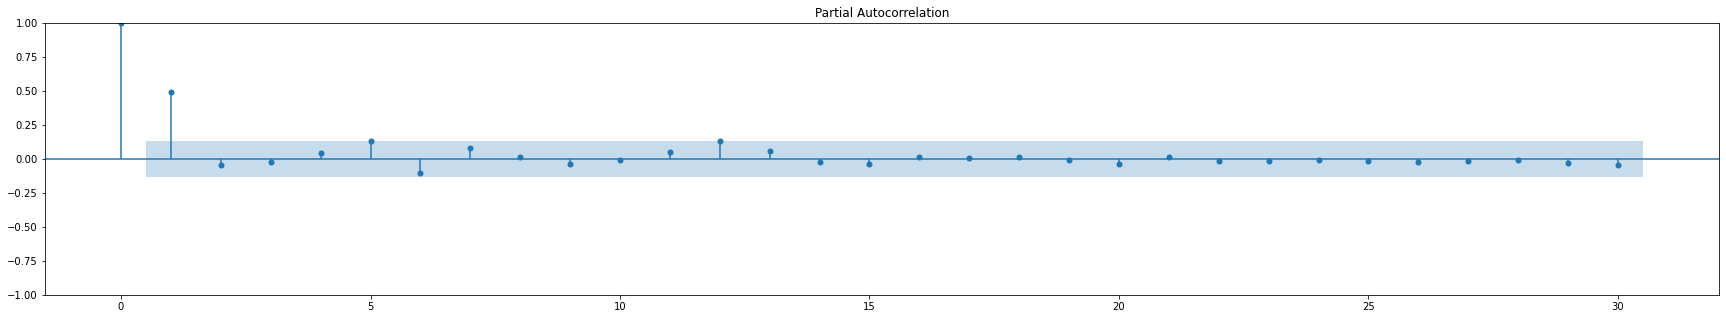

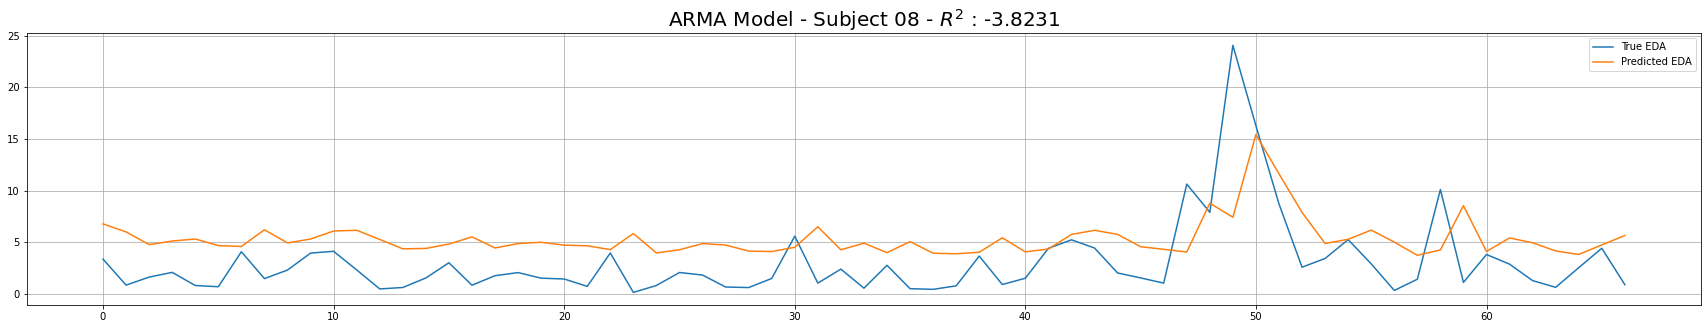

Reading C:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-09\eeg\sub-09_task-rest_proc-EDA_epoRejected.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
591 matching events found
No baseline correction applied


C:\Users\dadam\AppData\Local\Temp/ipykernel_15176/3020609557.py:14: RuntimeWarning: This filename (C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-09/eeg/sub-09_task-rest_proc-EDA_epoRejected.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(bp,


09


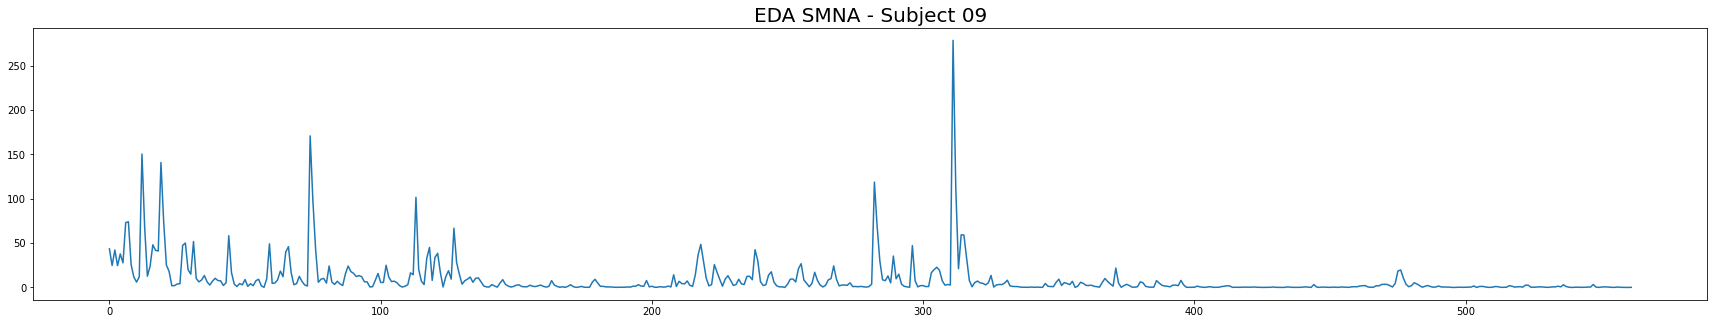

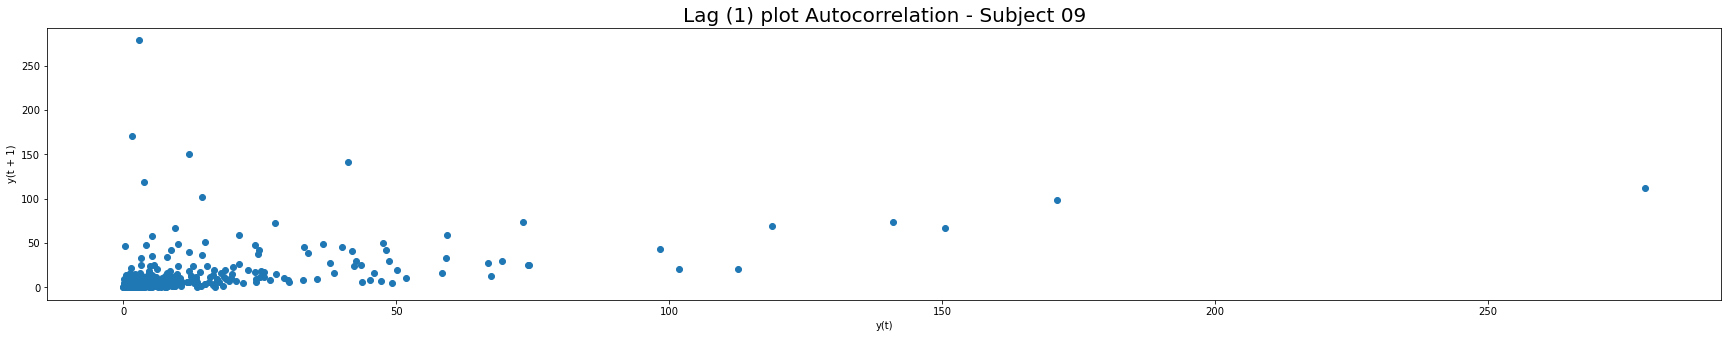

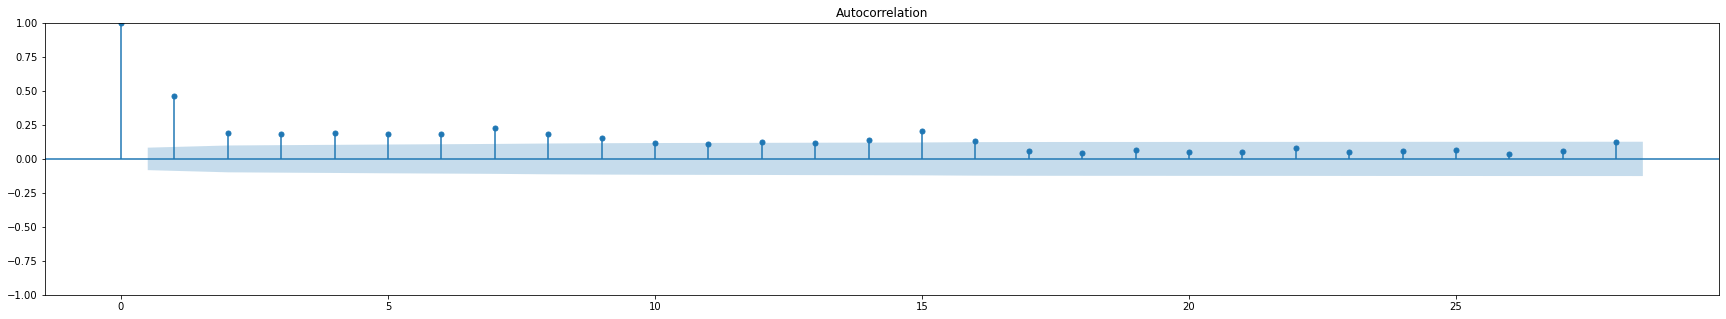

c:\Users\dadam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


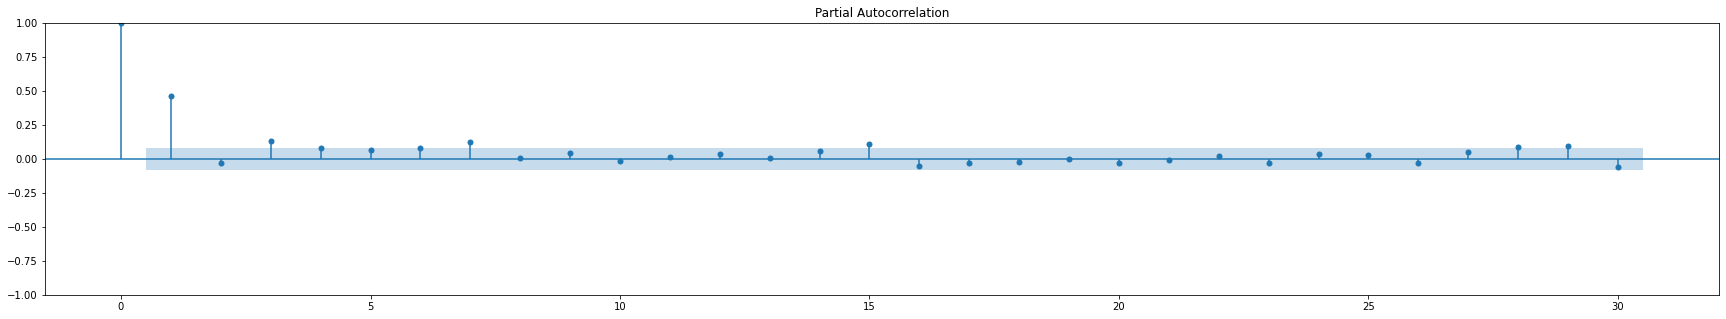

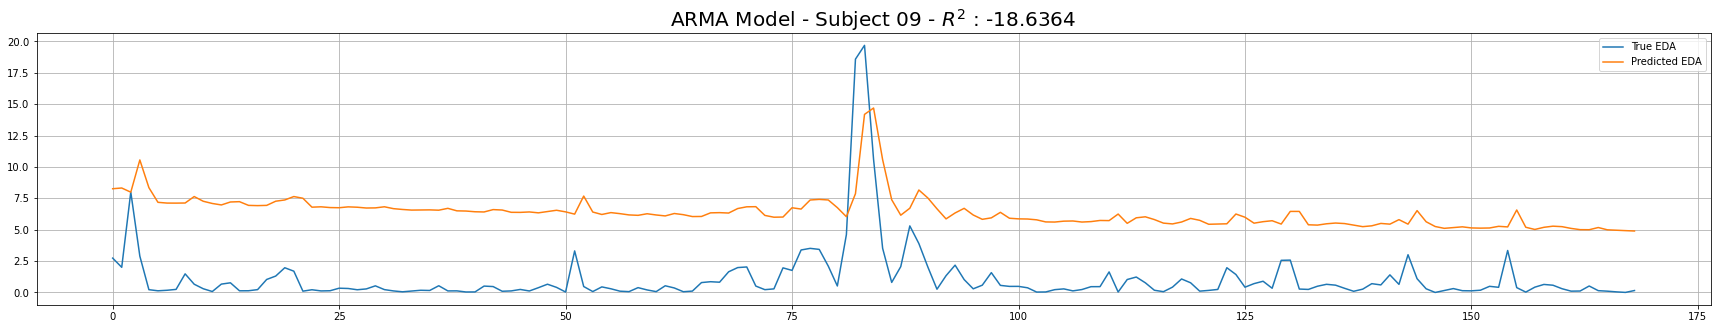

Reading C:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-10\eeg\sub-10_task-rest_proc-EDA_epoRejected.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
600 matching events found
No baseline correction applied


C:\Users\dadam\AppData\Local\Temp/ipykernel_15176/3020609557.py:14: RuntimeWarning: This filename (C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-10/eeg/sub-10_task-rest_proc-EDA_epoRejected.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(bp,


10


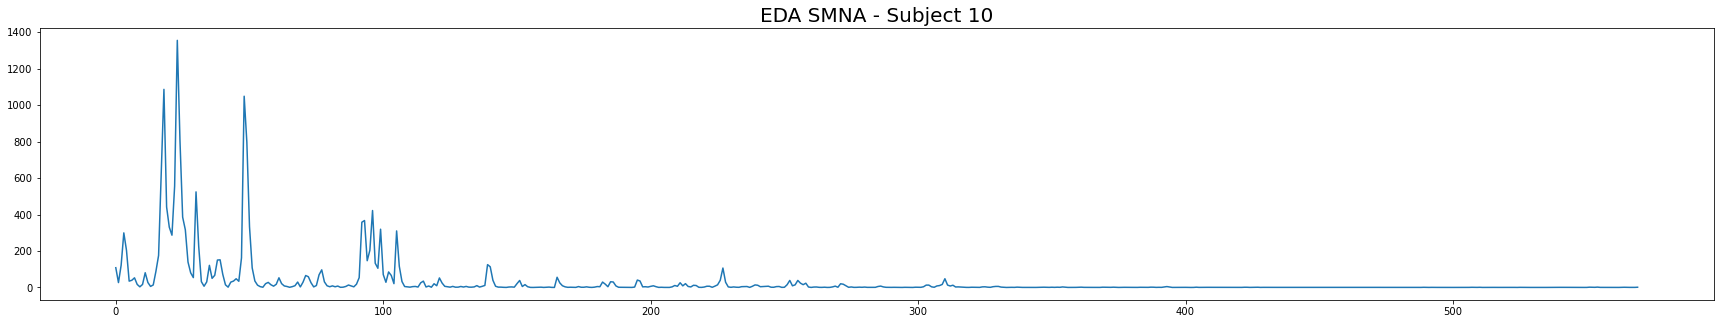

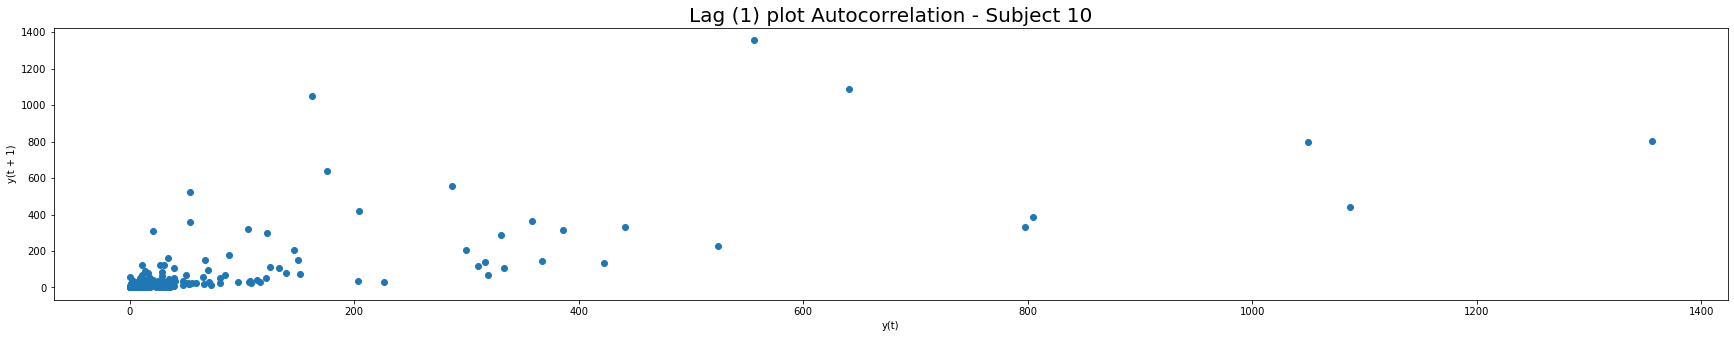

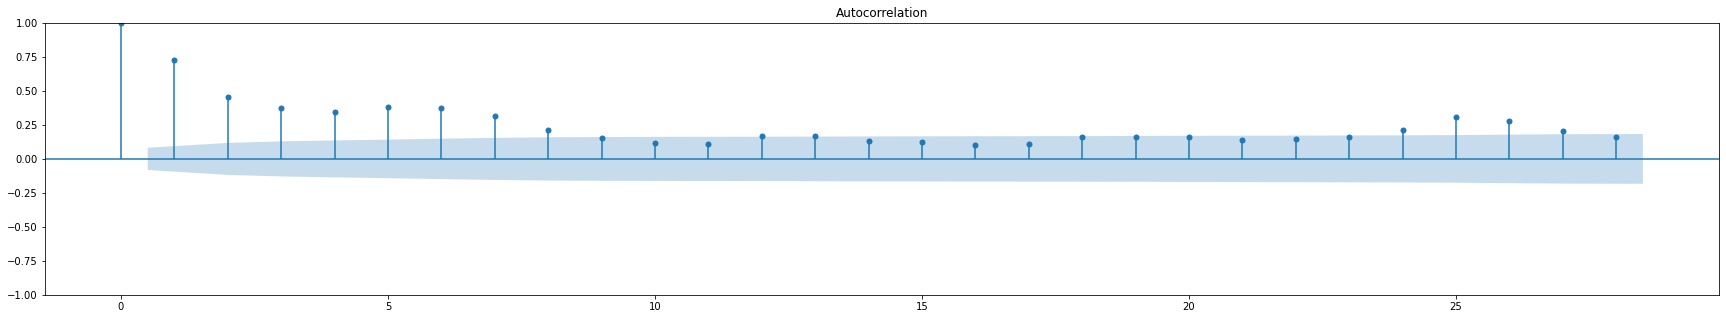

c:\Users\dadam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


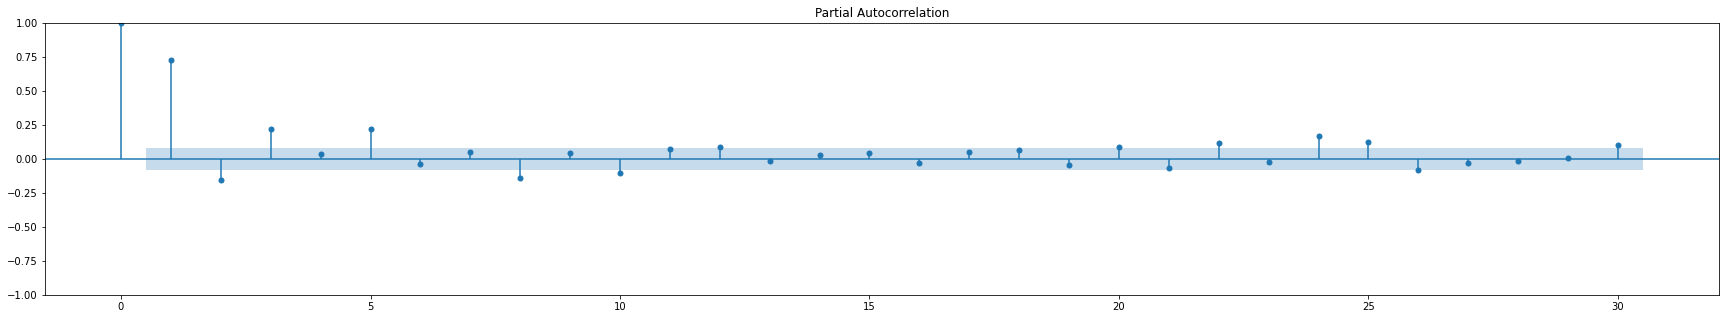

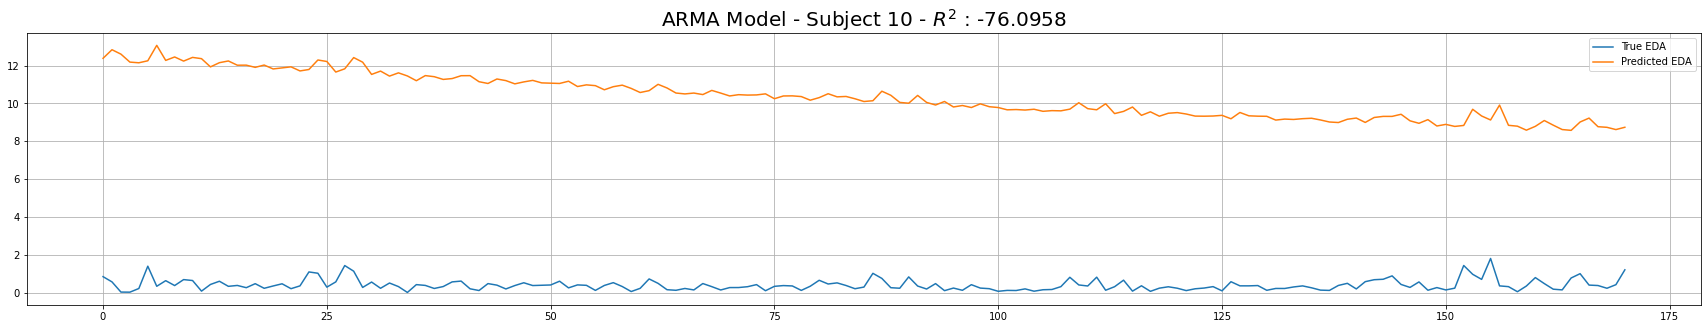

Reading C:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-11\eeg\sub-11_task-rest_proc-EDA_epoRejected.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
600 matching events found
No baseline correction applied


C:\Users\dadam\AppData\Local\Temp/ipykernel_15176/3020609557.py:14: RuntimeWarning: This filename (C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-11/eeg/sub-11_task-rest_proc-EDA_epoRejected.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(bp,


11


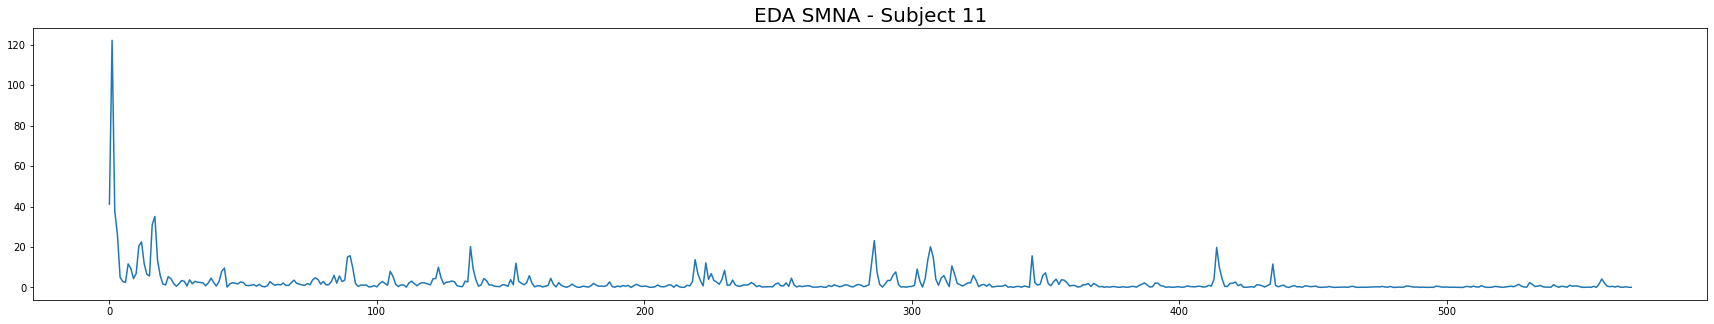

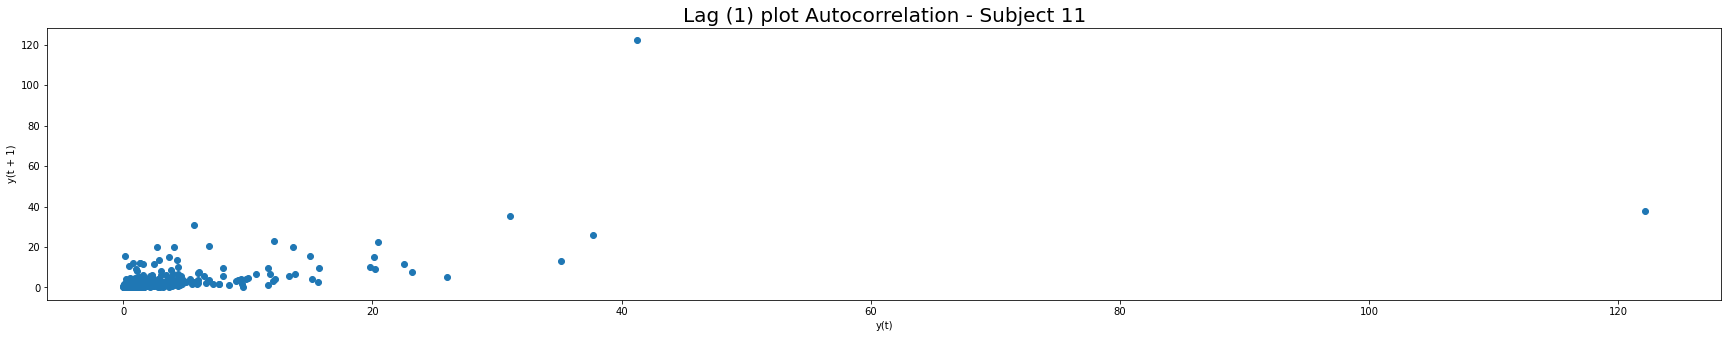

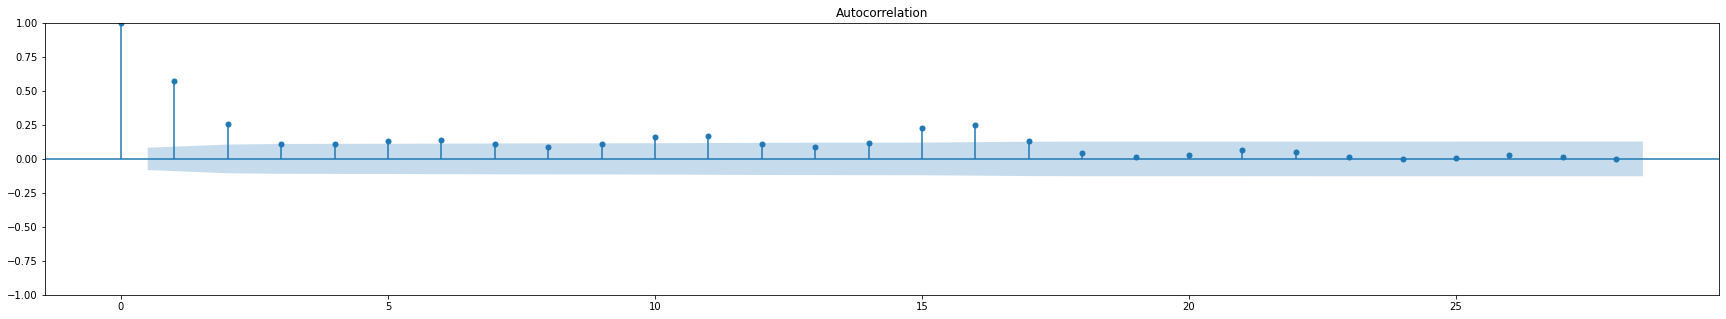

c:\Users\dadam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


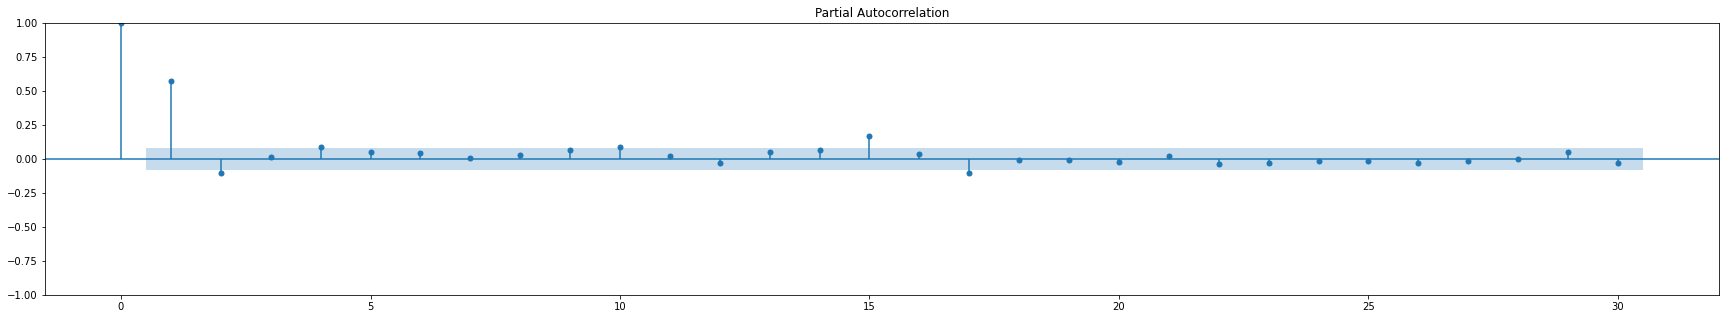

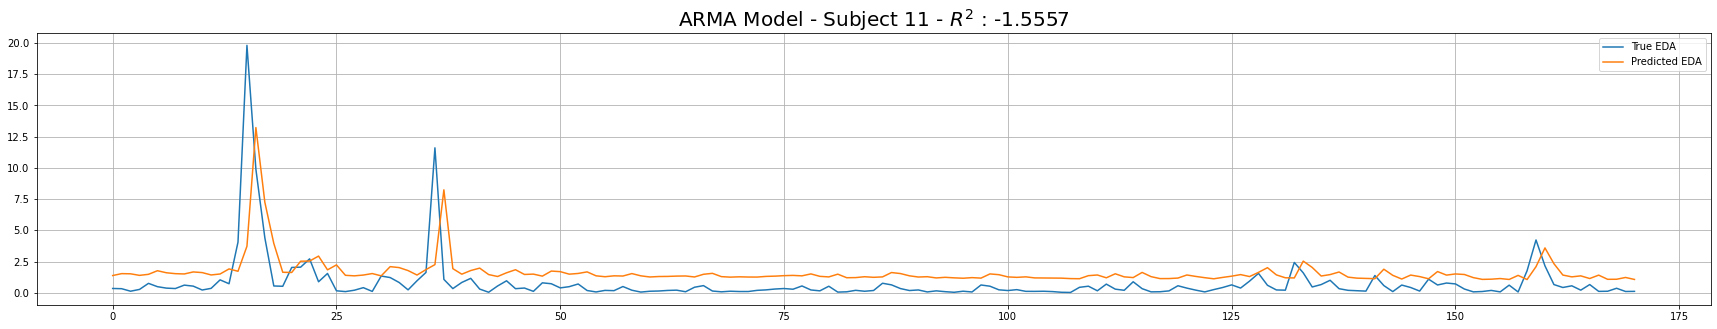

Reading C:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-12\eeg\sub-12_task-rest_proc-EDA_epoRejected.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
599 matching events found
No baseline correction applied


C:\Users\dadam\AppData\Local\Temp/ipykernel_15176/3020609557.py:14: RuntimeWarning: This filename (C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-12/eeg/sub-12_task-rest_proc-EDA_epoRejected.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(bp,


12


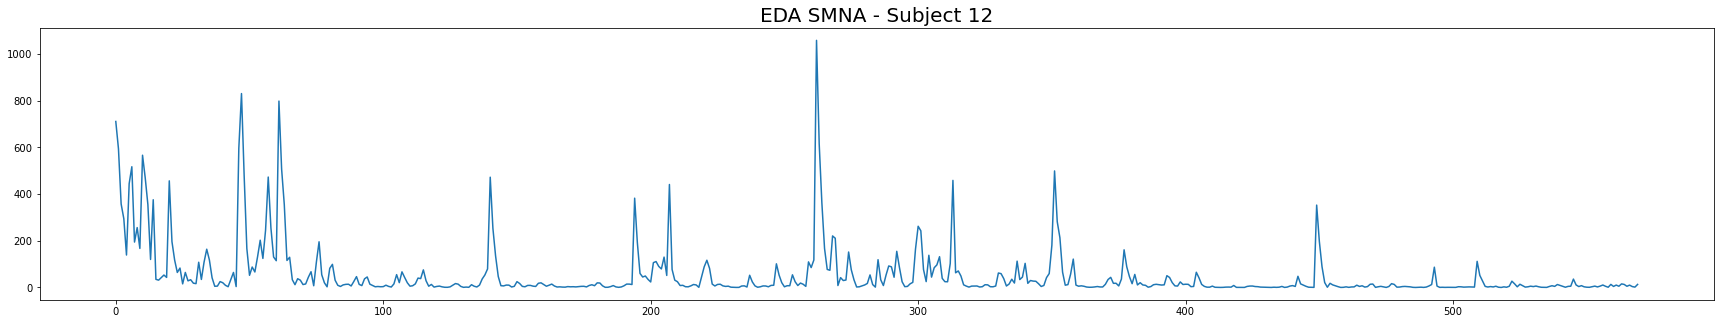

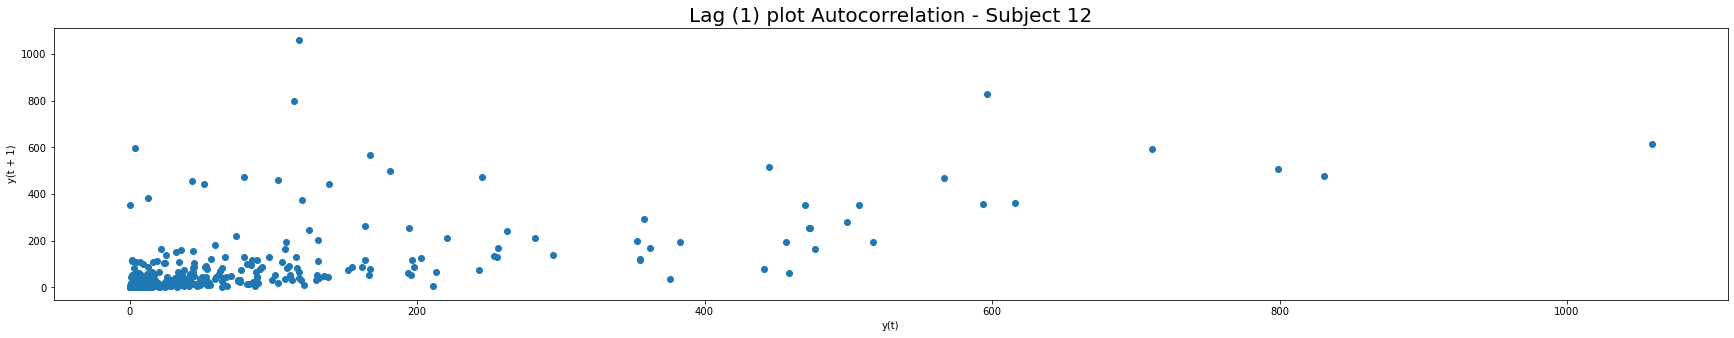

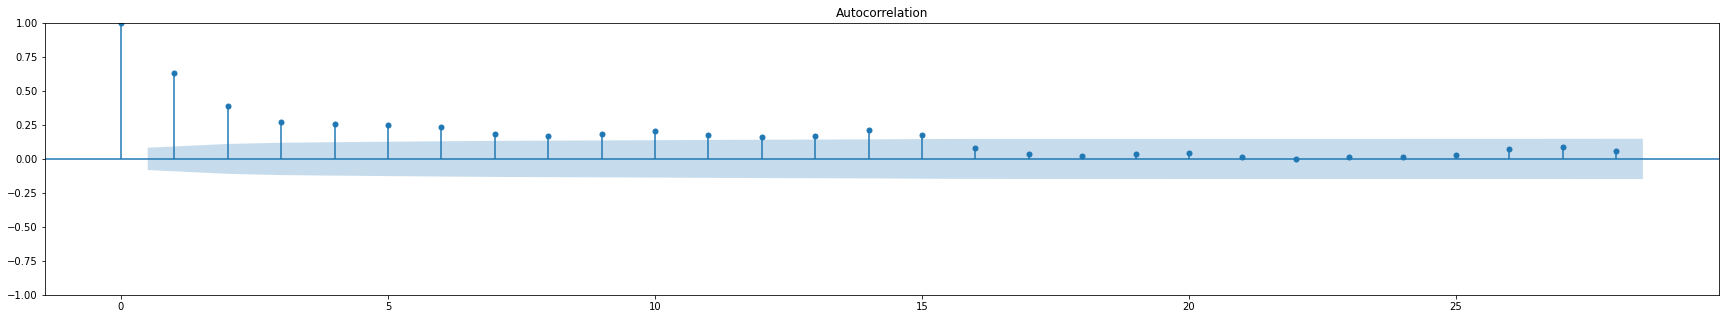

c:\Users\dadam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


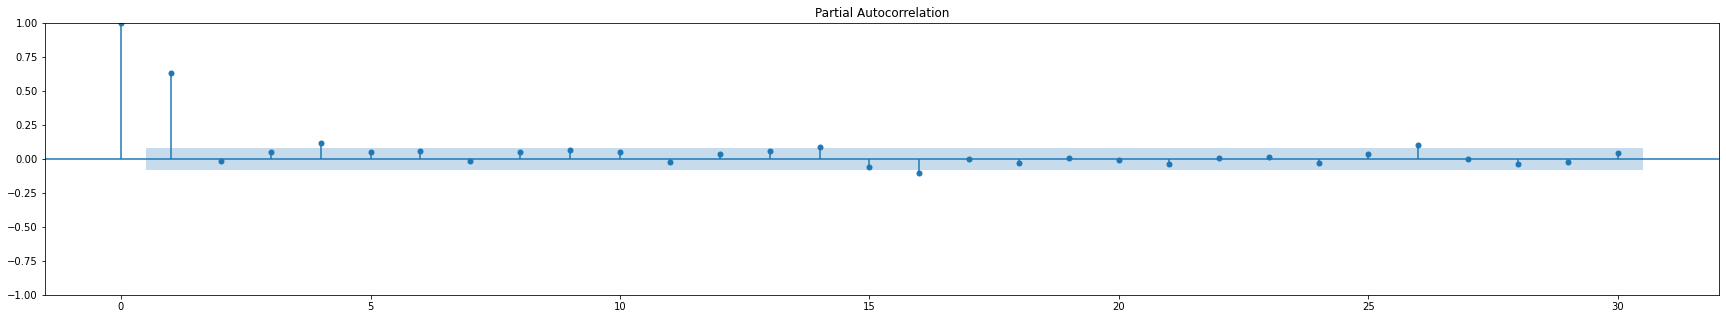

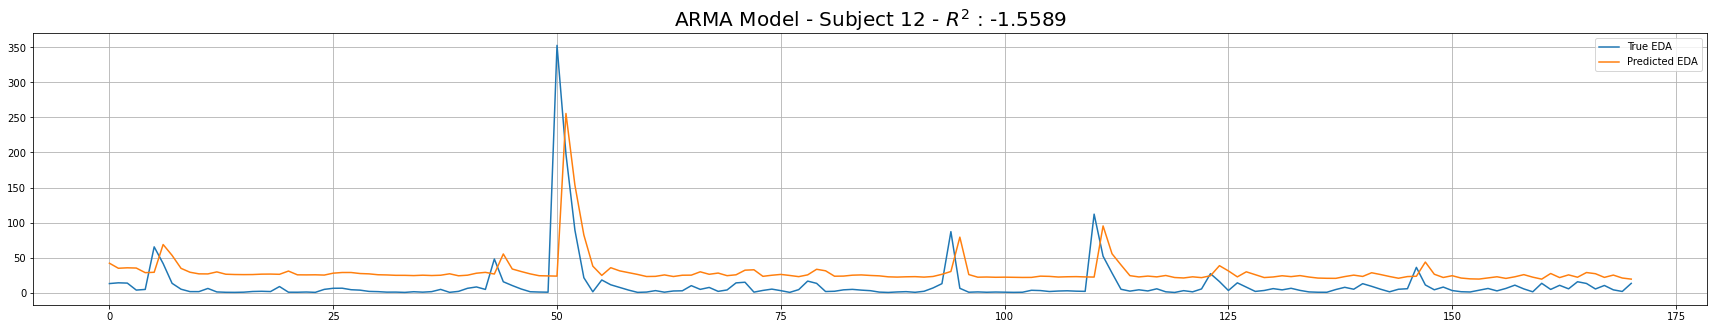

Reading C:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-13\eeg\sub-13_task-rest_proc-EDA_epoRejected.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
601 matching events found
No baseline correction applied


C:\Users\dadam\AppData\Local\Temp/ipykernel_15176/3020609557.py:14: RuntimeWarning: This filename (C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-13/eeg/sub-13_task-rest_proc-EDA_epoRejected.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(bp,


13


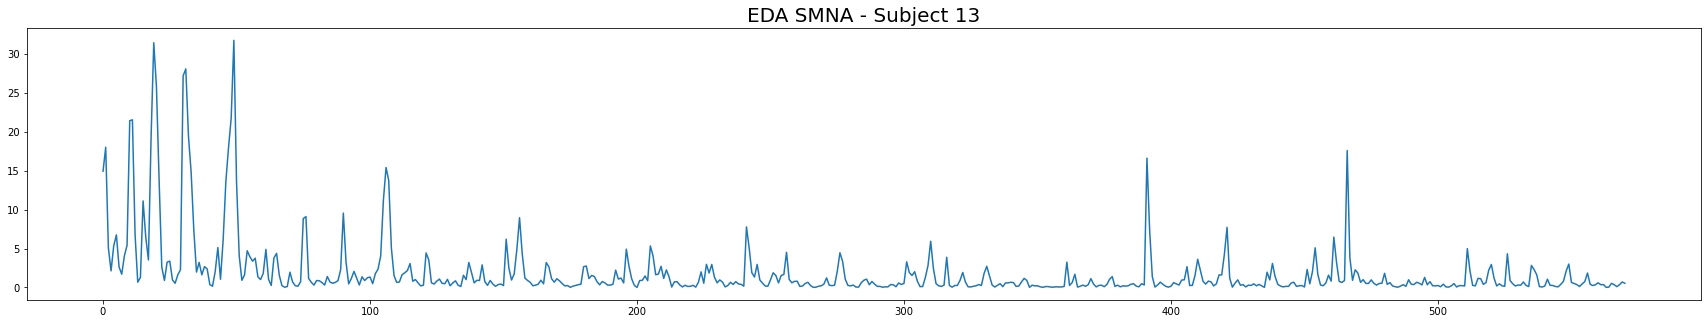

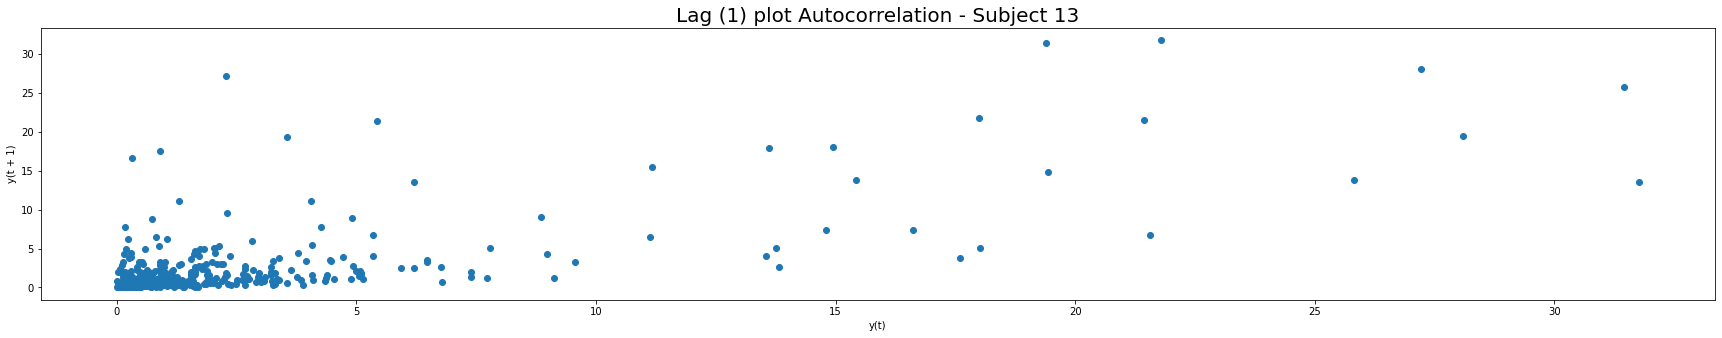

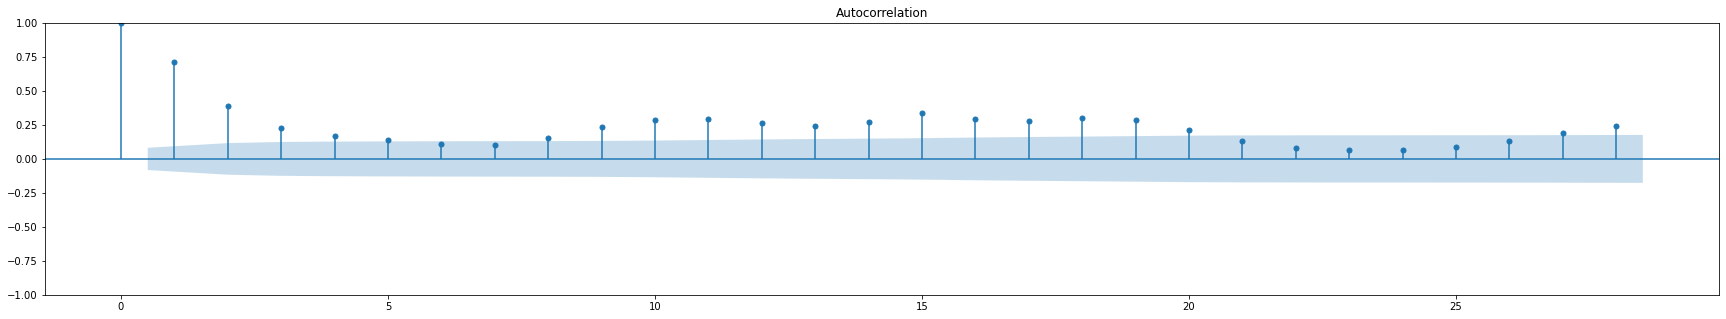

c:\Users\dadam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


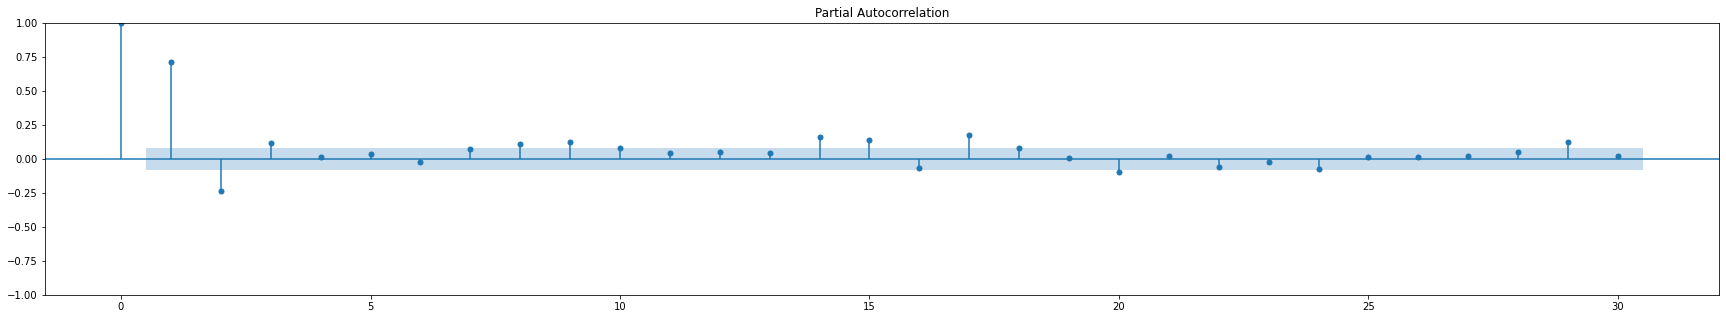

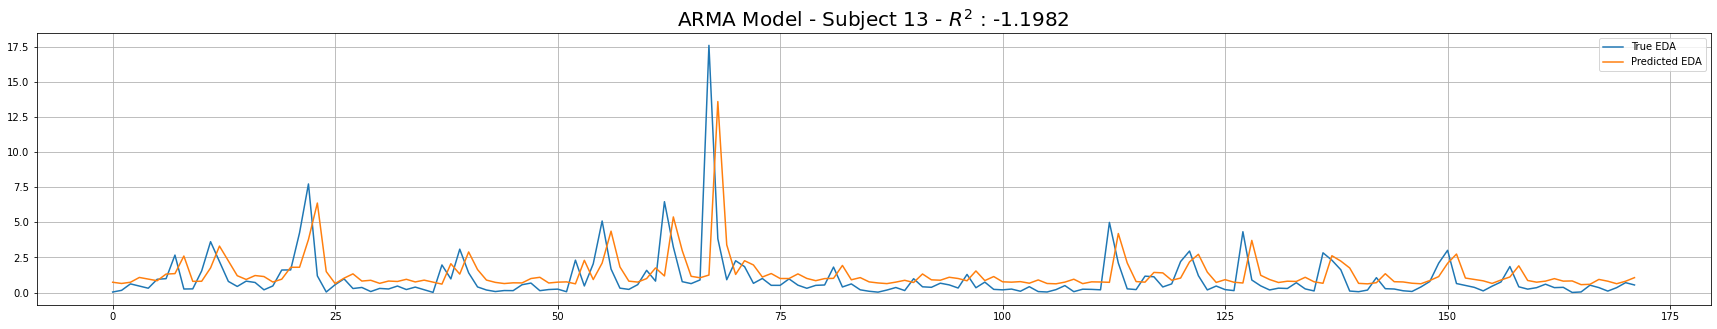

Reading C:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-14\eeg\sub-14_task-rest_proc-EDA_epoRejected.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
604 matching events found
No baseline correction applied


C:\Users\dadam\AppData\Local\Temp/ipykernel_15176/3020609557.py:14: RuntimeWarning: This filename (C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-14/eeg/sub-14_task-rest_proc-EDA_epoRejected.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(bp,


14


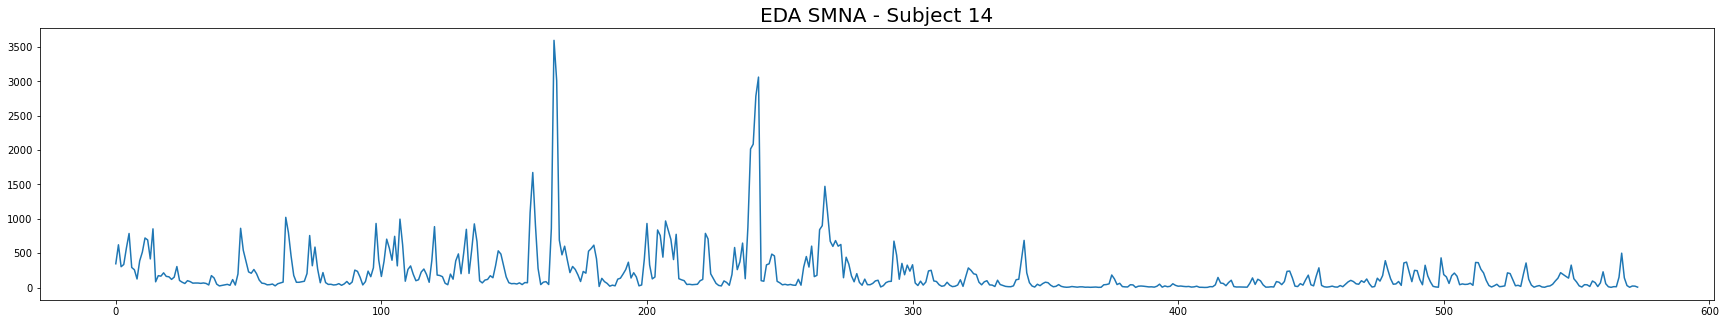

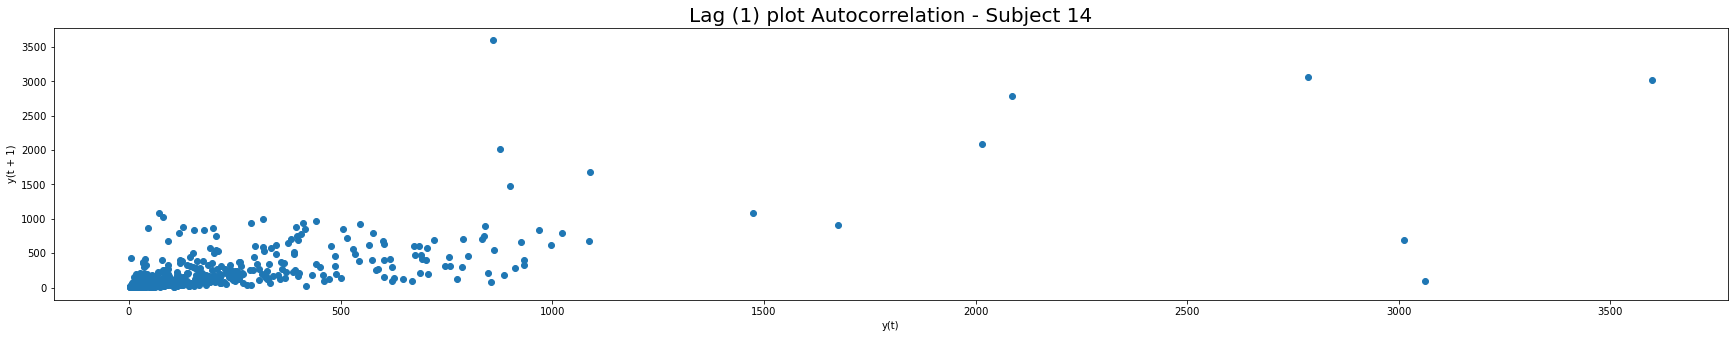

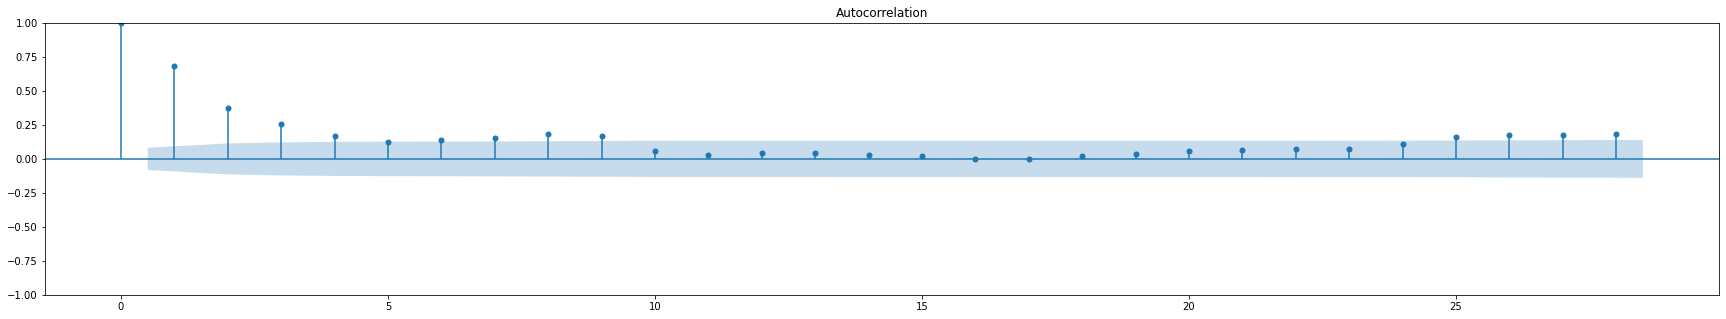

c:\Users\dadam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


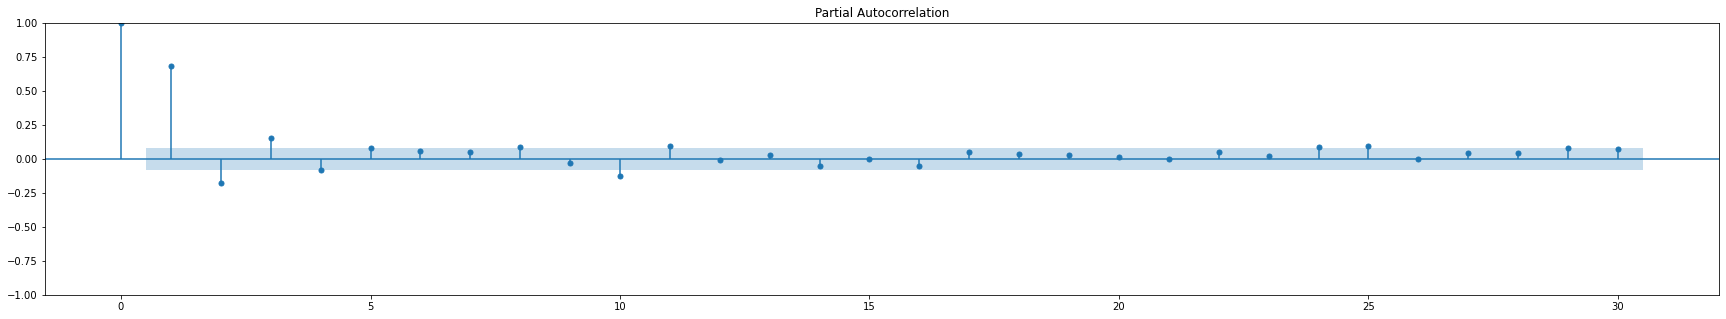

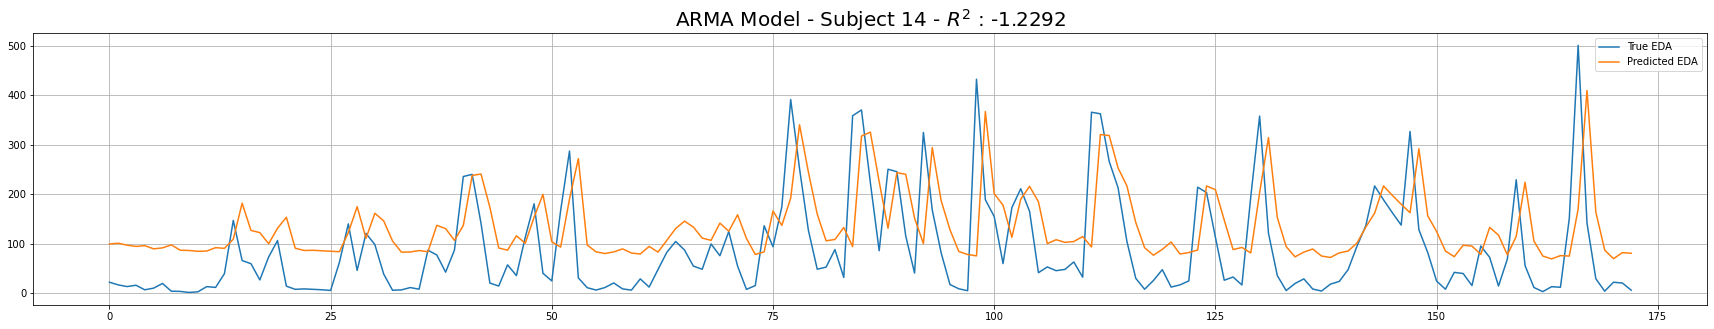

Reading C:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-15\eeg\sub-15_task-rest_proc-EDA_epoRejected.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
320 matching events found
No baseline correction applied


C:\Users\dadam\AppData\Local\Temp/ipykernel_15176/3020609557.py:14: RuntimeWarning: This filename (C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-15/eeg/sub-15_task-rest_proc-EDA_epoRejected.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(bp,


15


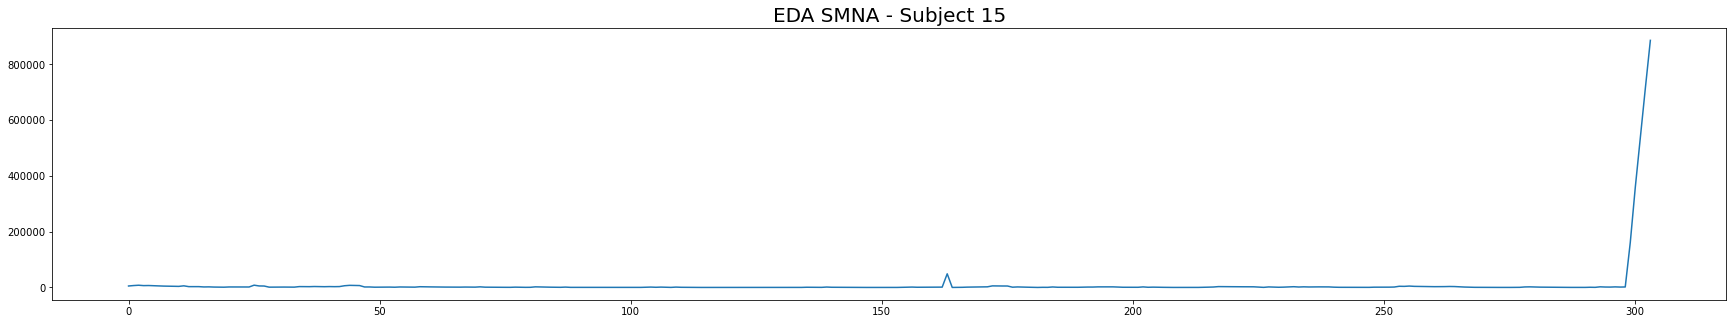

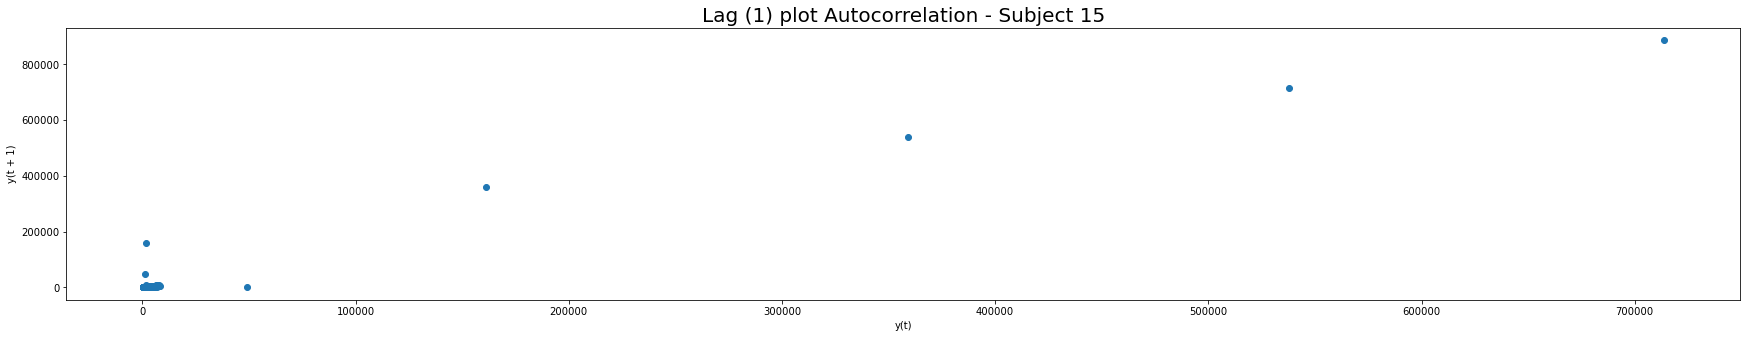

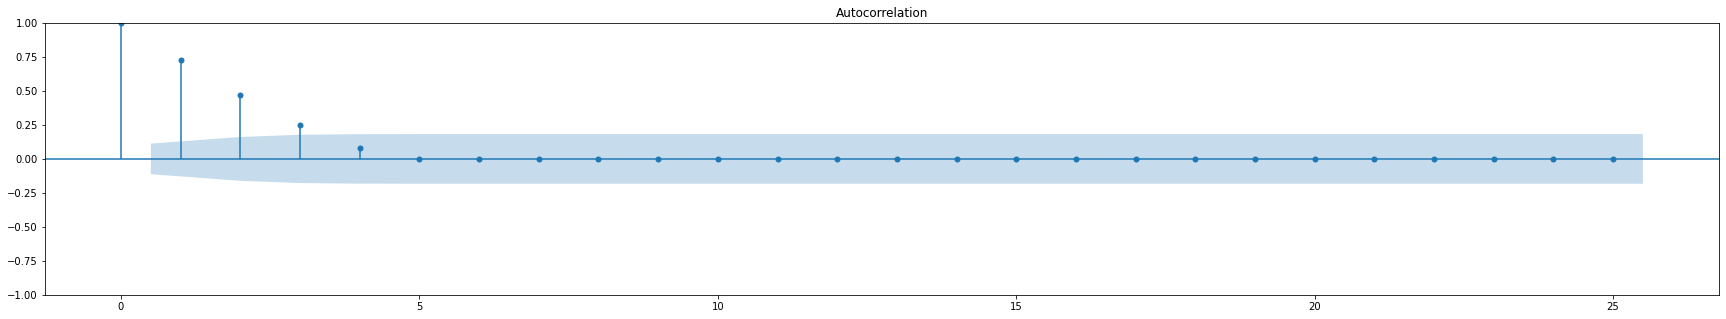

c:\Users\dadam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


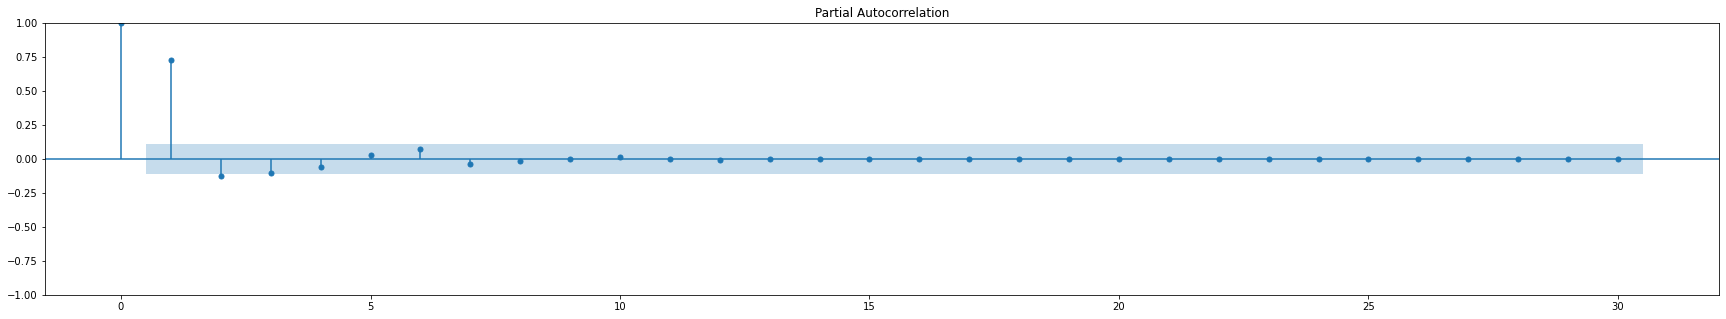

c:\Users\dadam\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


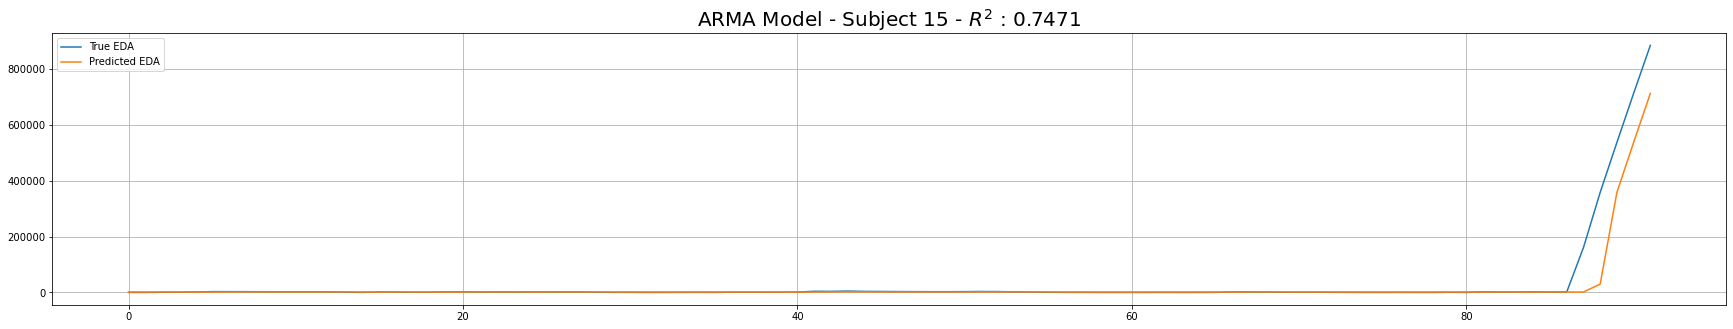

Reading C:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-16\eeg\sub-16_task-rest_proc-EDA_epoRejected.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
410 matching events found
No baseline correction applied


C:\Users\dadam\AppData\Local\Temp/ipykernel_15176/3020609557.py:14: RuntimeWarning: This filename (C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-16/eeg/sub-16_task-rest_proc-EDA_epoRejected.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(bp,


16


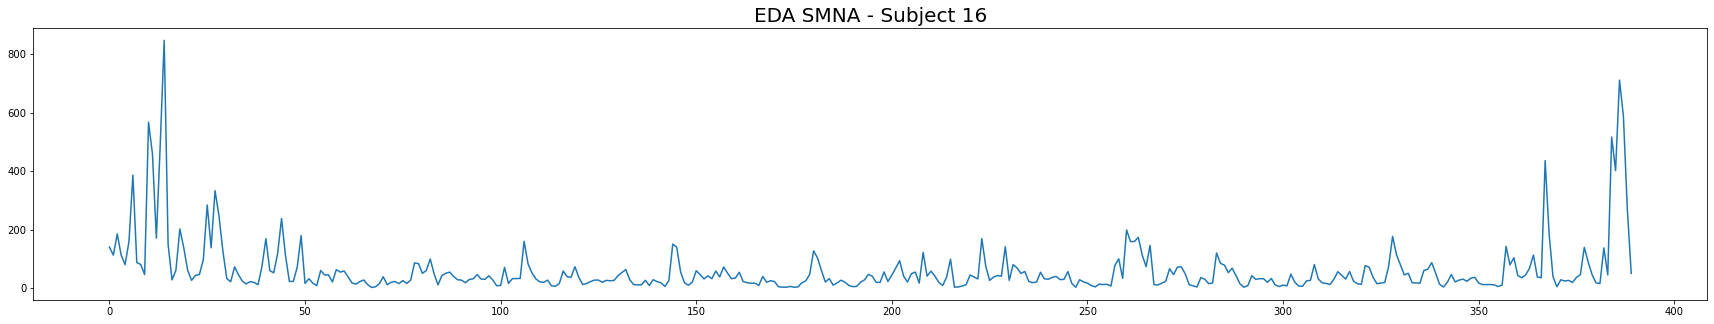

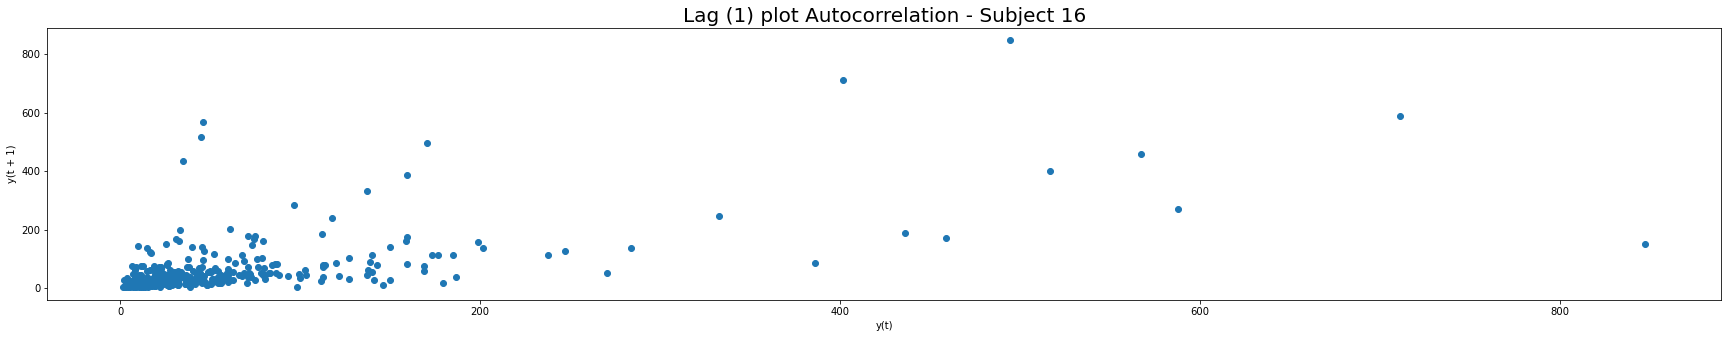

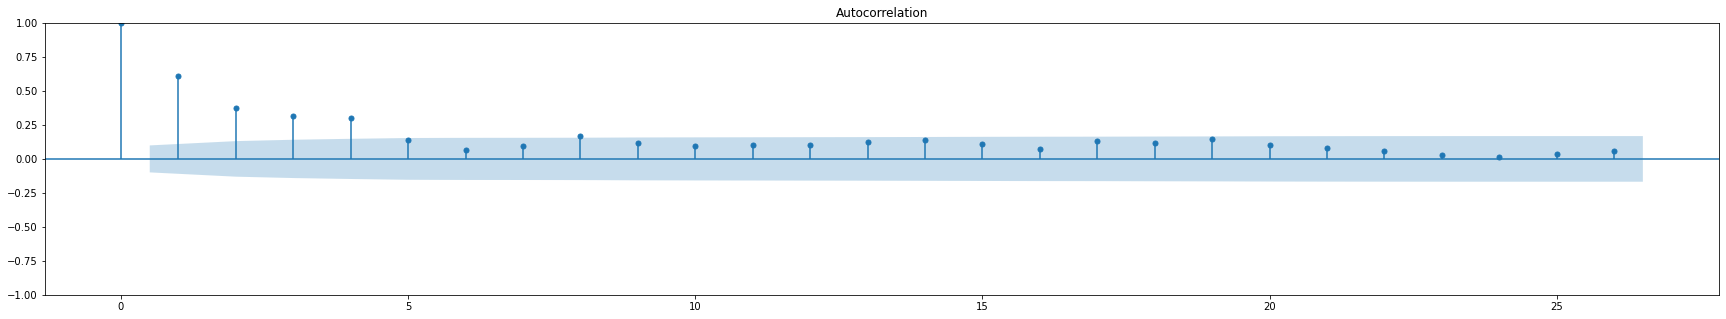

c:\Users\dadam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


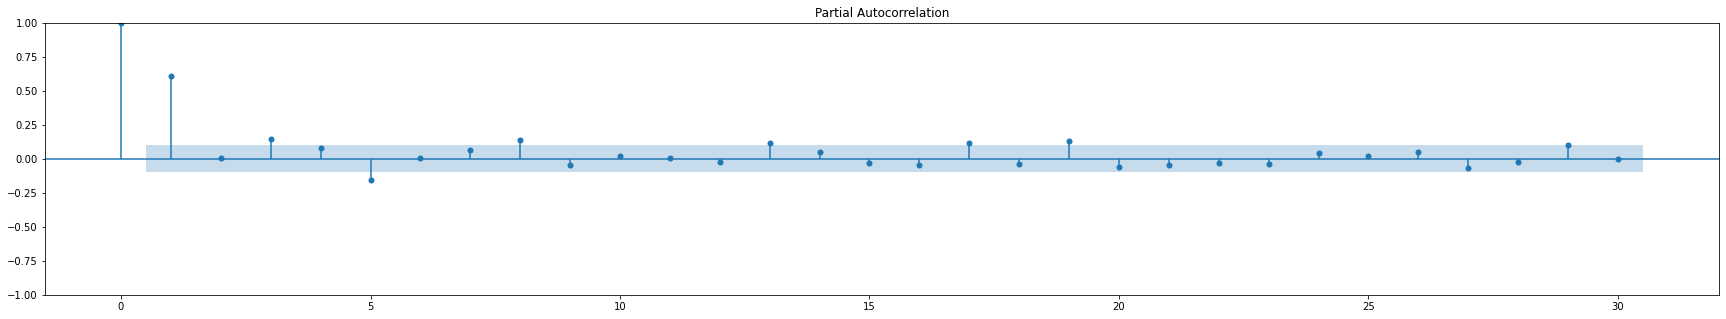

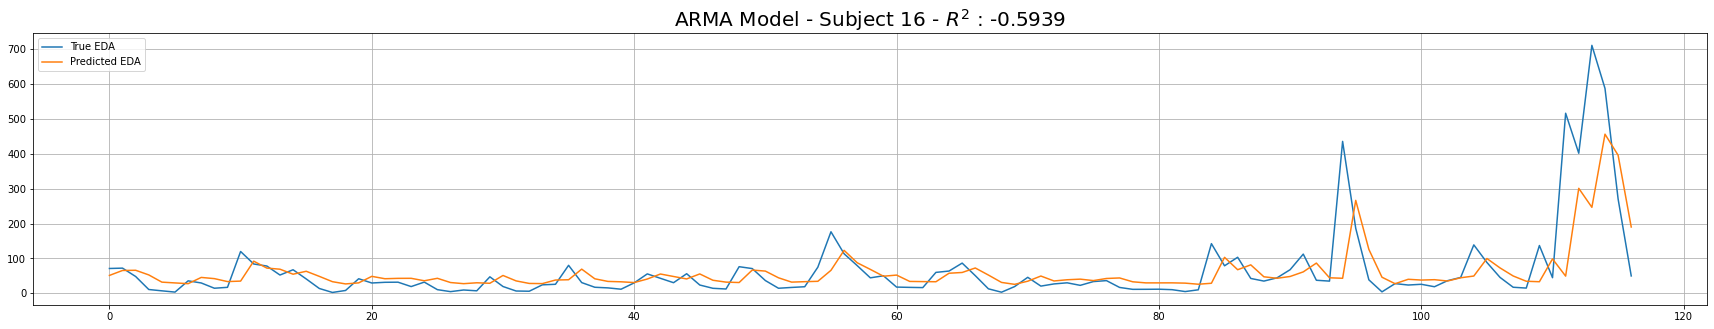

Reading C:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-17\eeg\sub-17_task-rest_proc-EDA_epoRejected.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
151 matching events found
No baseline correction applied


C:\Users\dadam\AppData\Local\Temp/ipykernel_15176/3020609557.py:14: RuntimeWarning: This filename (C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-17/eeg/sub-17_task-rest_proc-EDA_epoRejected.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(bp,


17


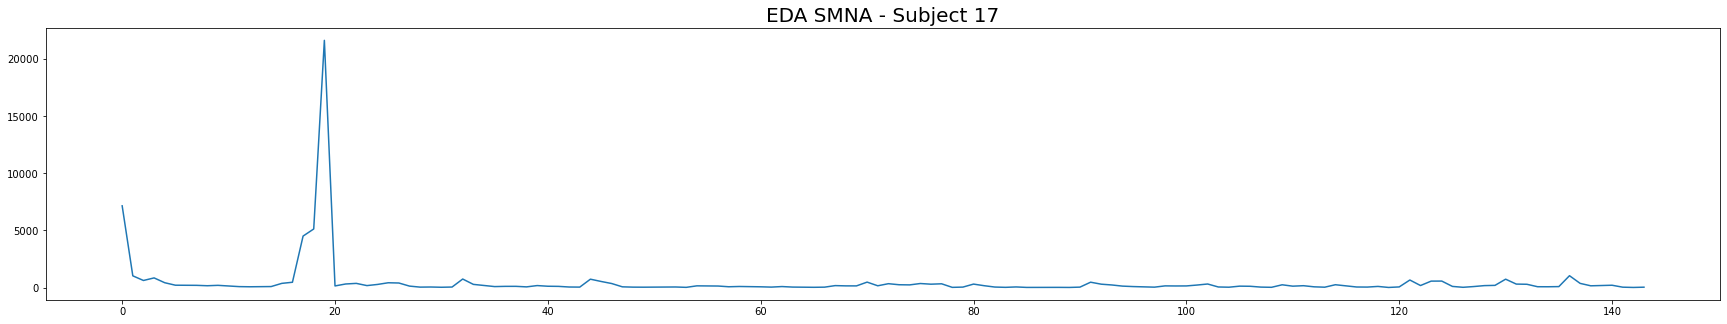

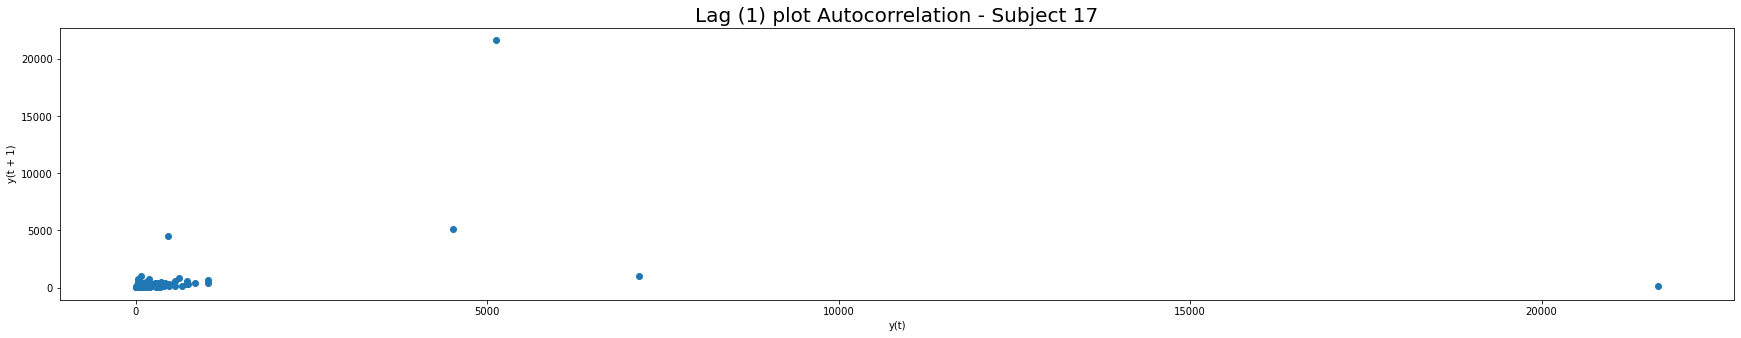

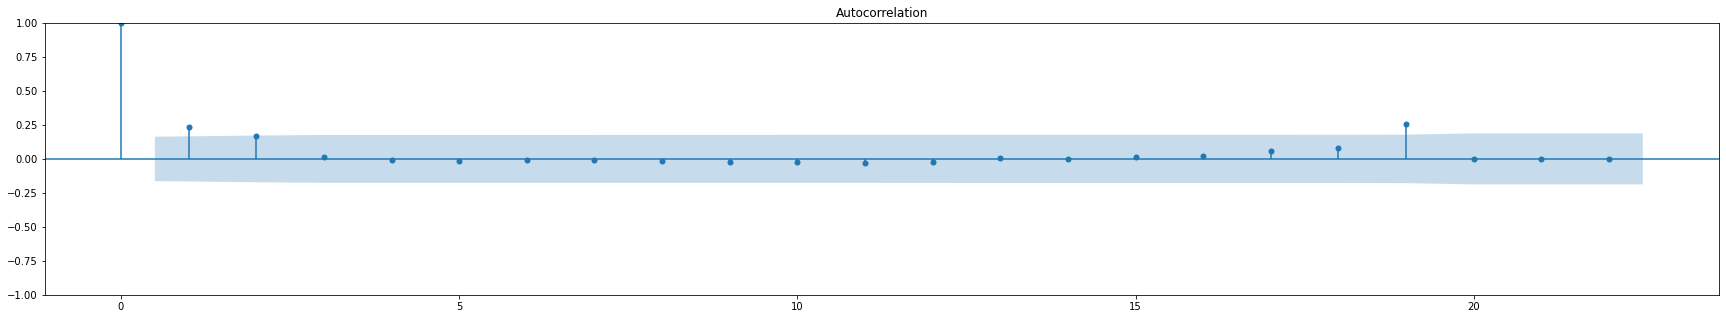

c:\Users\dadam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


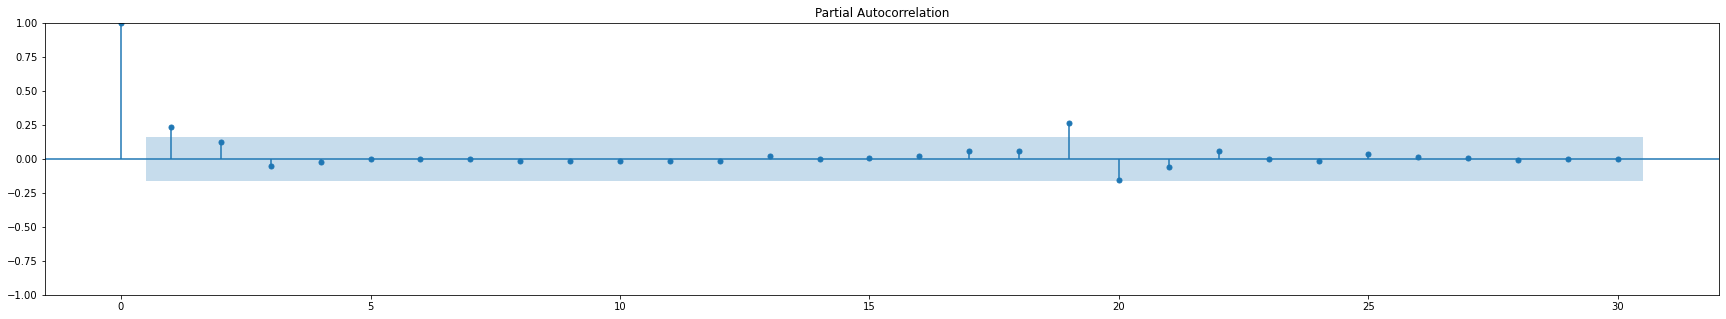

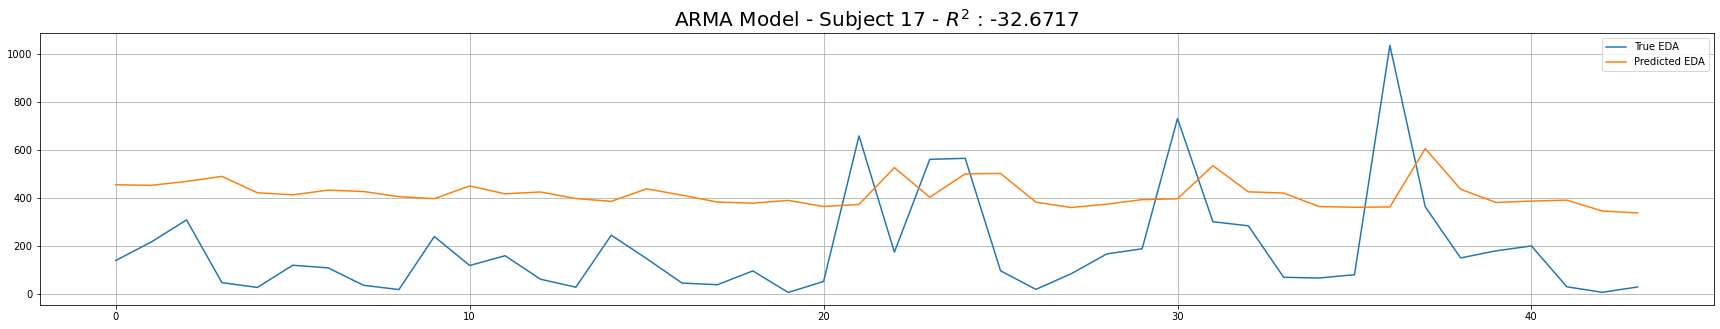

Reading C:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-18\eeg\sub-18_task-rest_proc-EDA_epoRejected.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
585 matching events found
No baseline correction applied


C:\Users\dadam\AppData\Local\Temp/ipykernel_15176/3020609557.py:14: RuntimeWarning: This filename (C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-18/eeg/sub-18_task-rest_proc-EDA_epoRejected.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(bp,


18


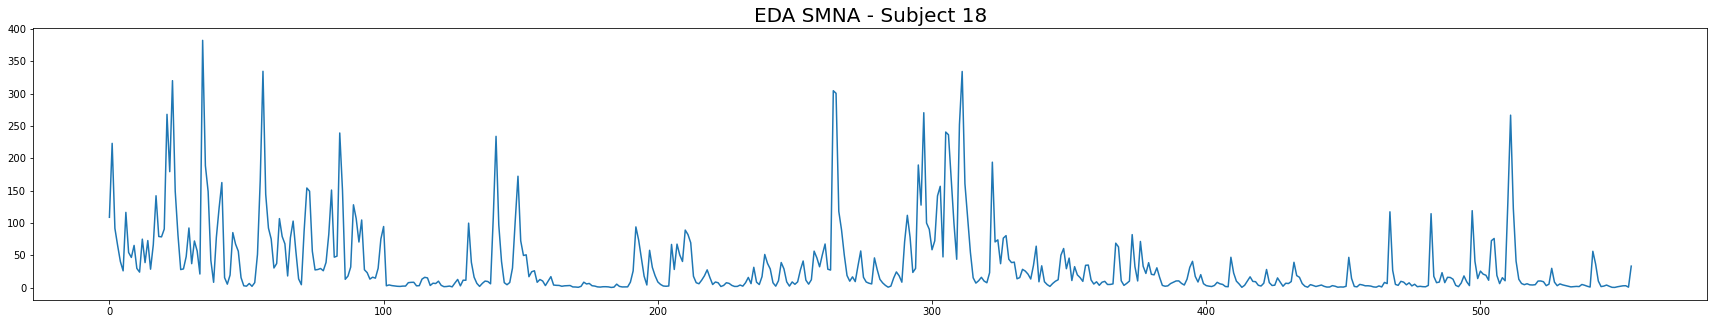

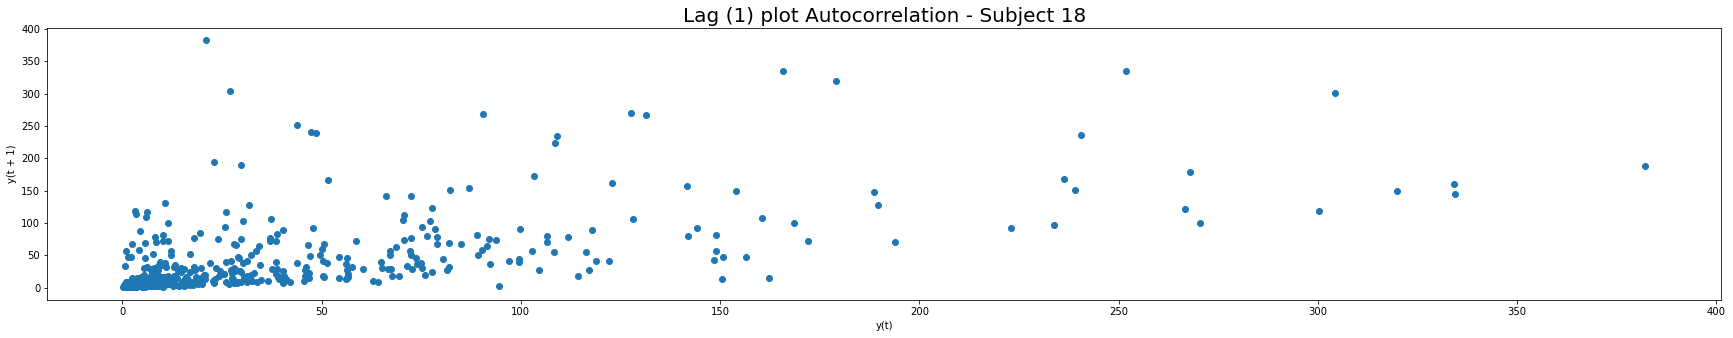

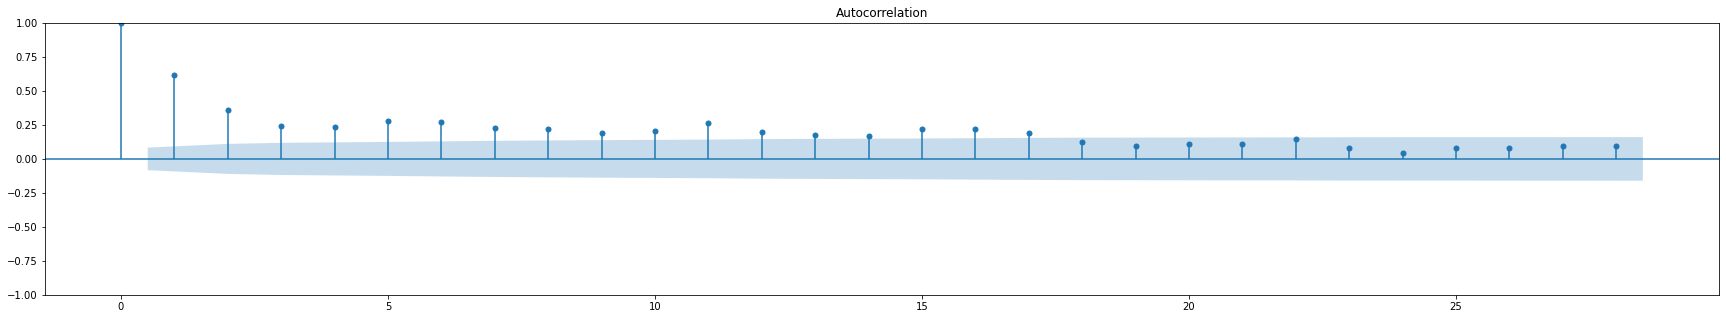

c:\Users\dadam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


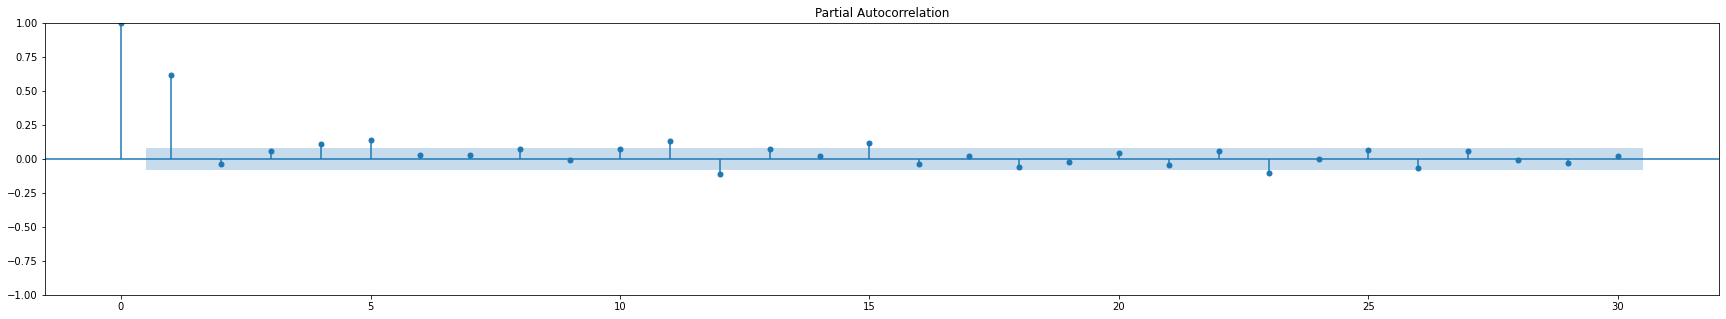

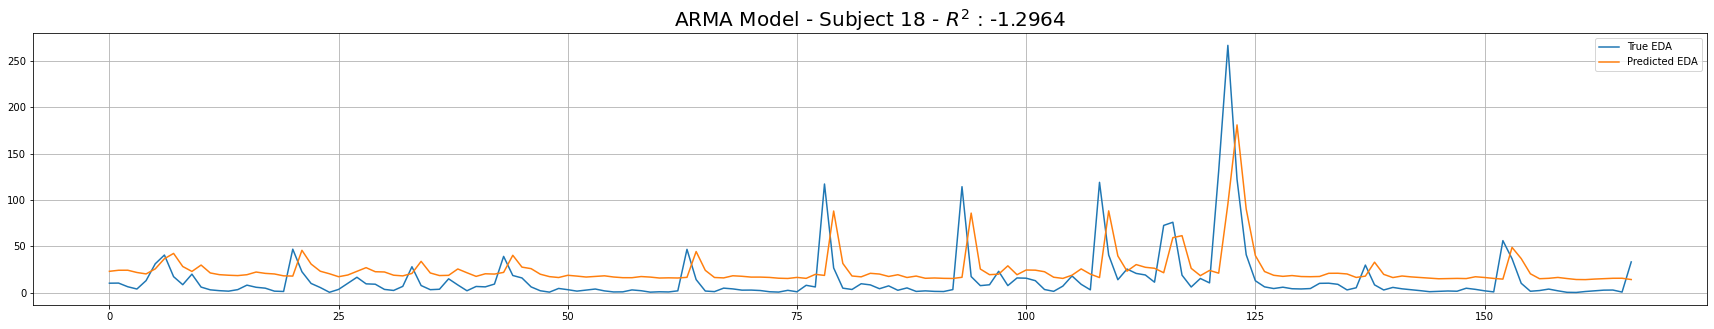

Reading C:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-19\eeg\sub-19_task-rest_proc-EDA_epoRejected.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
579 matching events found
No baseline correction applied


C:\Users\dadam\AppData\Local\Temp/ipykernel_15176/3020609557.py:14: RuntimeWarning: This filename (C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-19/eeg/sub-19_task-rest_proc-EDA_epoRejected.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(bp,


19


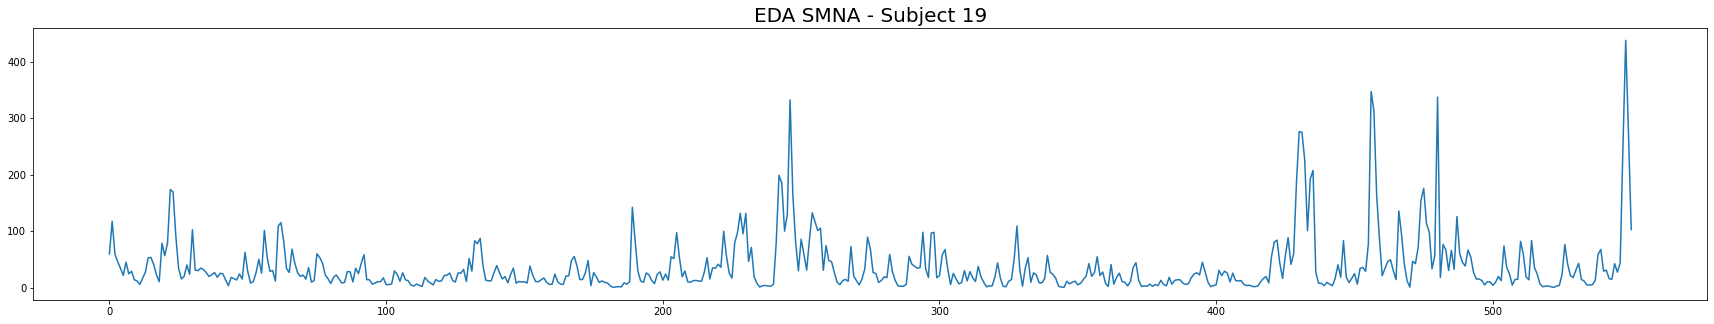

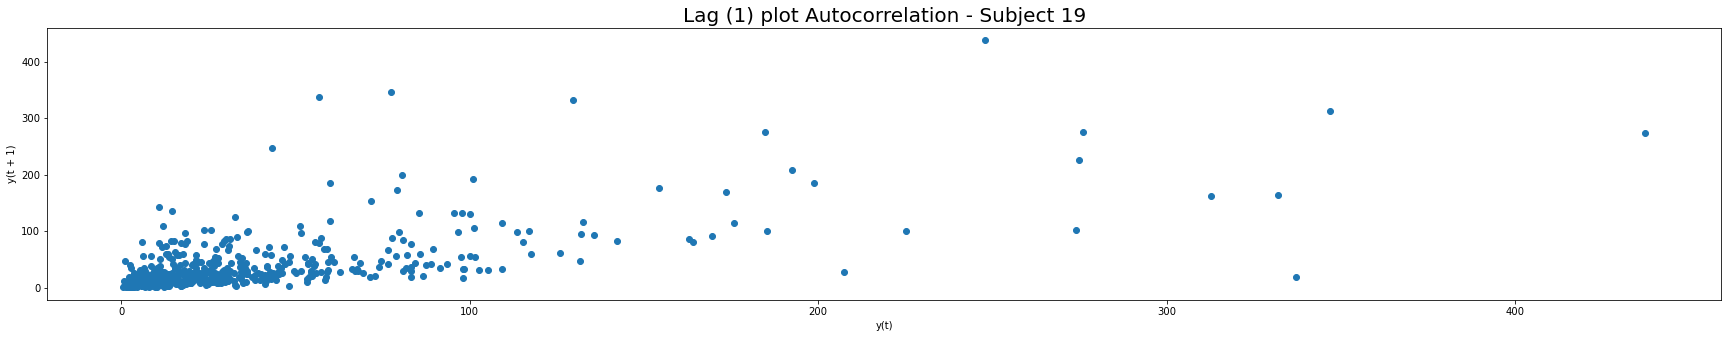

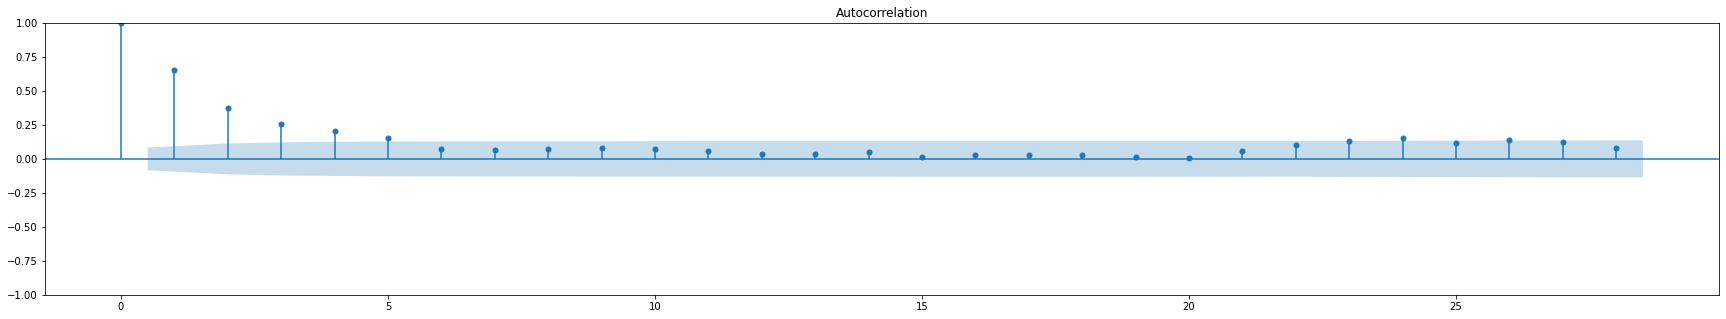

c:\Users\dadam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


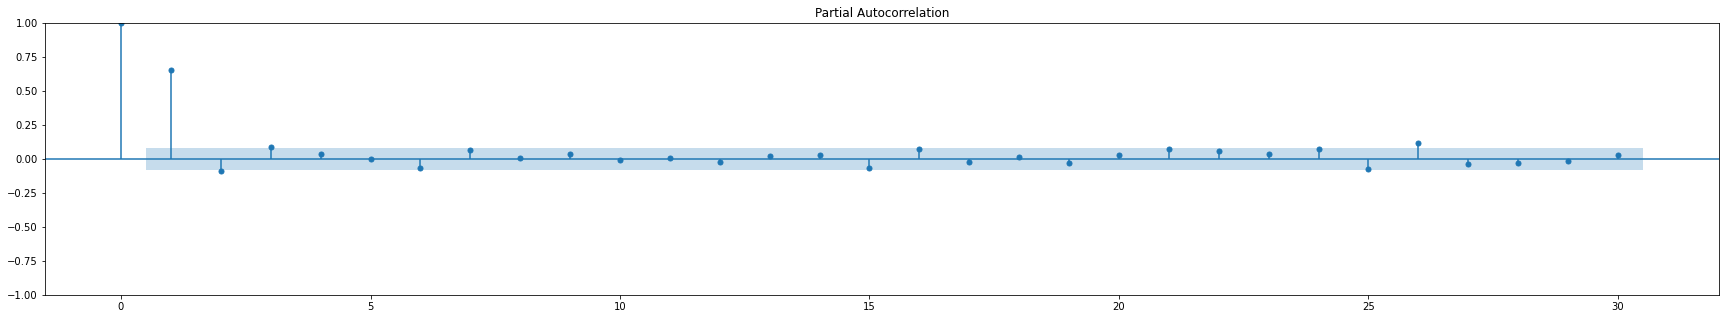

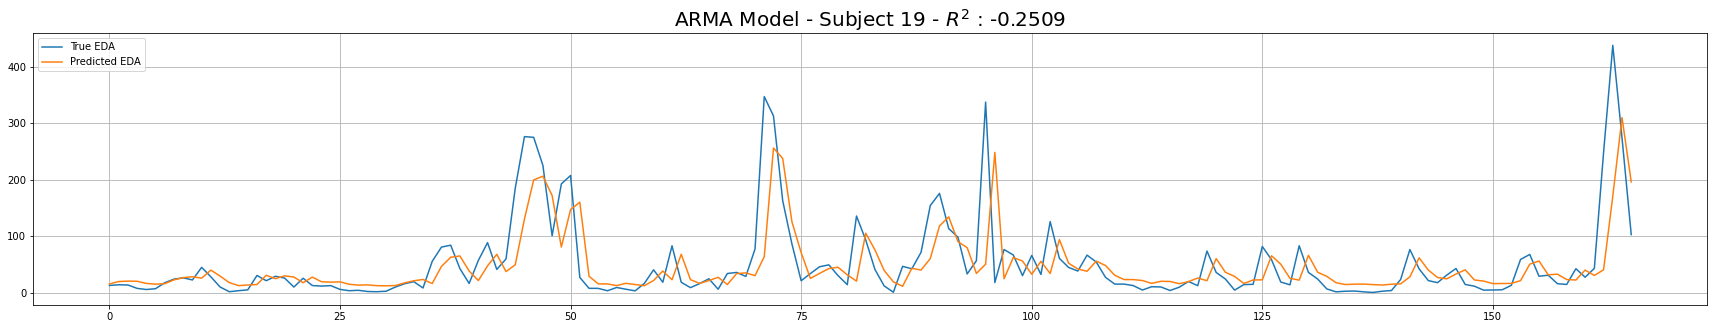

Reading C:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-20\eeg\sub-20_task-rest_proc-EDA_epoRejected.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
580 matching events found
No baseline correction applied


C:\Users\dadam\AppData\Local\Temp/ipykernel_15176/3020609557.py:14: RuntimeWarning: This filename (C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-20/eeg/sub-20_task-rest_proc-EDA_epoRejected.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(bp,


20


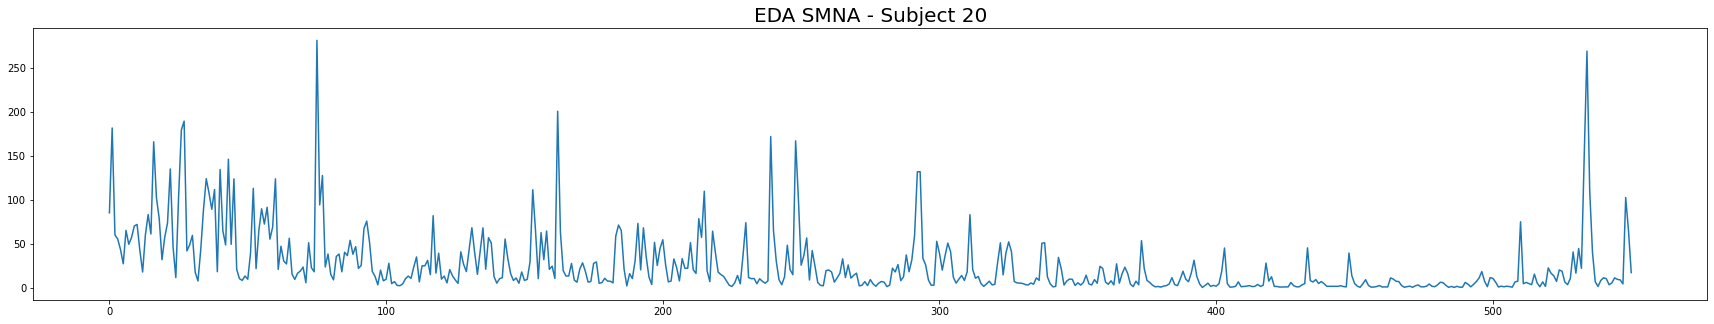

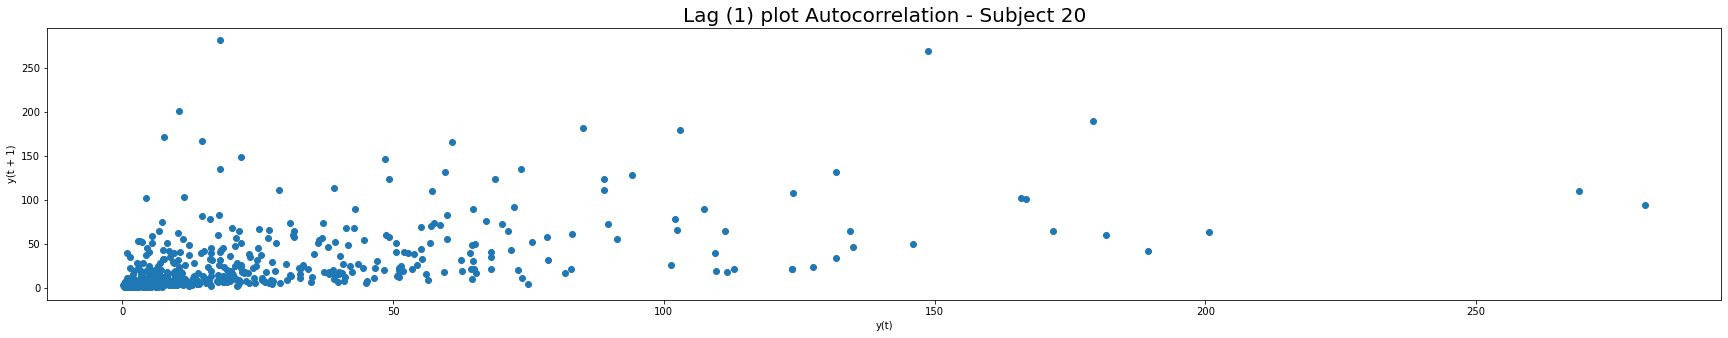

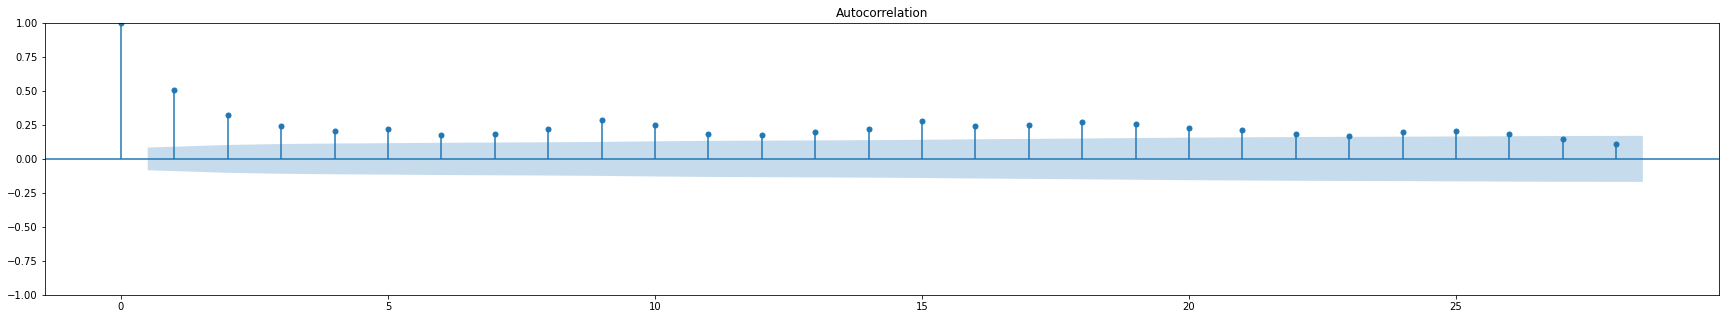

c:\Users\dadam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


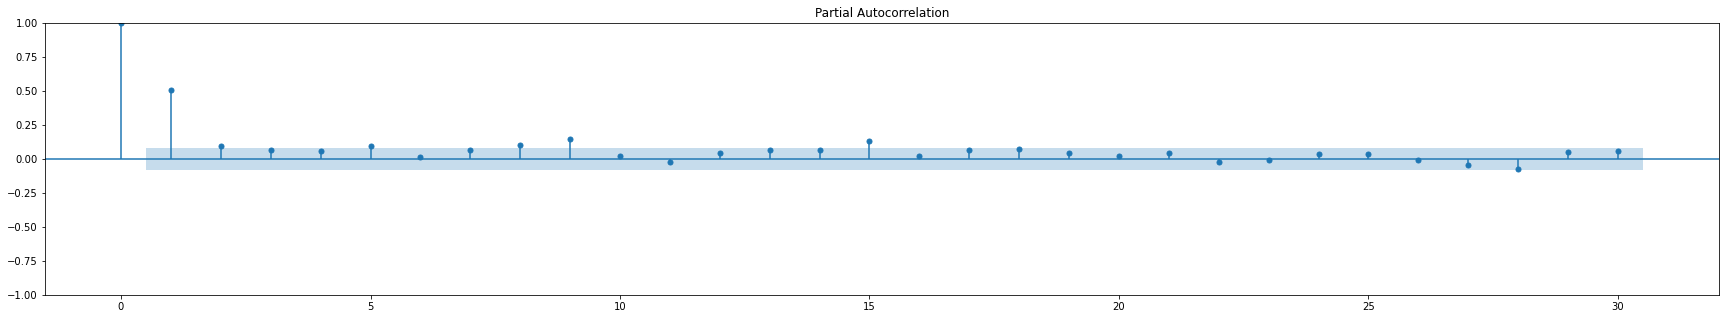

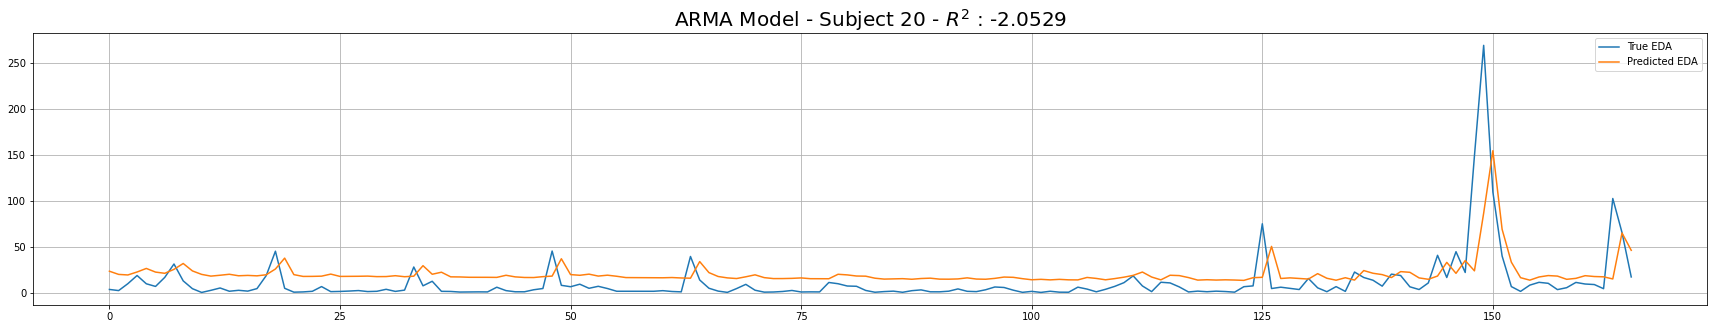

Reading C:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-21\eeg\sub-21_task-rest_proc-EDA_epoRejected.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
601 matching events found
No baseline correction applied


C:\Users\dadam\AppData\Local\Temp/ipykernel_15176/3020609557.py:14: RuntimeWarning: This filename (C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-21/eeg/sub-21_task-rest_proc-EDA_epoRejected.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(bp,


21


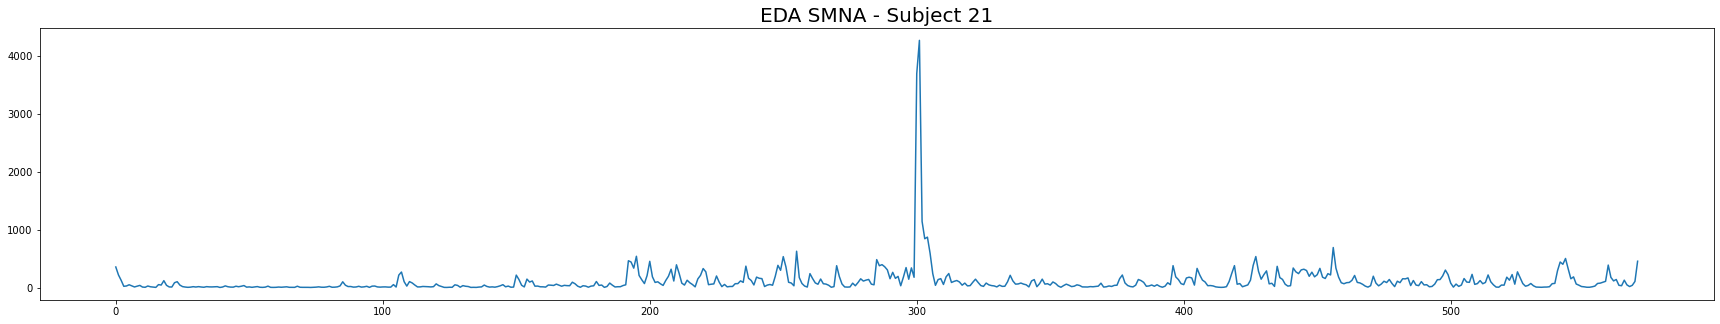

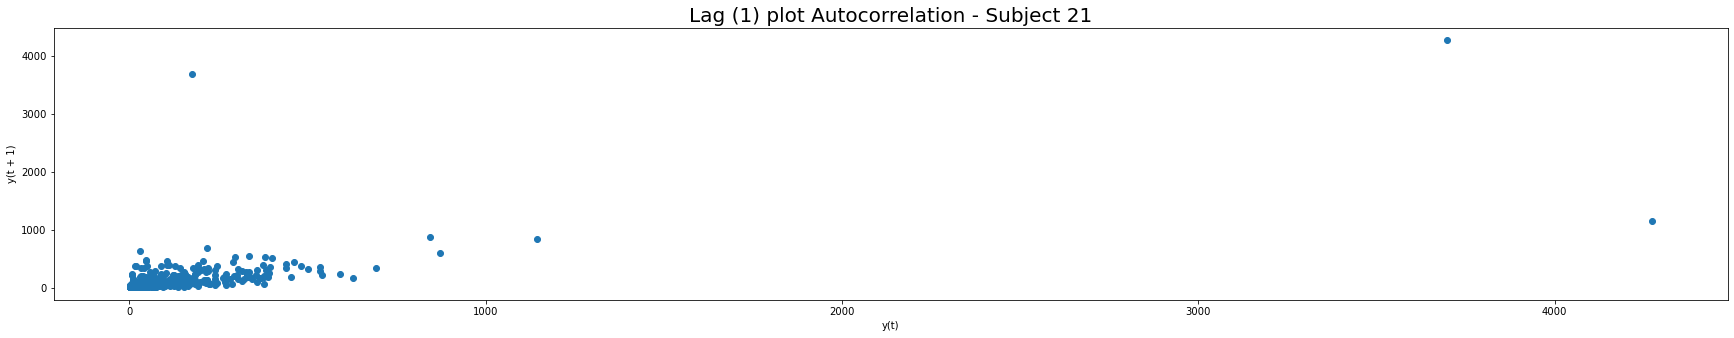

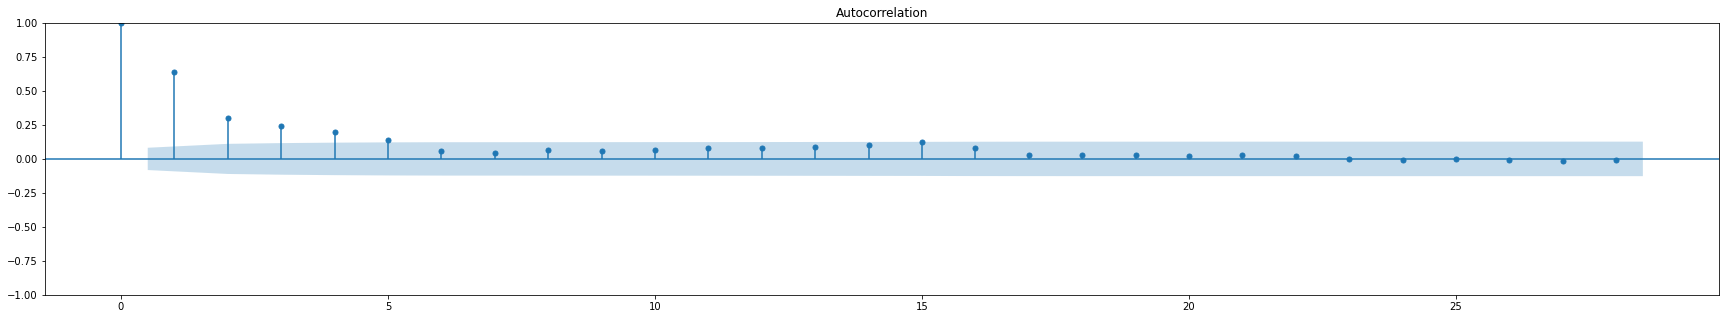

c:\Users\dadam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


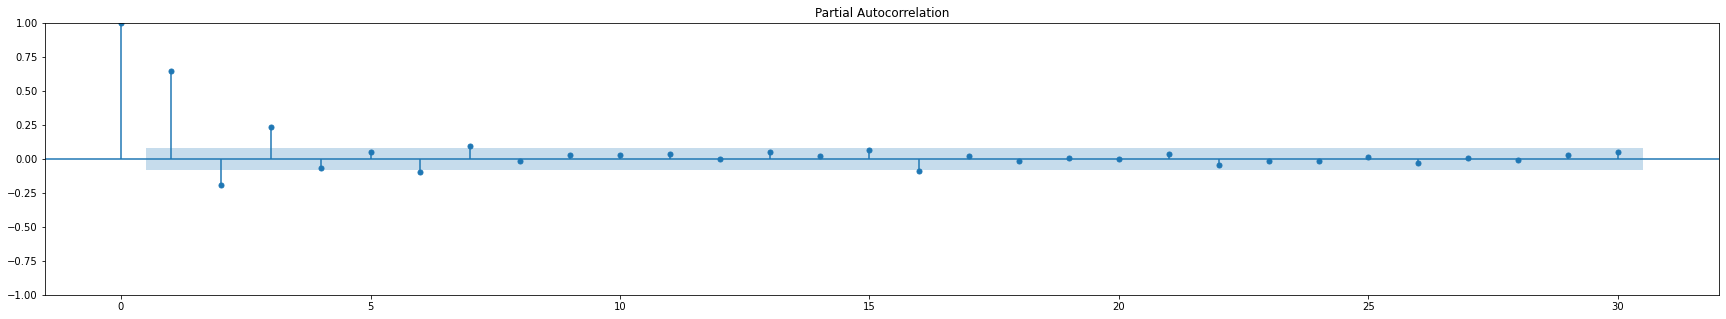

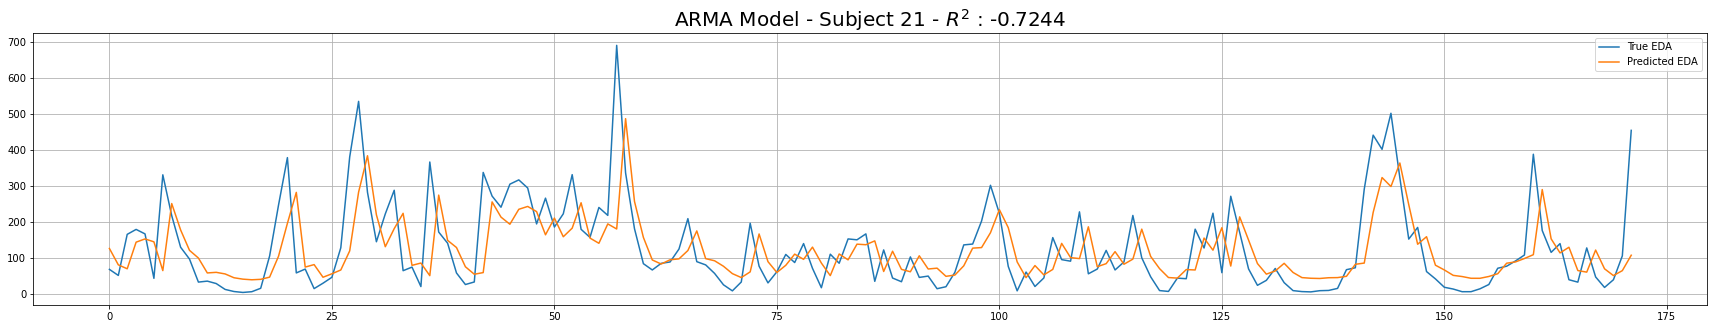

Reading C:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-22\eeg\sub-22_task-rest_proc-EDA_epoRejected.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
525 matching events found
No baseline correction applied


C:\Users\dadam\AppData\Local\Temp/ipykernel_15176/3020609557.py:14: RuntimeWarning: This filename (C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-22/eeg/sub-22_task-rest_proc-EDA_epoRejected.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(bp,


22


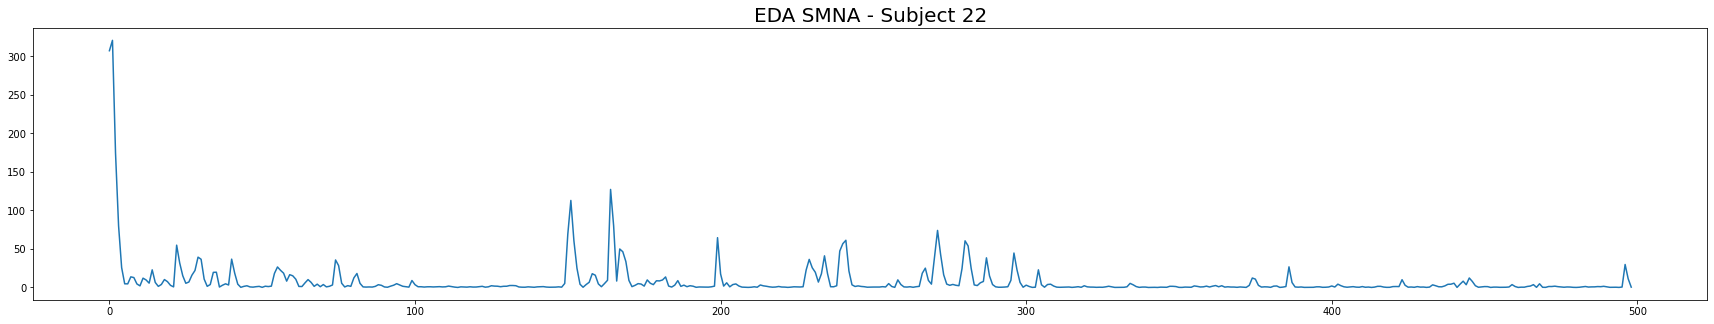

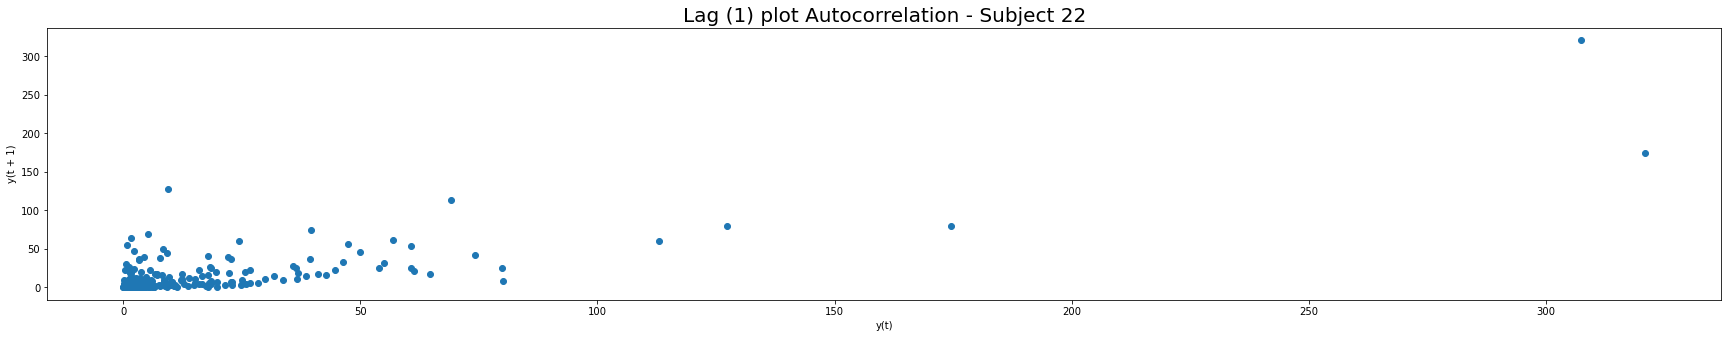

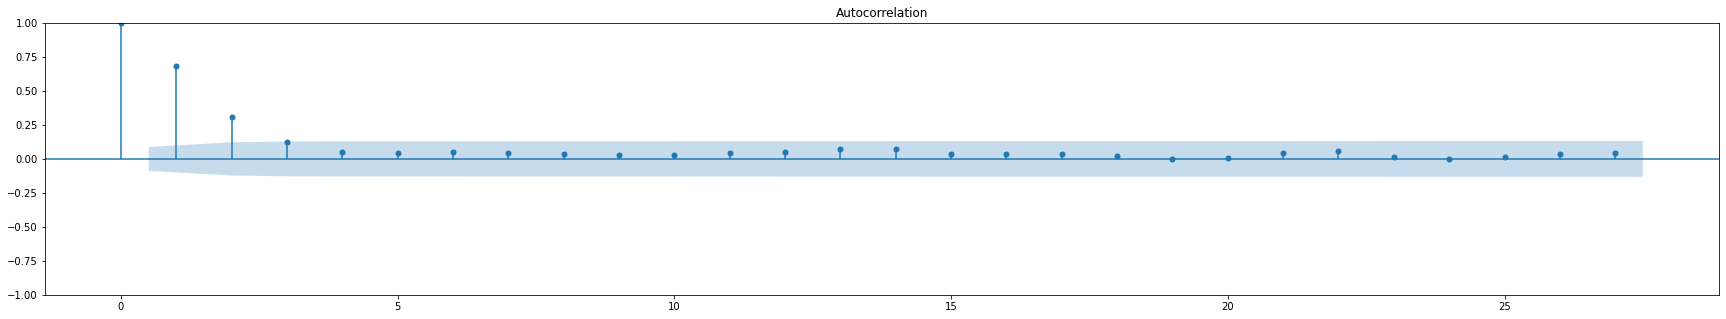

c:\Users\dadam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


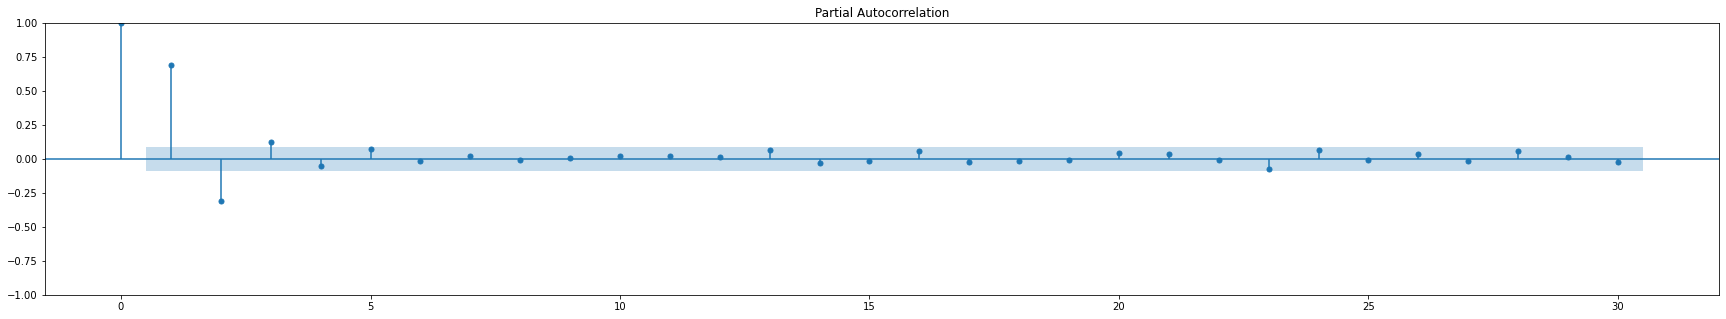

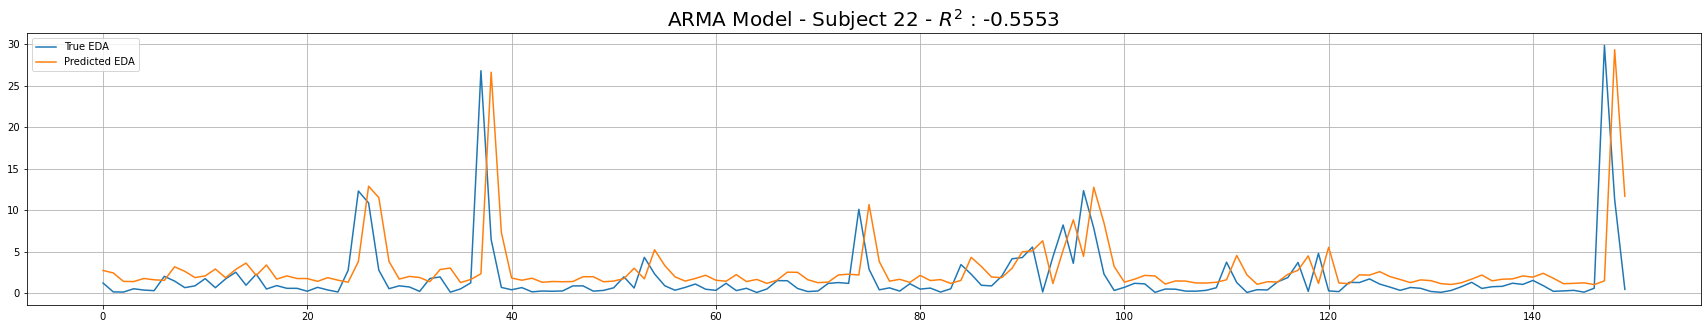

Reading C:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-23\eeg\sub-23_task-rest_proc-EDA_epoRejected.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata


C:\Users\dadam\AppData\Local\Temp/ipykernel_15176/3020609557.py:14: RuntimeWarning: This filename (C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-23/eeg/sub-23_task-rest_proc-EDA_epoRejected.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(bp,


598 matching events found
No baseline correction applied
23


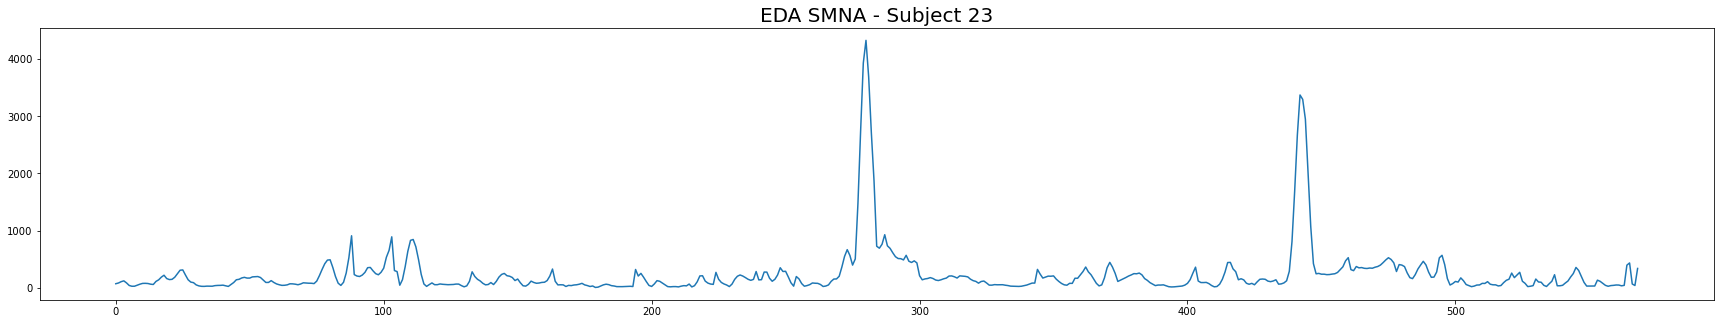

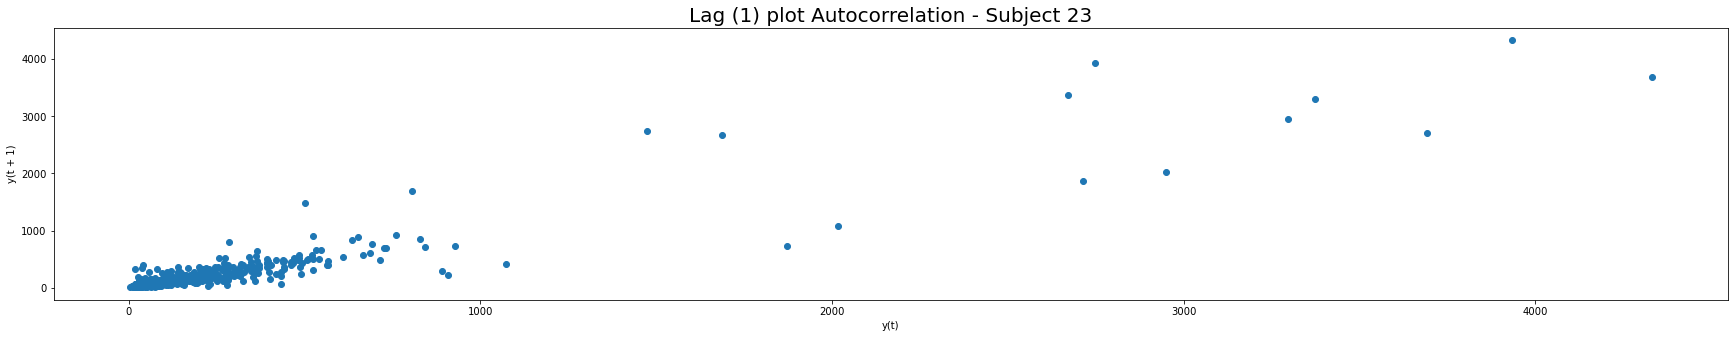

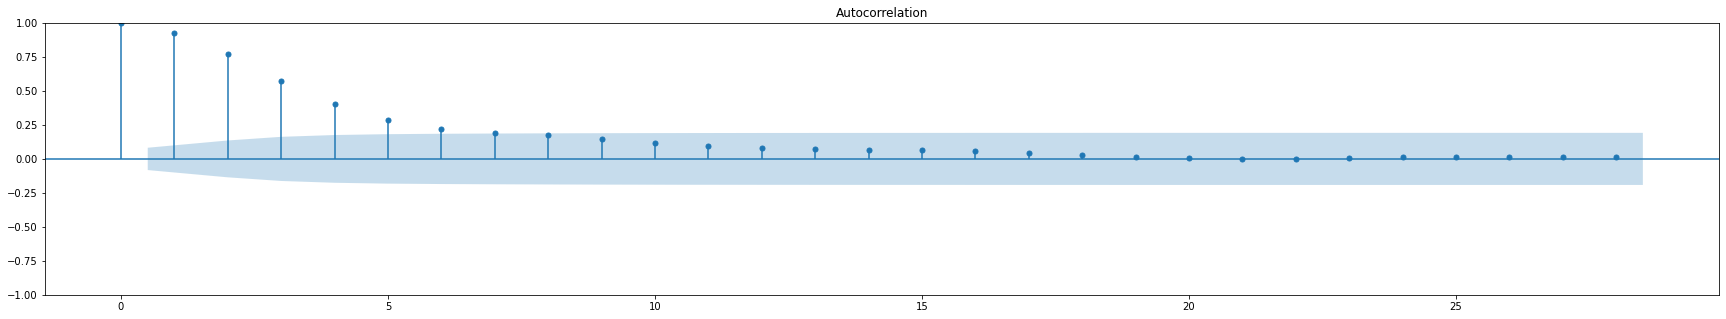

c:\Users\dadam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


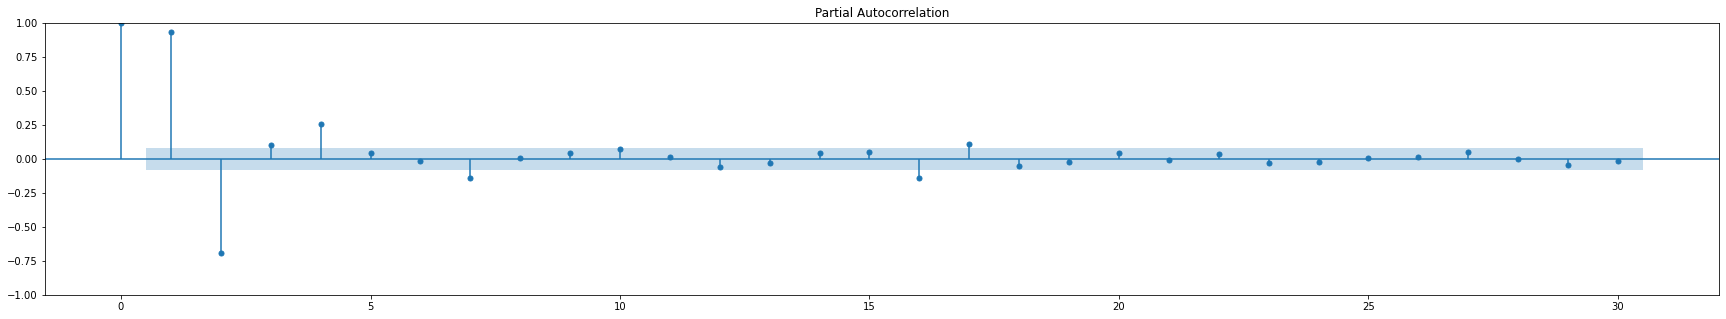

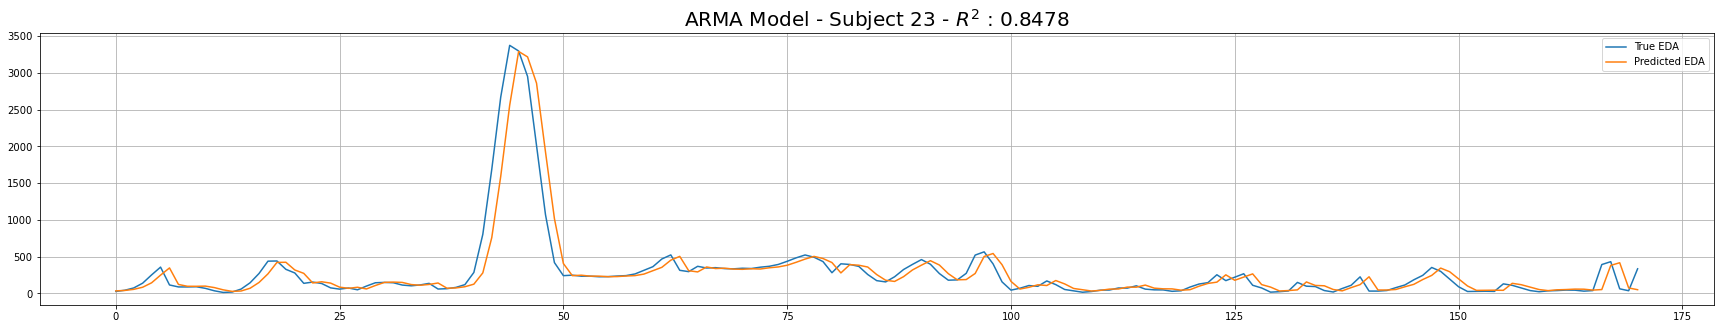

Reading C:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-24\eeg\sub-24_task-rest_proc-EDA_epoRejected.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
565 matching events found
No baseline correction applied


C:\Users\dadam\AppData\Local\Temp/ipykernel_15176/3020609557.py:14: RuntimeWarning: This filename (C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-24/eeg/sub-24_task-rest_proc-EDA_epoRejected.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(bp,


24


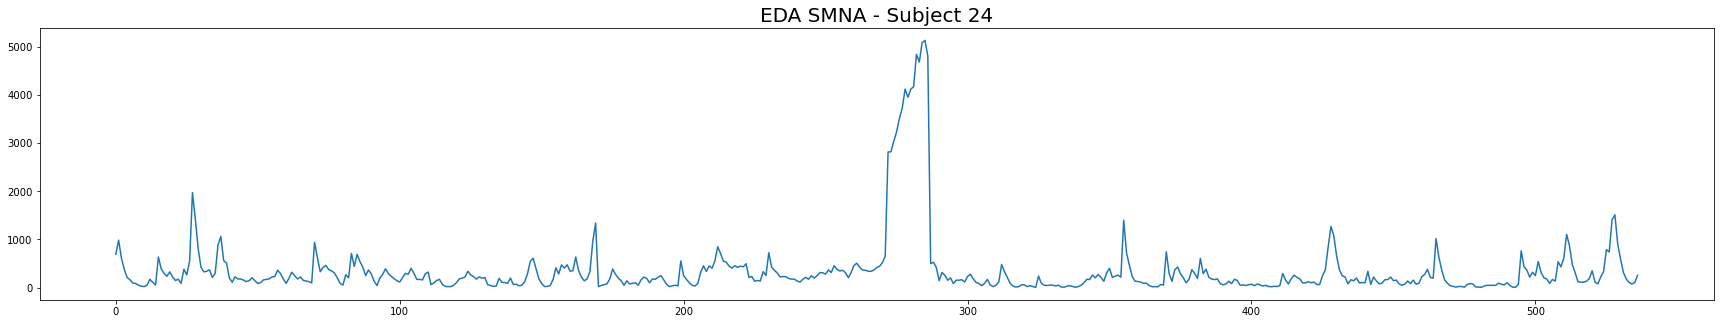

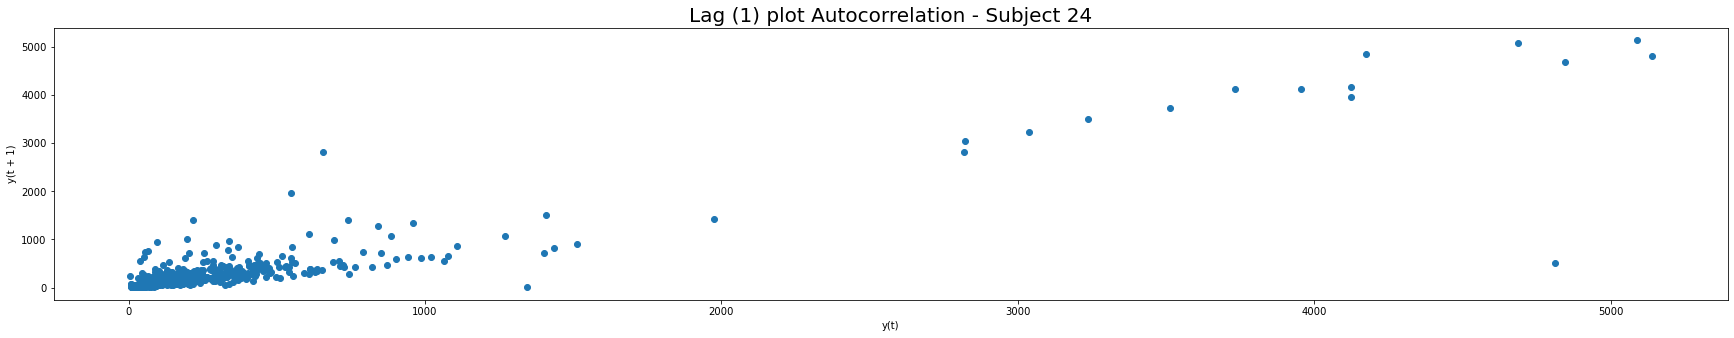

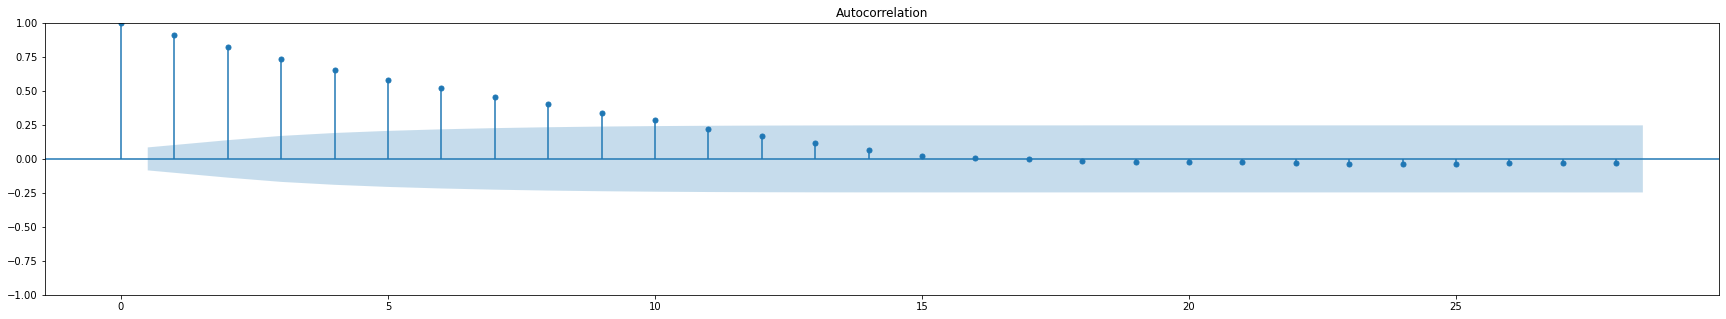

c:\Users\dadam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


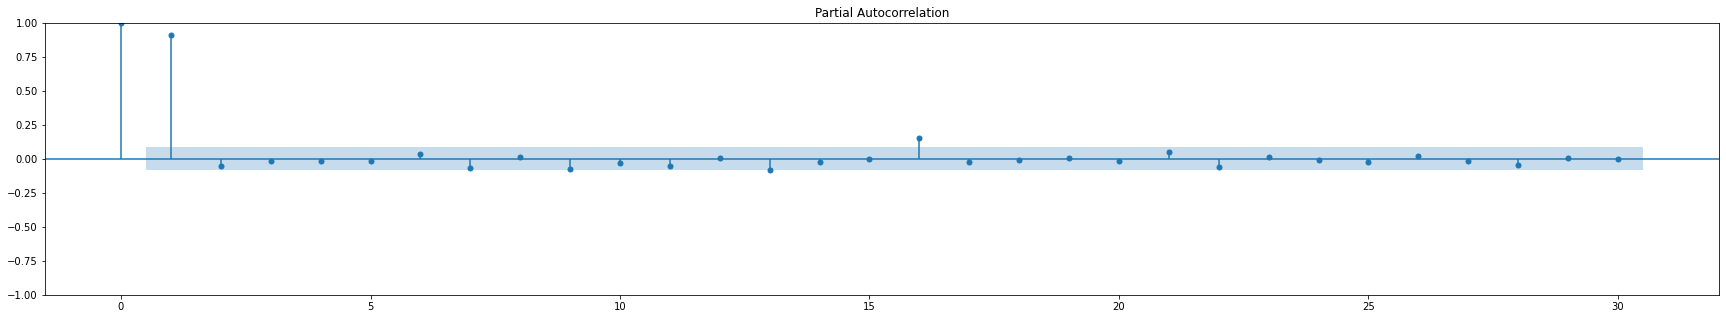

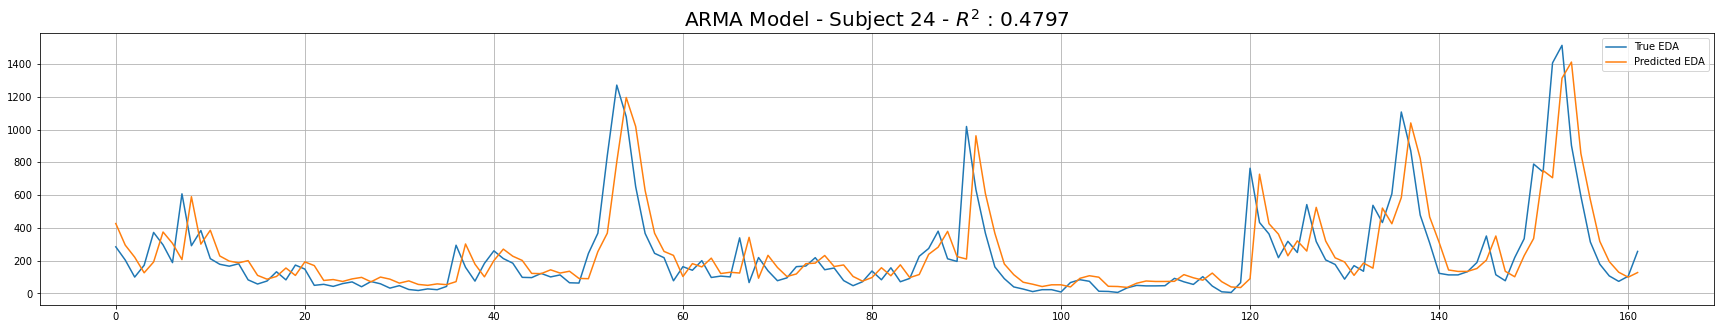

Reading C:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-25\eeg\sub-25_task-rest_proc-EDA_epoRejected.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
312 matching events found
No baseline correction applied


C:\Users\dadam\AppData\Local\Temp/ipykernel_15176/3020609557.py:14: RuntimeWarning: This filename (C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-25/eeg/sub-25_task-rest_proc-EDA_epoRejected.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(bp,


25


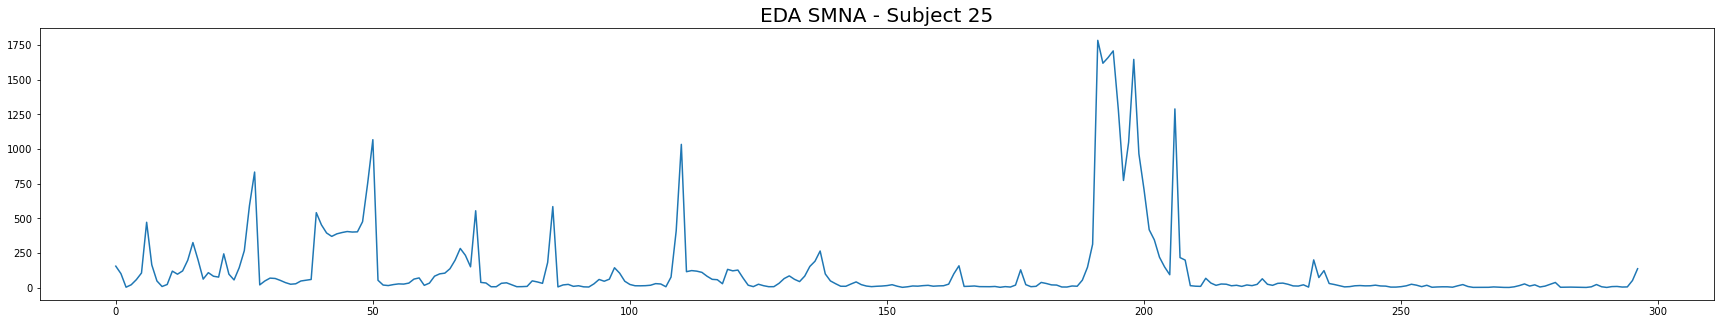

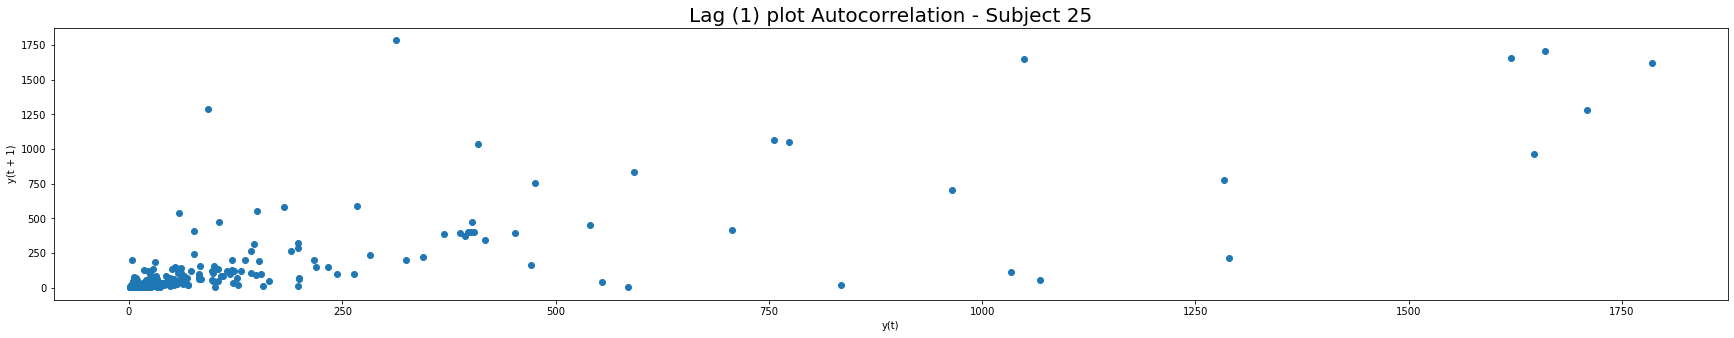

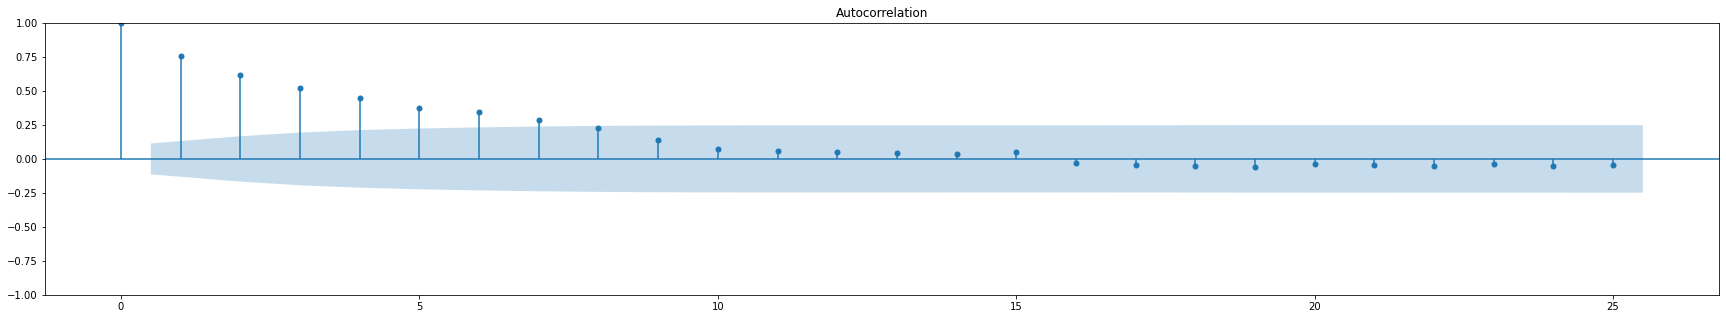

c:\Users\dadam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


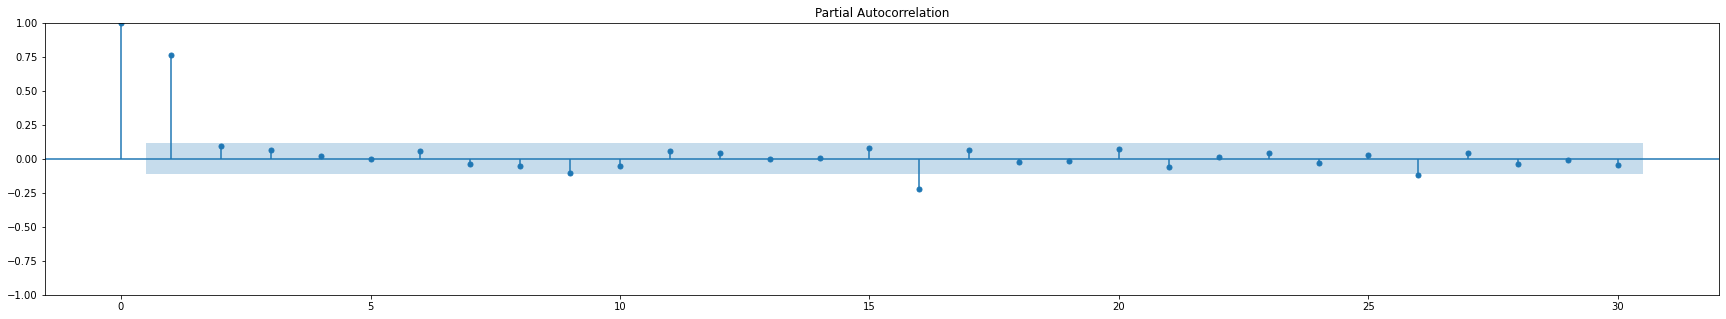

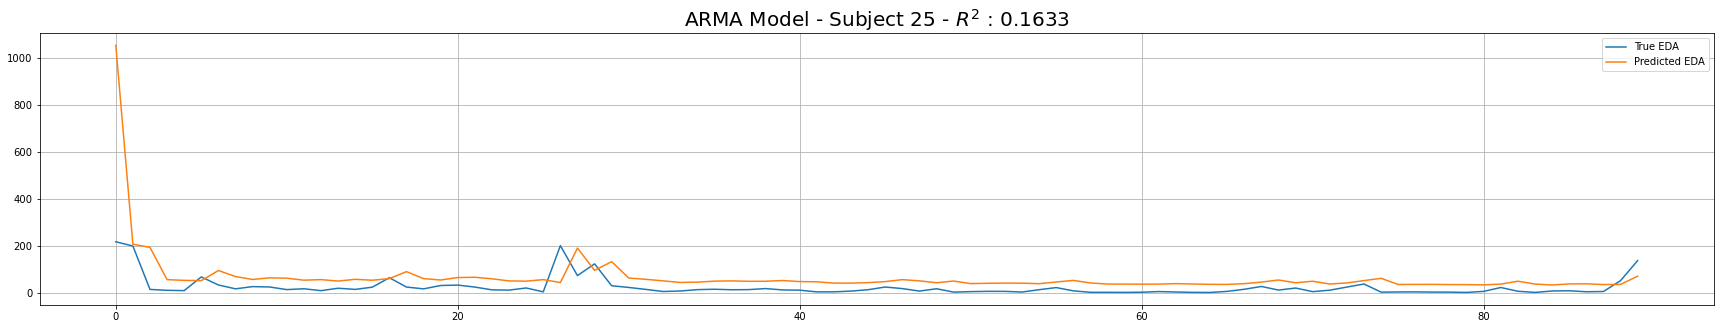

Reading C:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-26\eeg\sub-26_task-rest_proc-EDA_epoRejected.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
149 matching events found
No baseline correction applied


C:\Users\dadam\AppData\Local\Temp/ipykernel_15176/3020609557.py:14: RuntimeWarning: This filename (C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-26/eeg/sub-26_task-rest_proc-EDA_epoRejected.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(bp,


26


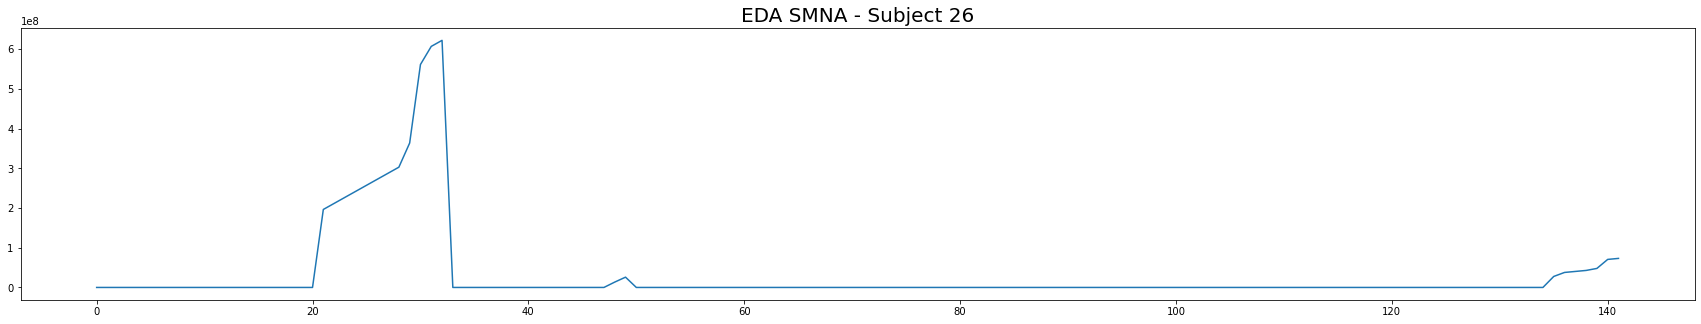

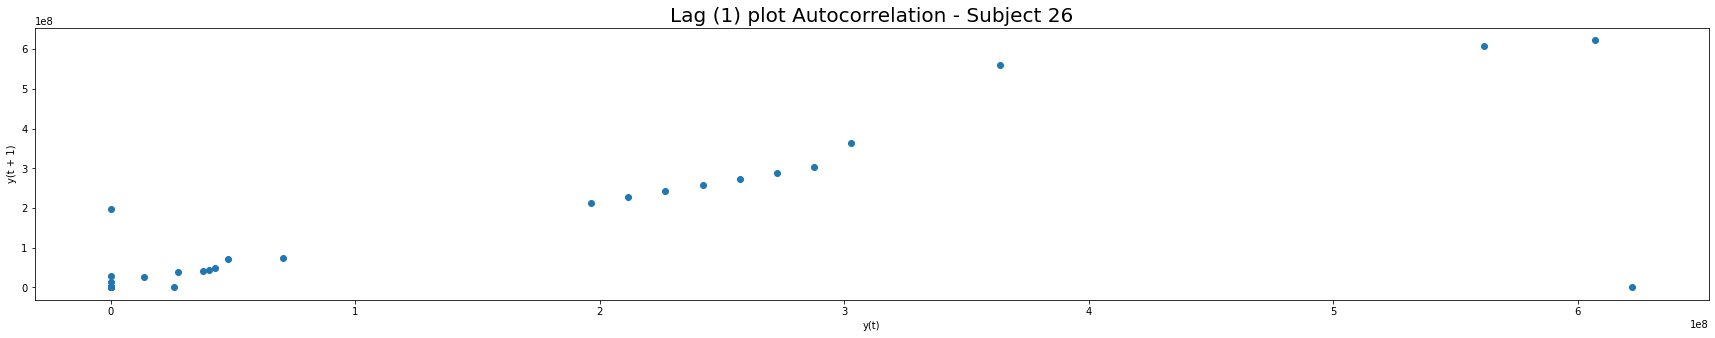

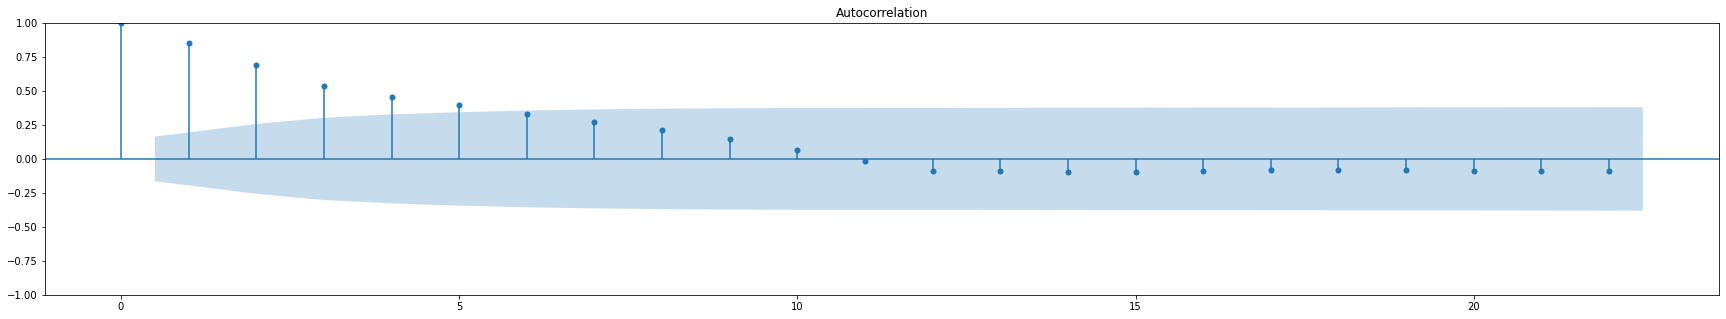

c:\Users\dadam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


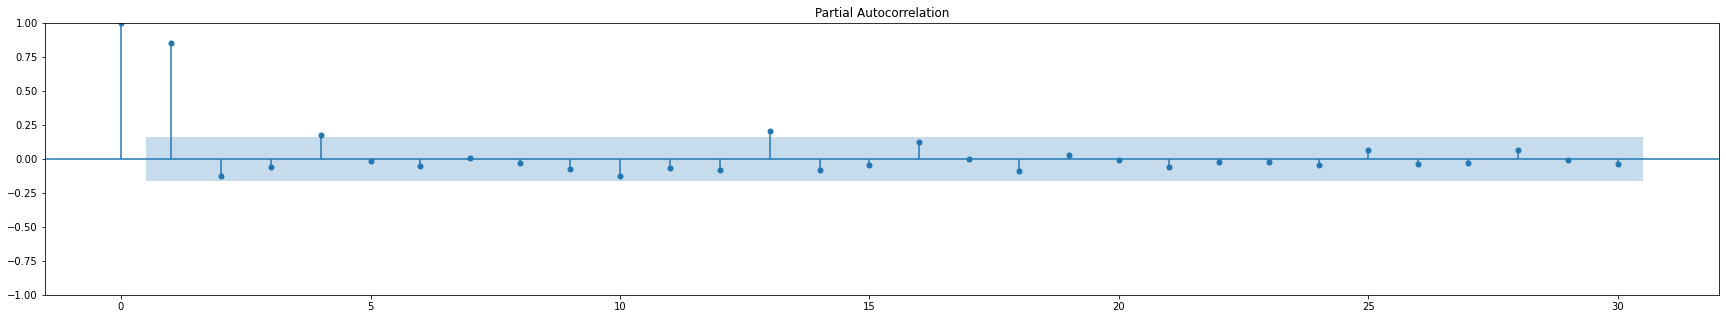

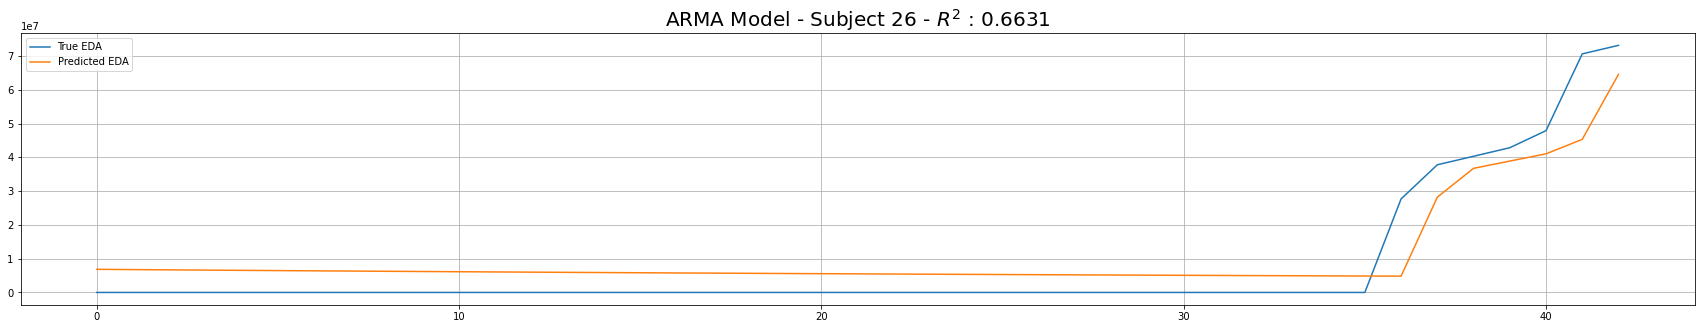

Reading C:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-27\eeg\sub-27_task-rest_proc-EDA_epoRejected.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
593 matching events found
No baseline correction applied


C:\Users\dadam\AppData\Local\Temp/ipykernel_15176/3020609557.py:14: RuntimeWarning: This filename (C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-27/eeg/sub-27_task-rest_proc-EDA_epoRejected.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(bp,


27


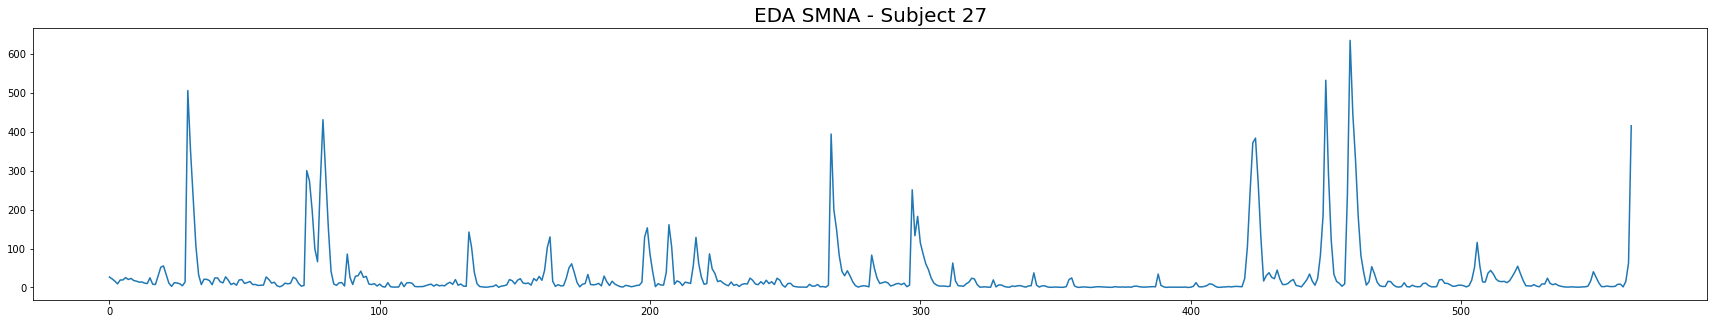

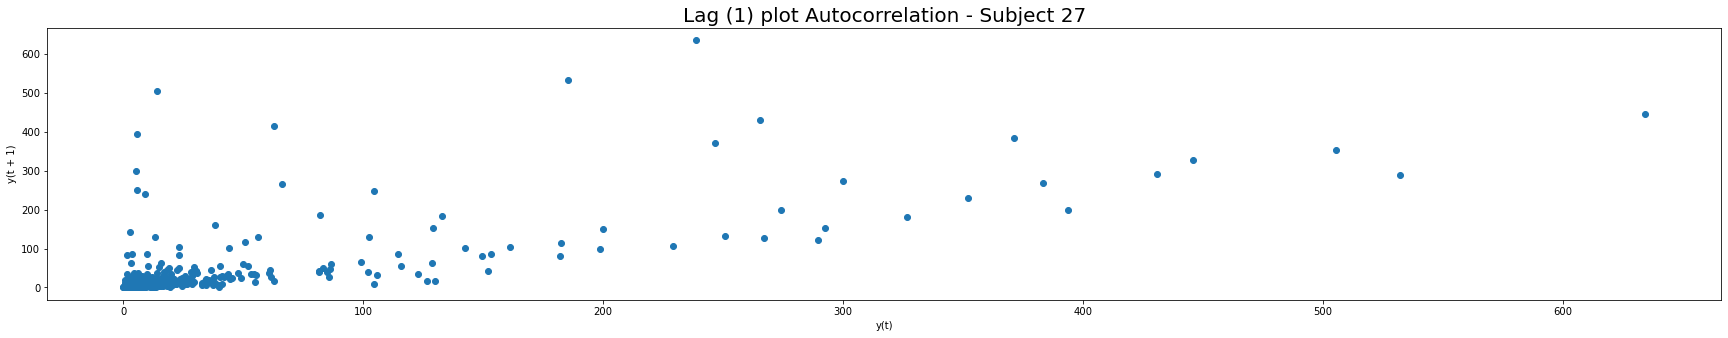

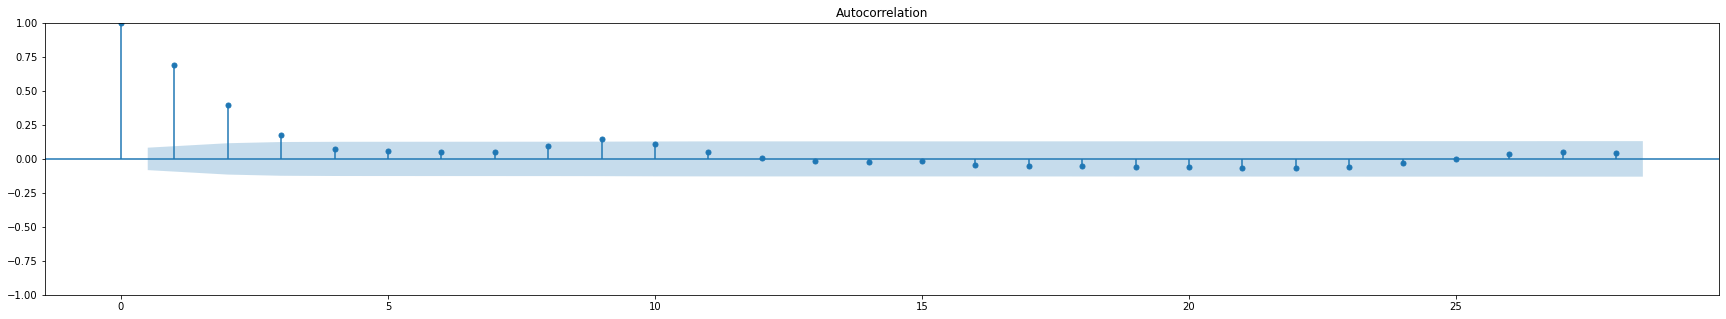

c:\Users\dadam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


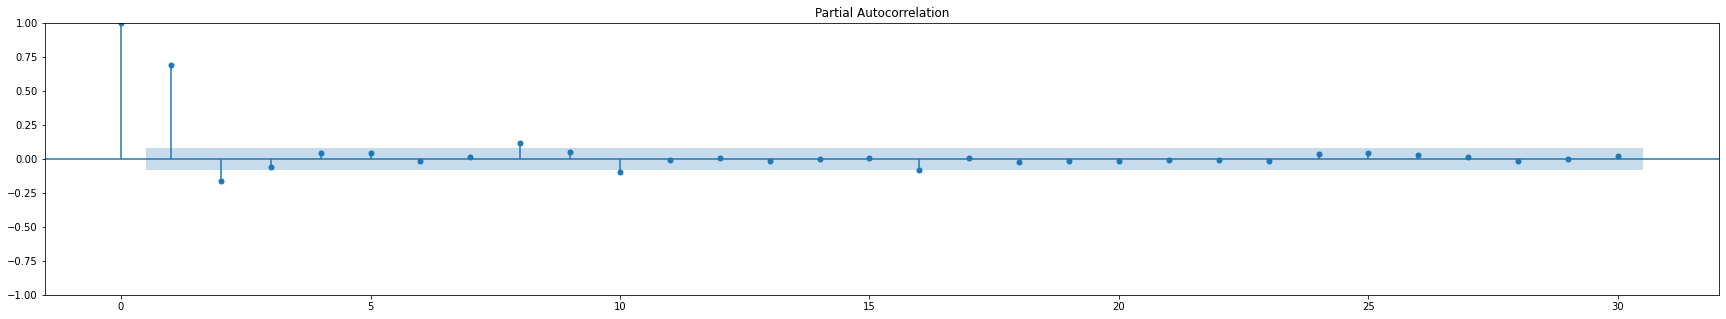

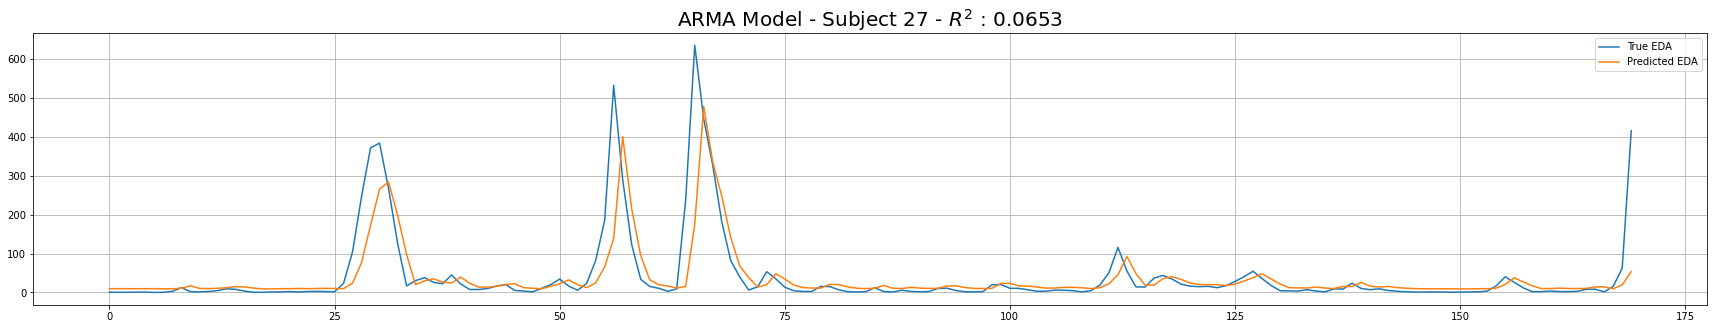

Reading C:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-28\eeg\sub-28_task-rest_proc-EDA_epoRejected.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
457 matching events found
No baseline correction applied


C:\Users\dadam\AppData\Local\Temp/ipykernel_15176/3020609557.py:14: RuntimeWarning: This filename (C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-28/eeg/sub-28_task-rest_proc-EDA_epoRejected.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(bp,


28


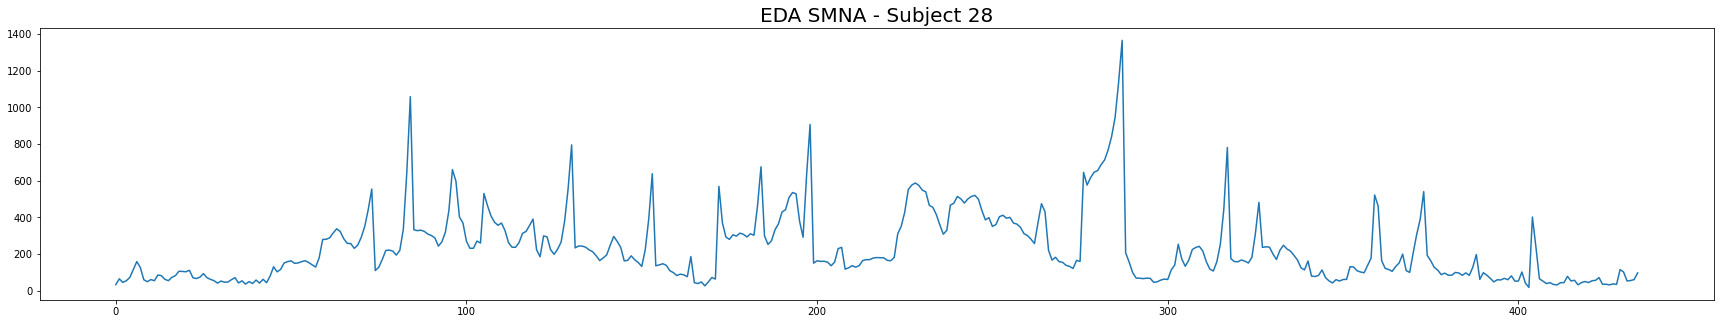

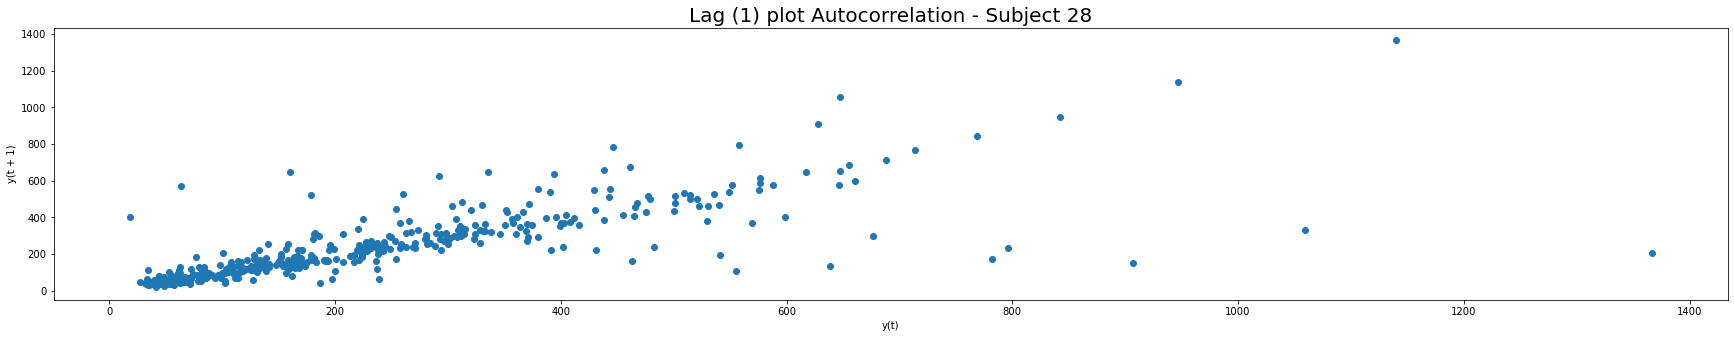

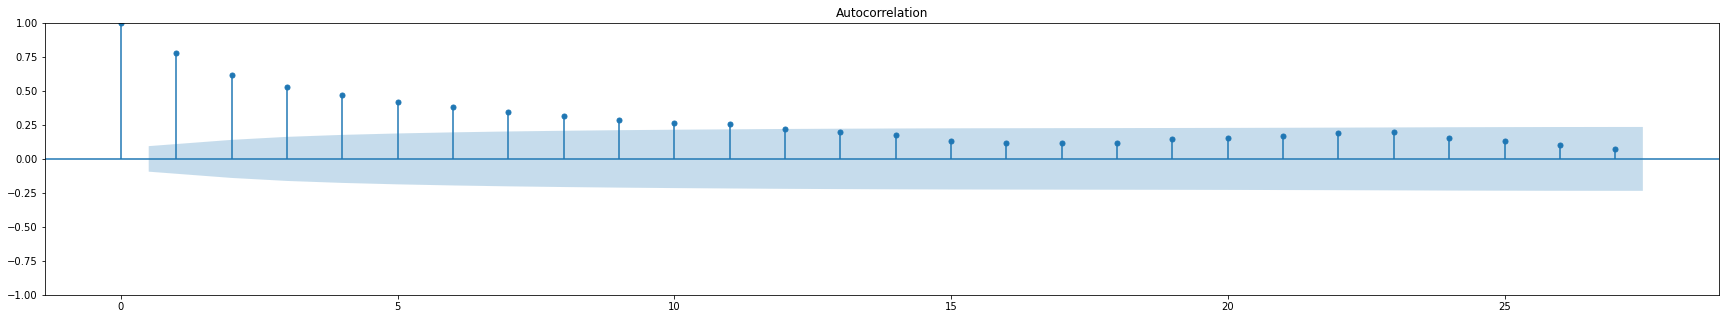

c:\Users\dadam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


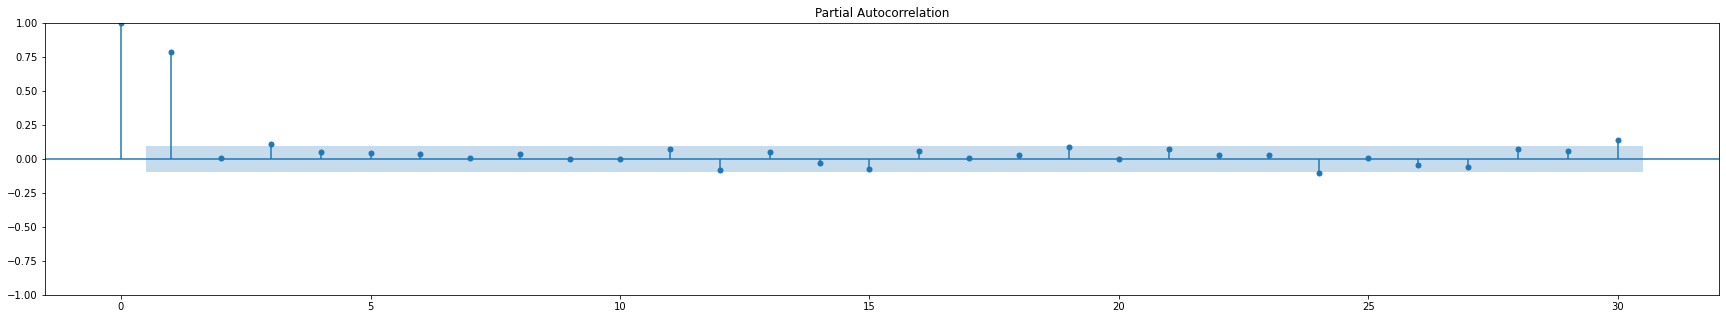

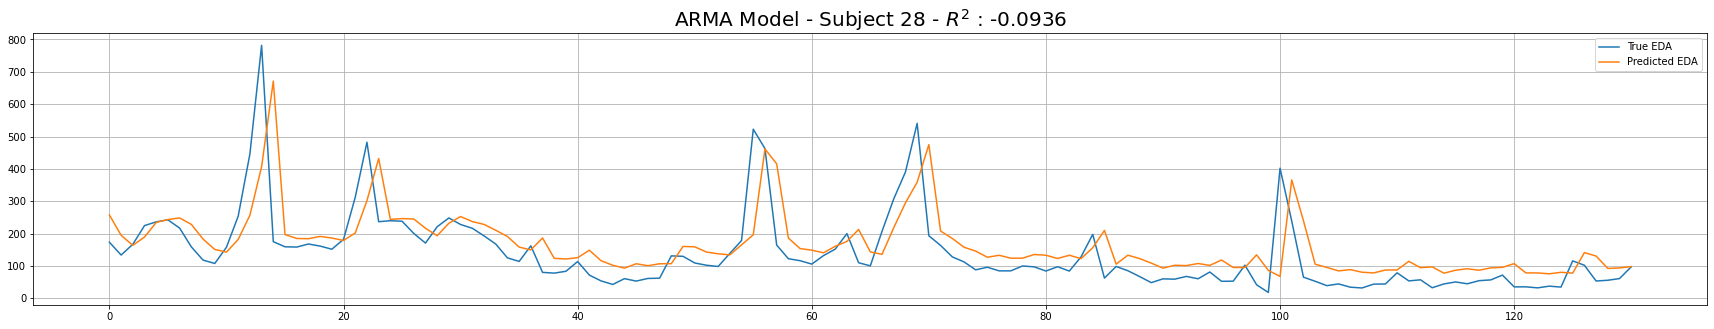

Reading C:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-29\eeg\sub-29_task-rest_proc-EDA_epoRejected.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
567 matching events found
No baseline correction applied


C:\Users\dadam\AppData\Local\Temp/ipykernel_15176/3020609557.py:14: RuntimeWarning: This filename (C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-29/eeg/sub-29_task-rest_proc-EDA_epoRejected.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(bp,


29


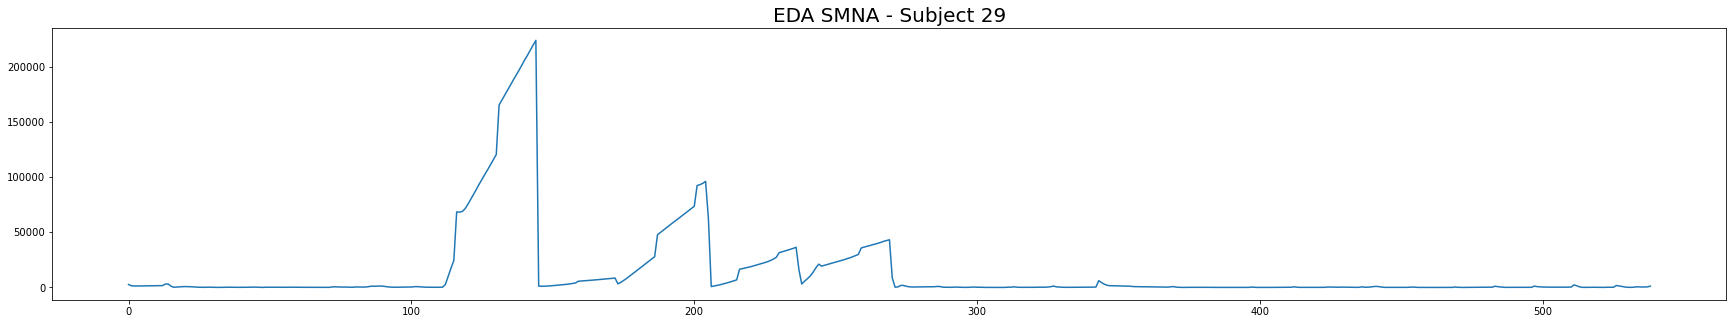

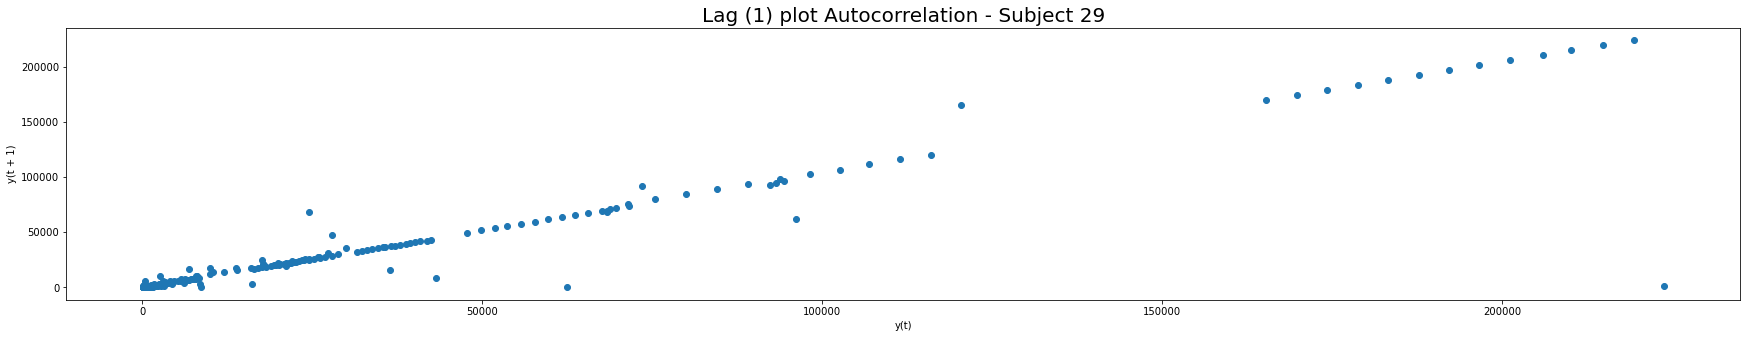

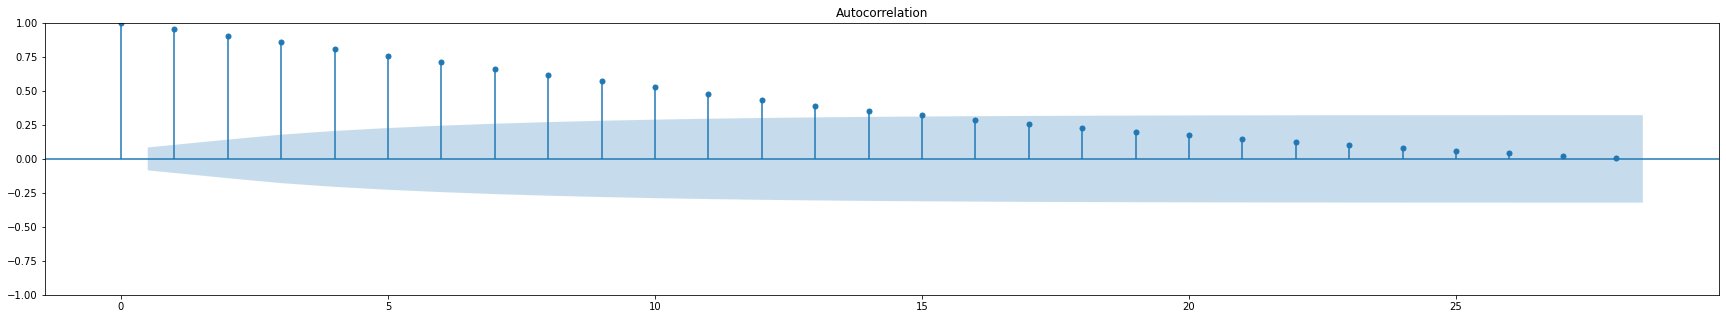

c:\Users\dadam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


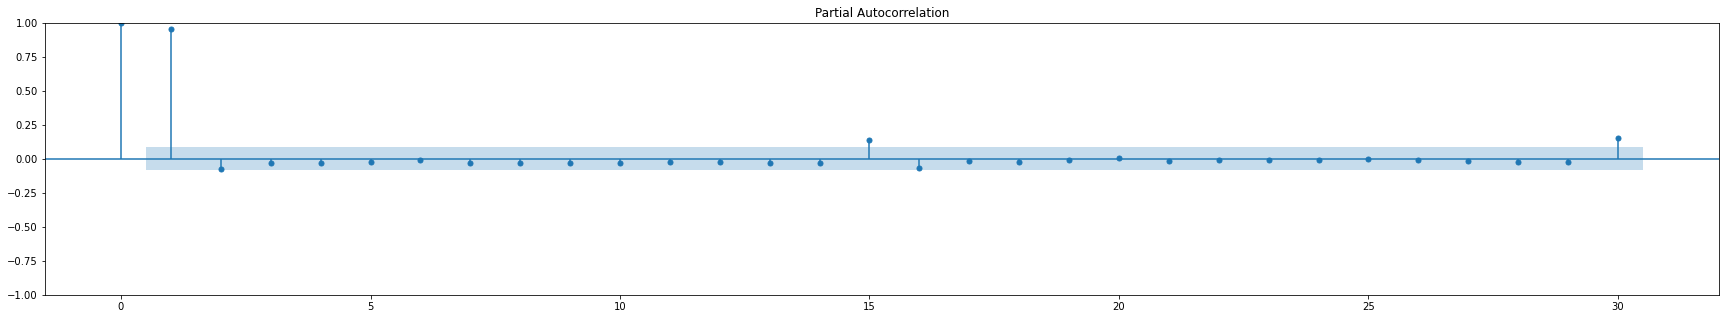

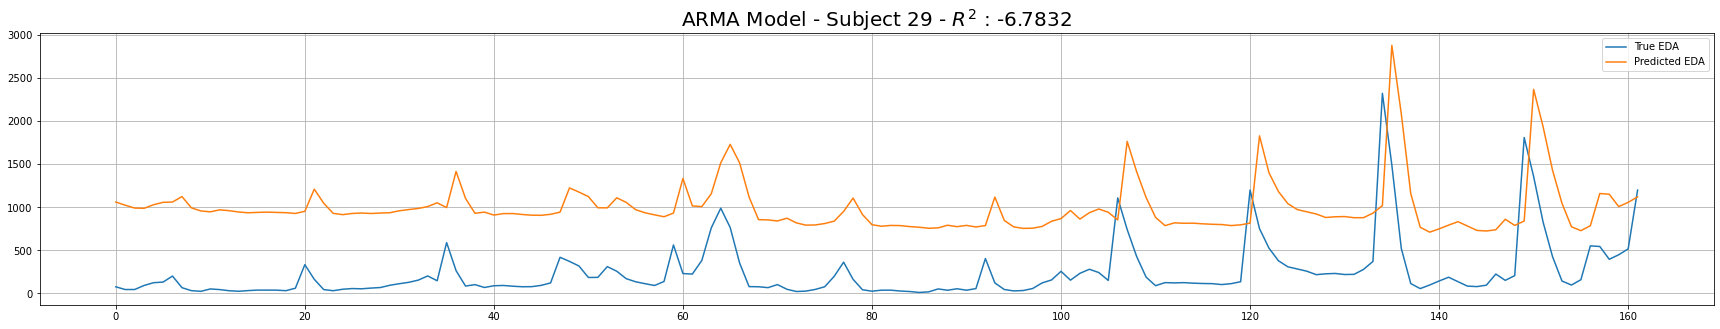

Reading C:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-30\eeg\sub-30_task-rest_proc-EDA_epoRejected.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
359 matching events found
No baseline correction applied


C:\Users\dadam\AppData\Local\Temp/ipykernel_15176/3020609557.py:14: RuntimeWarning: This filename (C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-30/eeg/sub-30_task-rest_proc-EDA_epoRejected.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(bp,


30


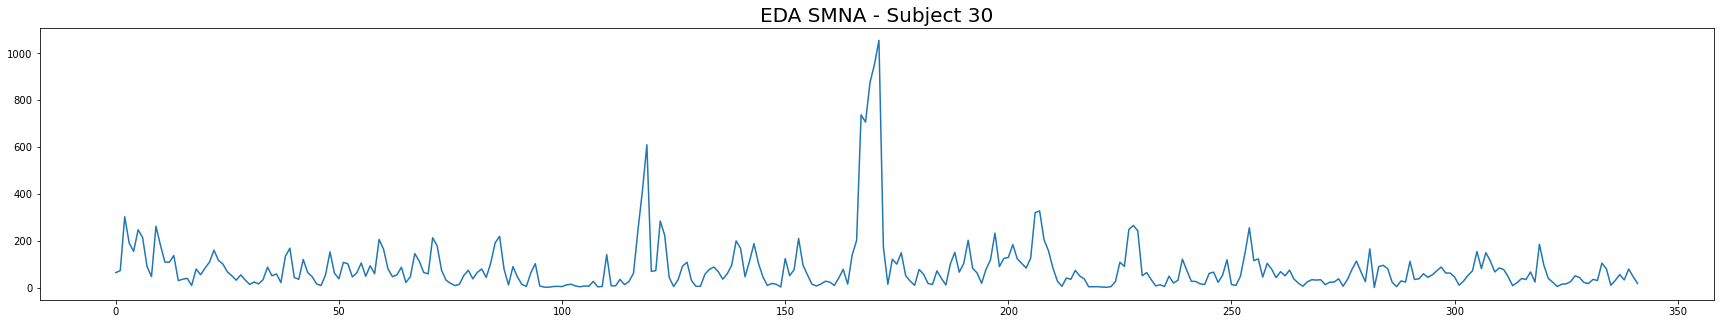

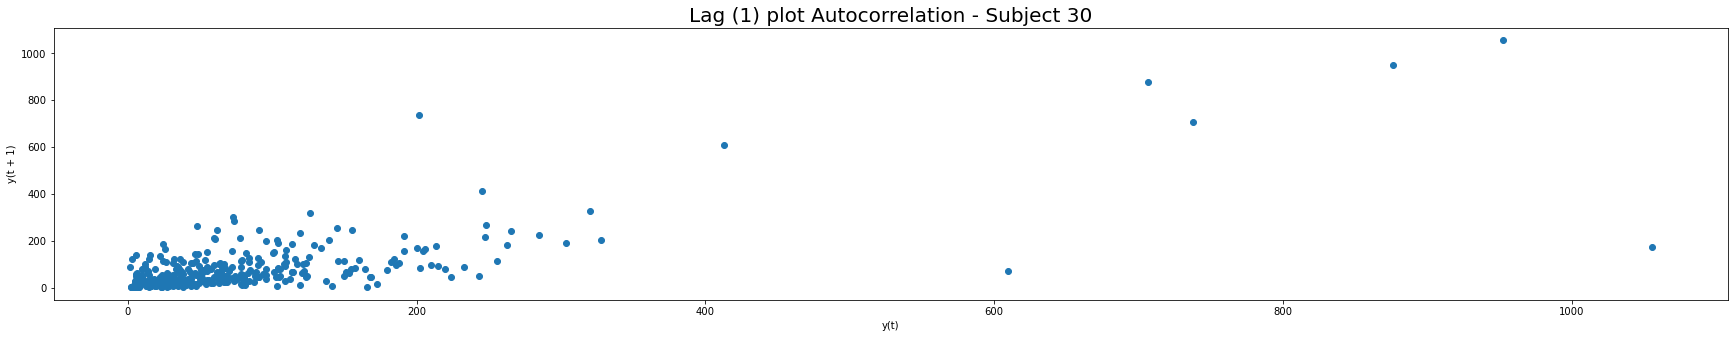

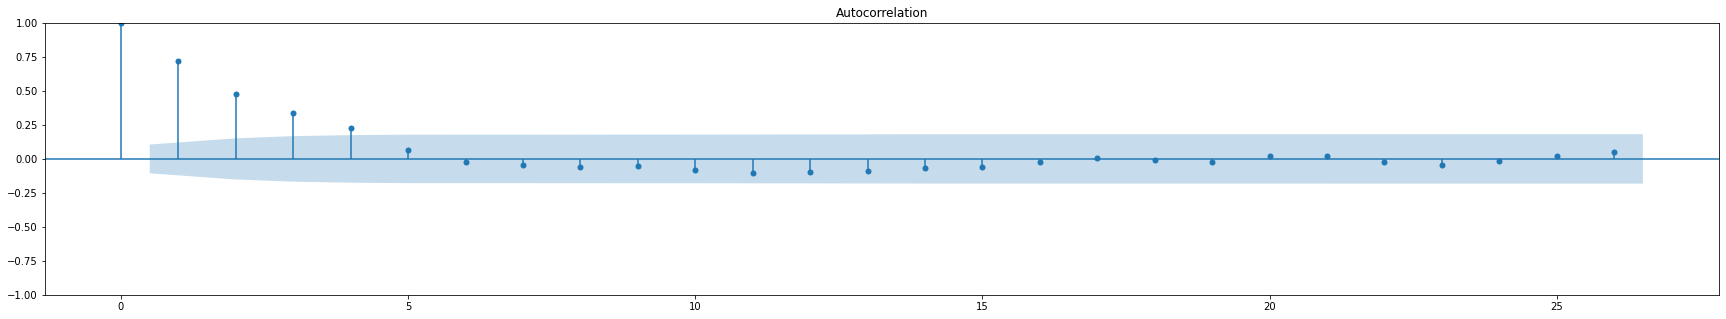

c:\Users\dadam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


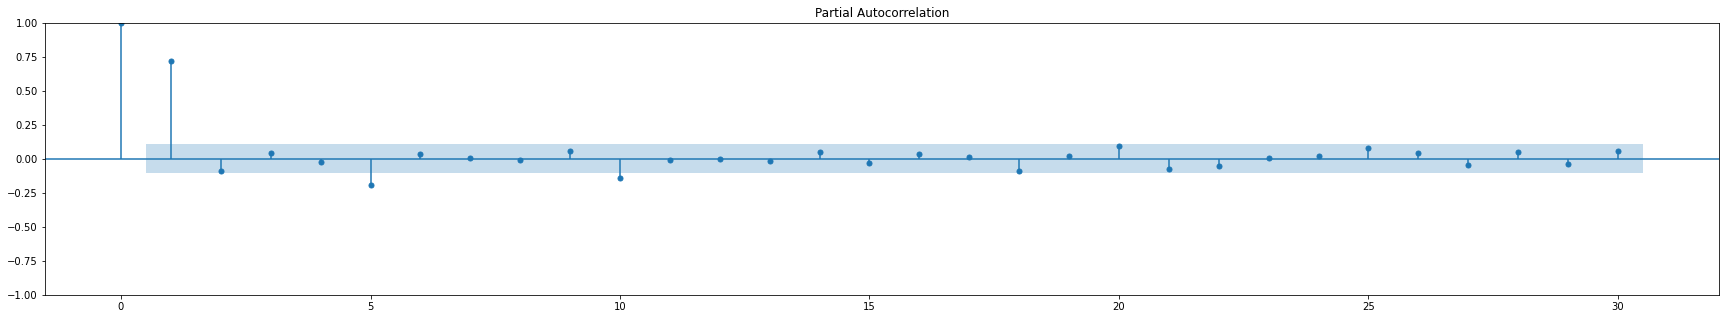

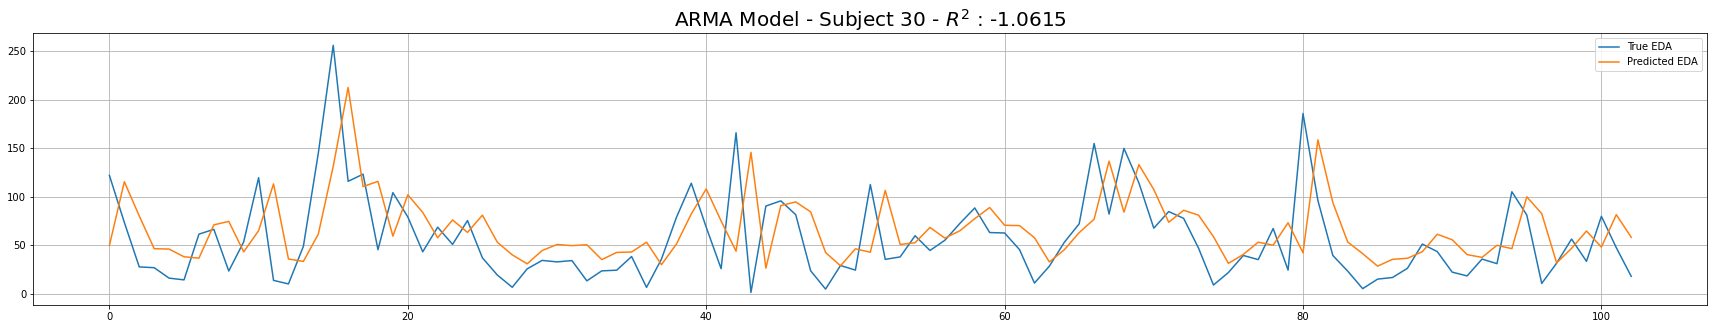

Reading C:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-31\eeg\sub-31_task-rest_proc-EDA_epoRejected.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
526 matching events found
No baseline correction applied


C:\Users\dadam\AppData\Local\Temp/ipykernel_15176/3020609557.py:14: RuntimeWarning: This filename (C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-31/eeg/sub-31_task-rest_proc-EDA_epoRejected.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(bp,


31


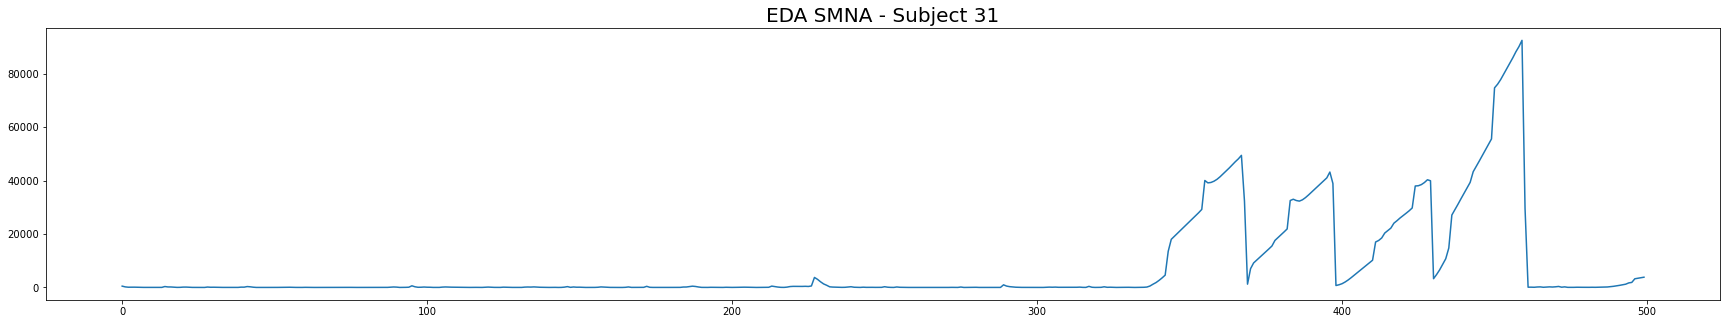

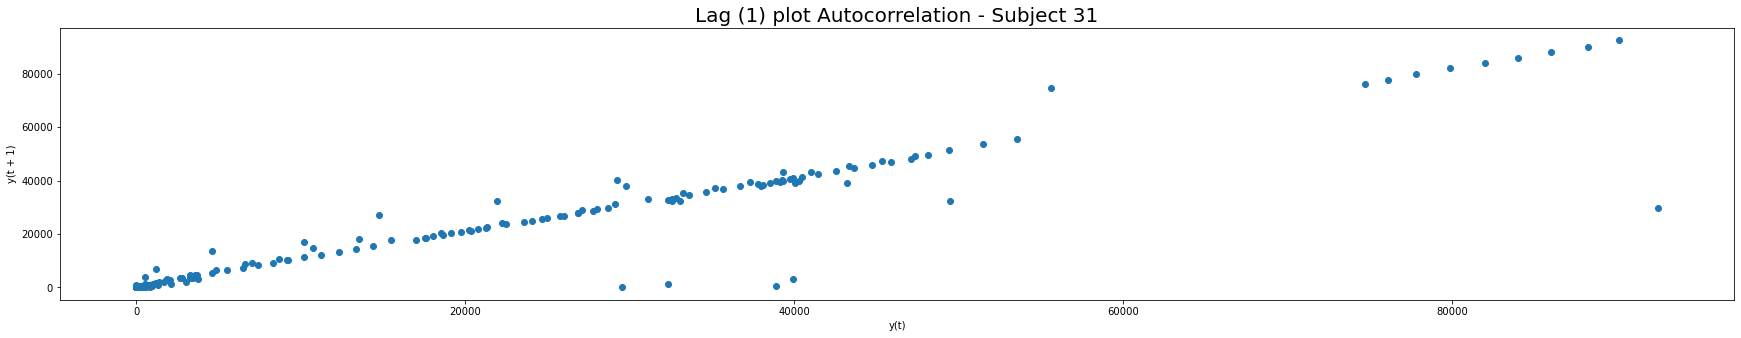

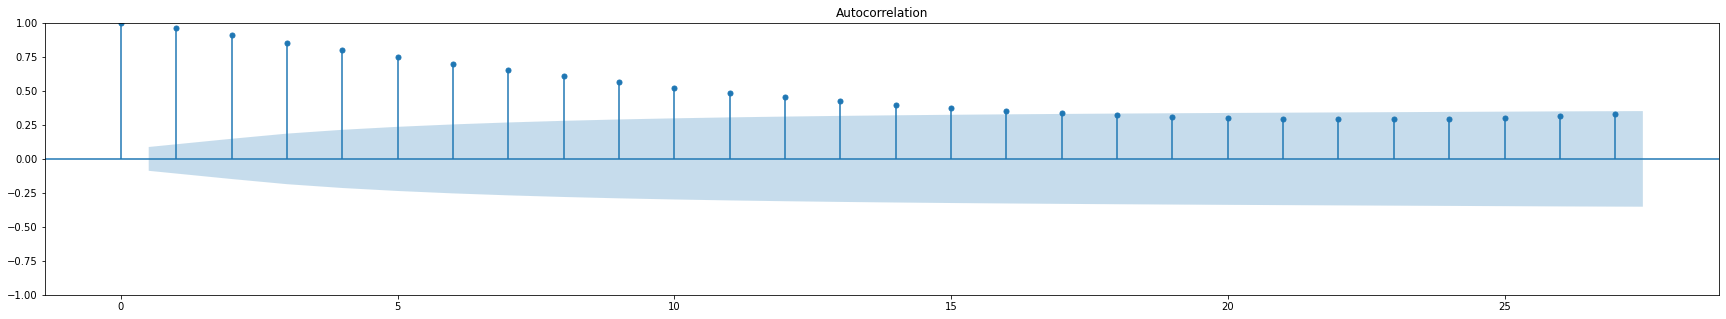

c:\Users\dadam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


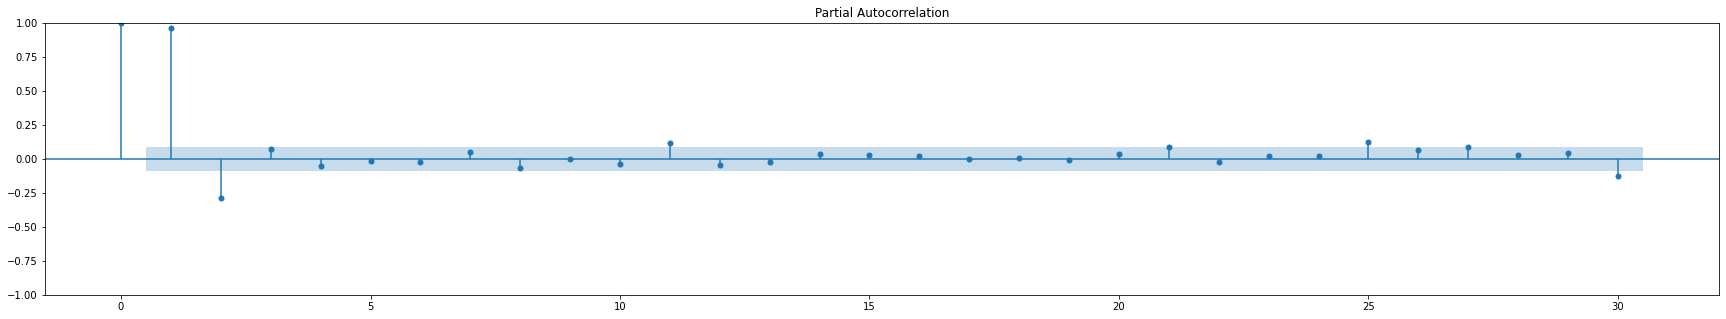

c:\Users\dadam\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


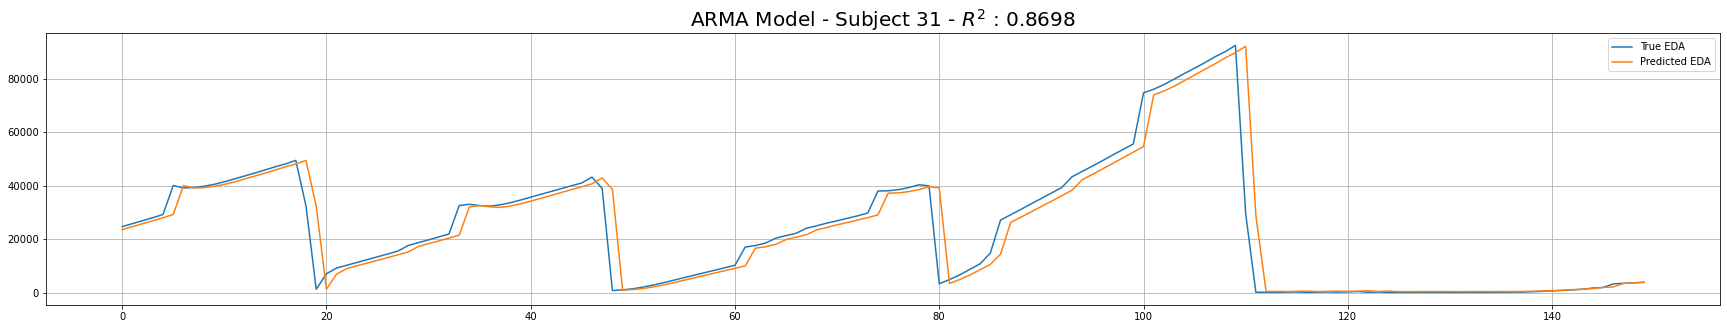

Reading C:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-32\eeg\sub-32_task-rest_proc-EDA_epoRejected.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
594 matching events found
No baseline correction applied


C:\Users\dadam\AppData\Local\Temp/ipykernel_15176/3020609557.py:14: RuntimeWarning: This filename (C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-32/eeg/sub-32_task-rest_proc-EDA_epoRejected.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(bp,


32


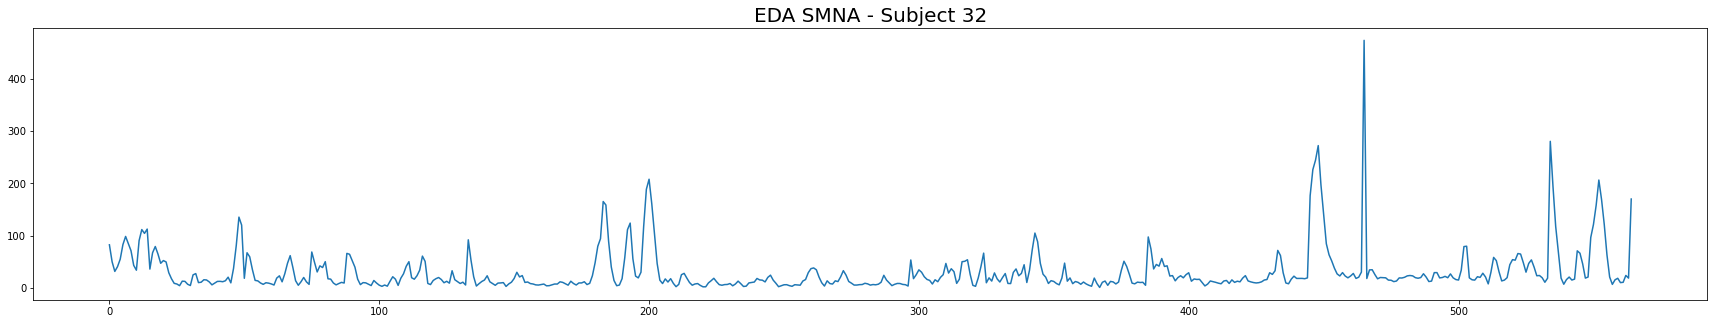

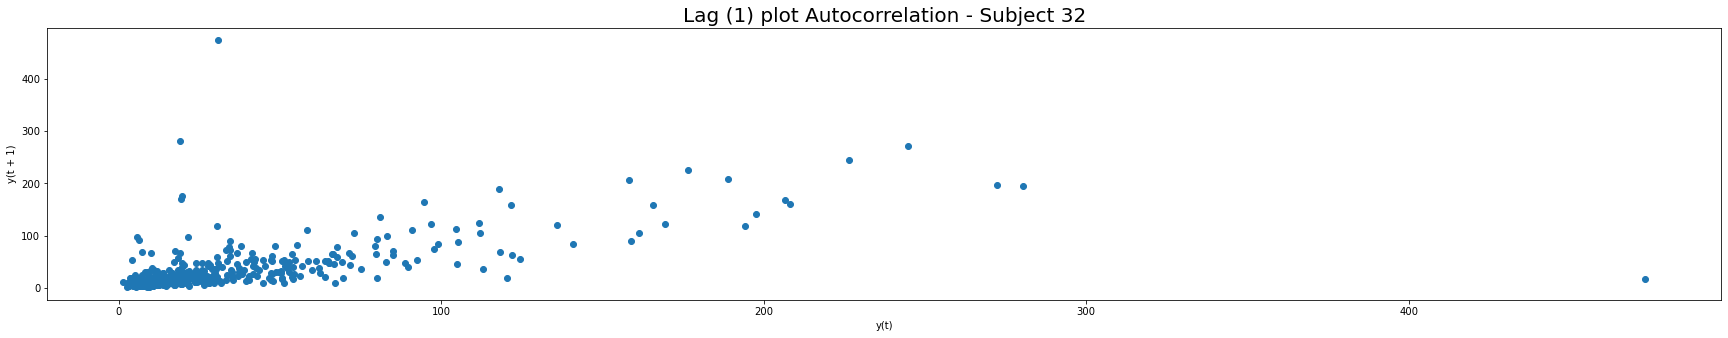

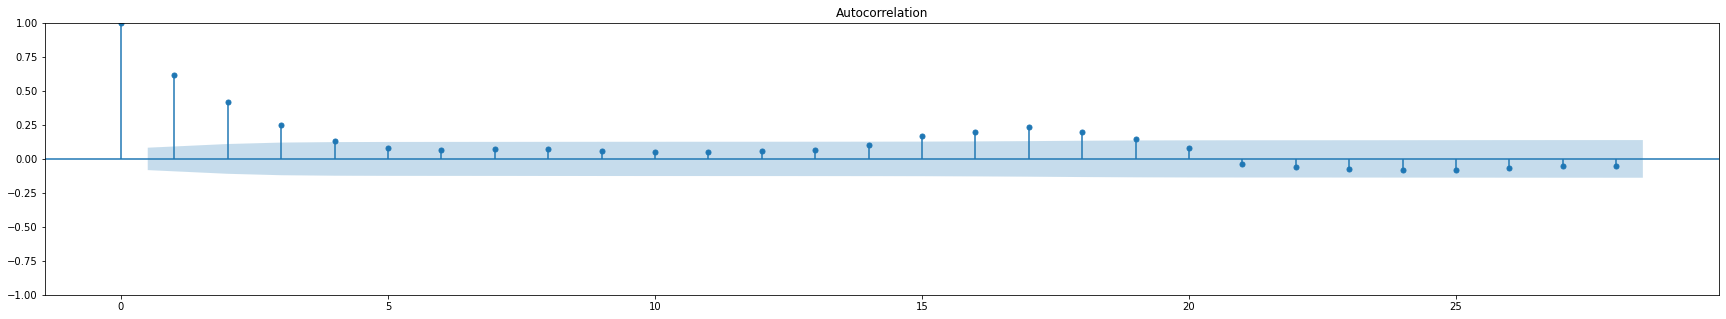

c:\Users\dadam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


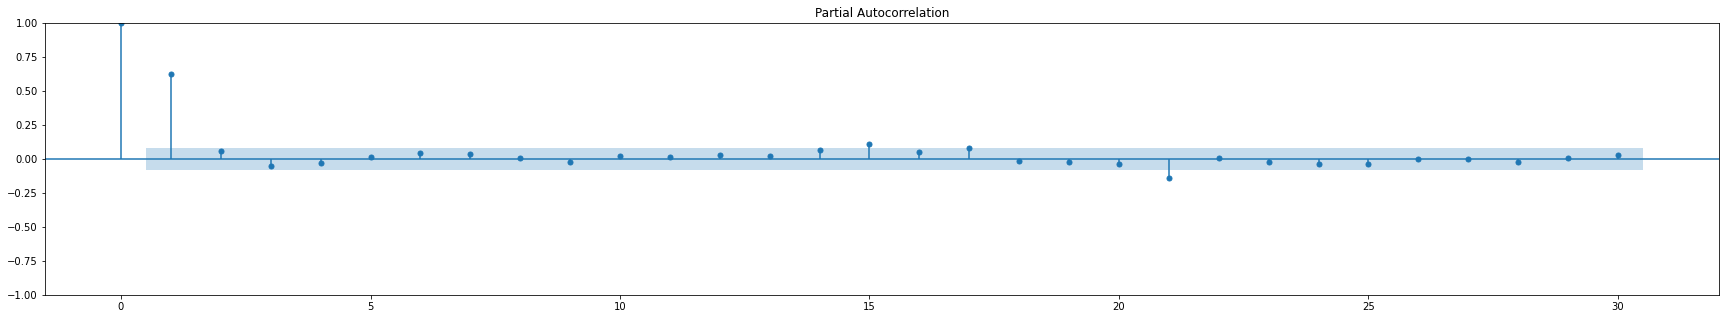

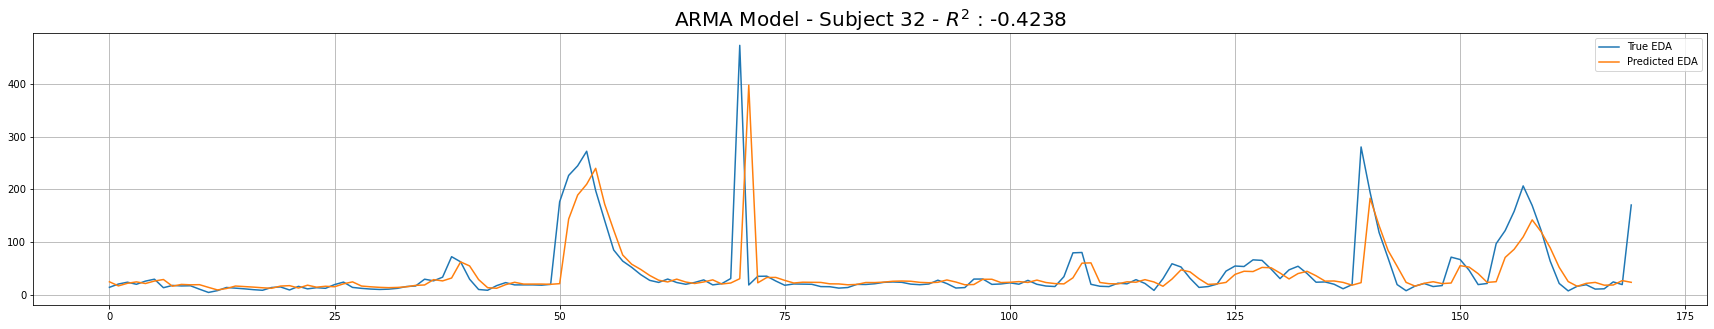

In [4]:
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import warnings
from statsmodels.tsa.arima.model import ARIMA
import sklearn.metrics as metrics

performance_r2 = []
for subject in subject_number: #['01', '02', '03', '04', '05']:
    bp = 'C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-' + subject  +'/eeg/sub-' + subject +'_task-rest_proc-EDA_epoRejected.fif'

    # read epochs

    epochs = mne.read_epochs(bp,
                            proj=False,
                            preload=True)

    epochs_eda = epochs.copy().pick_channels(ch_names=['EDA_Phasic', 'EDA_Tonic', 'EDA_SMNA', 'EDA'])


    EDA_mean = epochs.get_data().mean(axis=2) # keep 3 EDA means
    EDA_var = epochs.get_data().var(axis=2) # keep 3 EDA vars
    EDA_features_ndarray = np.hstack((EDA_mean,EDA_var))
    df_EDA_features = pd.DataFrame(EDA_features_ndarray, columns = ['meanEDA_Phasic', 'meanEDA_Tonic',
                                    'meanEDA_SMNA', 'varEDA_Phasic',
                                    'varEDA_Tonic', 'varEDA_SMNA'])
    EDA_features = df_EDA_features.to_dict(orient = 'list')
    for key, value in EDA_features.items():
        EDA_features[key] = np.array(value)

    # Plot EDA_features['meanEDA_SMNA']
    y = EDA_features['meanEDA_SMNA']
    y = y[:len(y)-int(len(y)/20)]
    print(subject)
    
    fig, ax = plt.subplots()
    ax.set_title(f'EDA SMNA - Subject {subject}', fontsize=20)      # Set the title to dog/cat/mouse.
    ax.plot(y)            # Plot the data.
   
    plt.figure()
    plt.title(f'Lag (1) plot Autocorrelation - Subject {subject}', fontsize=20)
    lag_plot(pd.DataFrame(y))
    
    #from pandas.plotting import autocorrelation_plot 
    #plt.figure()
    #autocorrelation_plot(y) 
    
    plot_acf(y) 
    plt.show() 
    
    plot_pacf(y, lags=30) 
    plt.show() 
    
    # size -> size of train set (90% of data)
    size = int(len(y) * 0.70)
    # split into train (90% data) and test set (10% data)
    train, test = y[0:size], y[size:len(y)]

    prediction = []
    train = pd.DataFrame(train)
    data = train.values

    test = pd.DataFrame(test)
    for t in test.values:
        model = ARIMA(data, order=(1,0,0)).fit()
        model_y = model.forecast(steps=len(test))[0]
        prediction.append(model_y)
        data = np.append(data, t)
    test_ = pd.DataFrame(test)
    test_['predictions_wf'] = prediction
    
    performance_r2_sub = metrics.r2_score(test_.predictions_wf, test_[0])
    performance_r2.append(performance_r2_sub)

    plt.plot(test_[0], label='True EDA')
    plt.plot(test_.predictions_wf, label='Predicted EDA')
    
    plt.title(f'ARMA Model - Subject {subject} - $R^2$ : %.4f'% performance_r2_sub, fontsize=20)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    
    


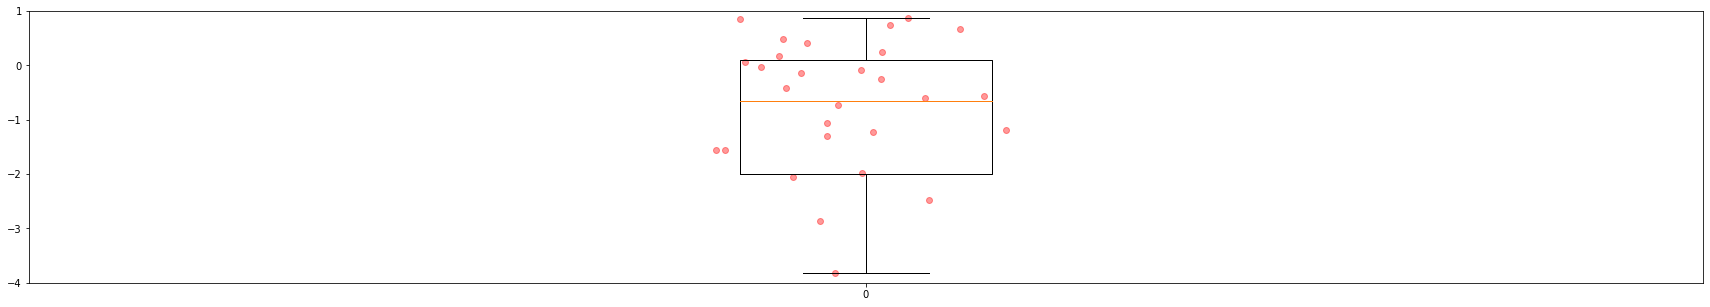

In [5]:
df_performance_r2 = pd.DataFrame(performance_r2)
vals, names, xs = [],[],[]
for i, col in enumerate(df_performance_r2.columns):
    vals.append(df_performance_r2[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df_performance_r2[col].values.shape[0]))  # adds jitter to the data points - can be adjusted
    
plt.boxplot(vals, labels=names)
palette = ['r', 'g', 'b', 'y']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, color=c)
plt.ylim(-4,1)
plt.show()

#### Conclusiones
- Como era de espear, hay estructura en los datos: relacion lineal entre t y t+1 de EDA SMNA (lag 1 plot)
- Al ver el autocorrelation plot (autocorrelation function, **ACF**), se observa que las correlaciones signficativas son en las primeras ventanas (~5 ventanas para la mayoria de los sujetos), mientras que de relación a las autocorrelaciones parciales (**PACF**), parece que los dos primeros términos de las correlaciones son significativos positivos mientras que el tercero también suele serlo de forma negativa.
- No parece haber patrones estacionales en la señal
- La mayor parte de los R2 dan positivos para los modelos de forecasting AR(1)

In [6]:
# Implementar AutoReg model (pag 124 del libro Machine Learning for Time Series Forcating)

import seaborn as sns 
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics
 
# Apply AutoReg model 
model = AutoReg(y, 1)
results = model.fit() 
results.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  565
Model:                     AutoReg(1)   Log Likelihood               -2772.488
Method:               Conditional MLE   S.D. of innovations             33.010
Date:                Tue, 22 Nov 2022   AIC                           5550.976
Time:                        09:51:40   BIC                           5563.981
Sample:                             1   HQIC                          5556.052
                                  565                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5135      1.725      6.675      0.000       8.133      14.894
y.L1           0.6322      0.033     19.110      0.000       0.567       0.697
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5819           +0.0000j            1.5819            0.0000
-----------------------------------------------------------------------------
"""

El modelo con 1 solo lag es el que tiene mayor AIC para el sujeto 32.
Ahora hay que correr lo mismo pero también para el resto de los participantes para ver si esto es así para todos.

In [7]:
for subject in ['05']:
    bp = 'C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-' + subject  +'/eeg/sub-' + subject +'_task-rest_proc-EDA_epoRejected.fif'

    # read epochs

    epochs = mne.read_epochs(bp,
                            proj=False,
                            preload=True)

    epochs_eda = epochs.copy().pick_channels(ch_names=['EDA_Phasic', 'EDA_Tonic', 'EDA_SMNA', 'EDA'])


    EDA_mean = epochs.get_data().mean(axis=2) # keep 3 EDA means
    EDA_var = epochs.get_data().var(axis=2) # keep 3 EDA vars
    EDA_features_ndarray = np.hstack((EDA_mean,EDA_var))
    df_EDA_features = pd.DataFrame(EDA_features_ndarray, columns = ['meanEDA_Phasic', 'meanEDA_Tonic',
                                    'meanEDA_SMNA', 'varEDA_Phasic',
                                    'varEDA_Tonic', 'varEDA_SMNA'])
    EDA_features = df_EDA_features.to_dict(orient = 'list')
    for key, value in EDA_features.items():
        EDA_features[key] = np.array(value)

    # Plot EDA_features['meanEDA_SMNA']
    y = EDA_features['meanEDA_SMNA']
    y = y[:len(y)-int(len(y)/20)]


Reading C:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-05\eeg\sub-05_task-rest_proc-EDA_epoRejected.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
568 matching events found
No baseline correction applied


C:\Users\dadam\AppData\Local\Temp/ipykernel_15176/3880795704.py:6: RuntimeWarning: This filename (C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-05/eeg/sub-05_task-rest_proc-EDA_epoRejected.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(bp,


Fit autoregressive(1) model for subject 3 -> (ARMA(1,0))

In [8]:
from statsmodels.tsa.arima_model import ARMA

# Instantiate the model
model = ARMA(y, order=(1, 0))

# Fit the model
results = model.fit()

# Print summary
print(results.summary())

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


### Forecast with AR(1) model
`order=(1, 0, 0))` corresponde a AR(1), difference 0 y MA(0)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

arima = SARIMAX(y, exog=None, order=(1, 0, 0))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=100).predicted_mean

# Print forecast
print(arima_value_forecast)

[1.93711899e+02 1.59444847e+02 1.31239533e+02 1.08023655e+02
 8.89145951e+01 7.31858708e+01 6.02395104e+01 4.95833223e+01
 4.08121818e+01 3.35926296e+01 2.76501945e+01 2.27589583e+01
 1.87329671e+01 1.54191615e+01 1.26915583e+01 1.04464598e+01
 8.59851249e+00 7.07746150e+00 5.82547986e+00 4.79497000e+00
 3.94675423e+00 3.24858528e+00 2.67392032e+00 2.20091186e+00
 1.81157718e+00 1.49111463e+00 1.22734093e+00 1.01022802e+00
 8.31521720e-01 6.84428029e-01 5.63354770e-01 4.63699007e-01
 3.81672048e-01 3.14155411e-01 2.58582264e-01 2.12839839e-01
 1.75189112e-01 1.44198685e-01 1.18690372e-01 9.76944022e-02
 8.04125564e-02 6.61878171e-02 5.44793914e-02 4.48421510e-02
 3.69097094e-02 3.03804929e-02 2.50062751e-02 2.05827403e-02
 1.69417154e-02 1.39447770e-02 1.14779879e-02 9.44756636e-03
 7.77632029e-03 6.40071263e-03 5.26844583e-03 4.33647361e-03
 3.56936448e-03 2.93795464e-03 2.41823931e-03 1.99046005e-03
 1.63835365e-03 1.34853382e-03 1.10998225e-03 9.13629728e-04
 7.52011378e-04 6.189828

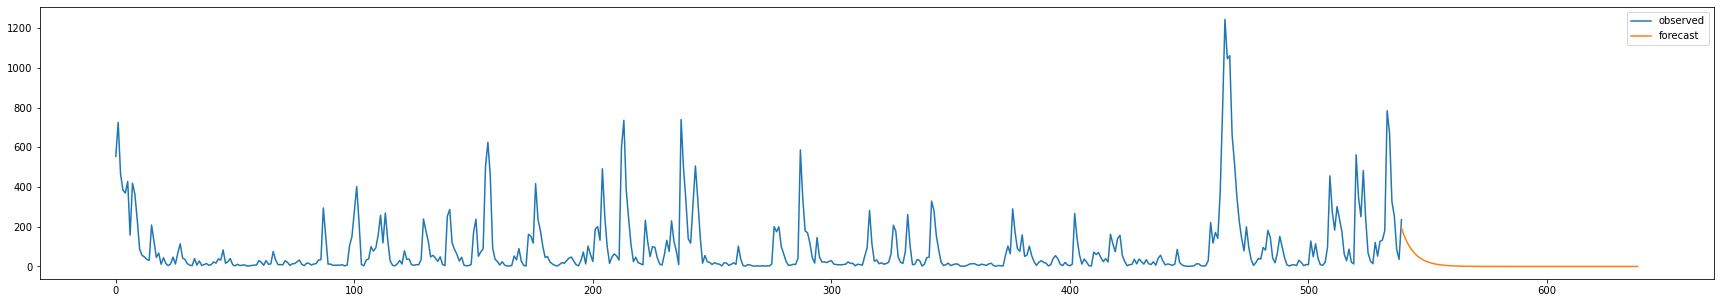

In [ ]:
y_df = pd.DataFrame(y)

plt.plot(y_df.index[:], y_df.iloc[0:][0], label='observed');

# Plot your mean forecast
rng = range(len(y)-1, len(y)+99)
plt.plot(rng, pd.DataFrame(arima_value_forecast).values, label='forecast');

# Shade the area between your confidence limits
# plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink');

# set labels, legends
#plt.xlabel('Date');
#plt.ylabel('Amazon Stock Price - Close USD');
plt.legend();
#plt.savefig('../images/arima_forecast.png')

Implement ARIMA with walk-forward validation for all subjects

https://sarit-maitra.medium.com/take-time-series-a-level-up-with-walk-forward-validation-217c33114f68


In [ ]:
for subject in ['05']:
    bp = 'C:/Users/dadam/arousal_project/arousal_decoding_extended/outputs/DEAP-bids/derivatives/mne-bids-pipeline/sub-' + subject  +'/eeg/sub-' + subject +'_task-rest_proc-EDA_epoRejected.fif'

    # read epochs

    epochs = mne.read_epochs(bp,
                            proj=False,
                            preload=True)

    epochs_eda = epochs.copy().pick_channels(ch_names=['EDA_Phasic', 'EDA_Tonic', 'EDA_SMNA', 'EDA'])


    EDA_mean = epochs.get_data().mean(axis=2) # keep 3 EDA means
    EDA_var = epochs.get_data().var(axis=2) # keep 3 EDA vars
    EDA_features_ndarray = np.hstack((EDA_mean,EDA_var))
    df_EDA_features = pd.DataFrame(EDA_features_ndarray, columns = ['meanEDA_Phasic', 'meanEDA_Tonic',
                                    'meanEDA_SMNA', 'varEDA_Phasic',
                                    'varEDA_Tonic', 'varEDA_SMNA'])
    EDA_features = df_EDA_features.to_dict(orient = 'list')
    for key, value in EDA_features.items():
        EDA_features[key] = np.array(value)

    # Plot EDA_features['meanEDA_SMNA']
    y = EDA_features['meanEDA_SMNA']
    y = y[:len(y)-int(len(y)/20)]

In [ ]:
import warnings
from math import sqrt

# size -> size of train set (90% of data)
size = int(len(y) * 0.70)
# split into train (90% data) and test set (10% data)
train, test = y[0:size], y[size:len(y)]
print(len(train), len(test)) # 2377, 265
print(len(y))


378 162
540


In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

prediction = []
train = pd.DataFrame(train)
data = train.values
#print(len(data))
#print(data)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
test = pd.DataFrame(test)
print(len(test))
for t in test.values:
   model = ARIMA(data, order=(1,0,0)).fit()
   model_y = model.forecast(steps=len(test))[0]
   print(model_y)
   prediction.append(model_y)
   data = np.append(data, t)

162
144.62742333356084
86.74377383491661
78.0653684124443
134.83485271837526
60.58520709286296
64.8678890900761
95.73043417297782
62.50168589561369
41.49909549415292
29.516173073669215
40.26468811387563
45.30214657925221
39.316268435522
36.751939810646476
26.883000308266276
31.79184110265227
53.00478497960006
62.52101462824241
50.90125570580591
31.676356373981008
28.36724091344375
38.79327024087058
29.932139930361075
27.076224789735534
32.62022404094519
208.13247689197726
121.41128758186542
65.64371326246243
33.25540921150297
50.47698363713012
39.9869490489505
27.401979021868037
26.434281738337503
74.27431063393118
66.05712891531891
72.75497747824805
55.27788685703486
41.52216637446115
51.69558245112296
40.05728440937209
135.72709645319048
102.77112927933159
75.80015313250719
120.85998122125798
132.00714030616388
62.312348022685086
41.45516131615291
27.25498948823543
31.031000681400485
31.750188832538903
49.39647781831681
33.730824567907945
50.17864921596473
41.09085156004965
32.687905

In [ ]:
test_ = pd.DataFrame(test)
test_['predictions_wf'] = prediction
print(test_)

              0  predictions_wf
0     88.992446      144.627423
1     76.354853       86.743774
2    158.982581       78.065368
3     50.780398      134.834853
4     57.061111       60.585207
..          ...             ...
157  326.033052      538.888098
158  254.384903      269.758941
159   85.379335      215.365202
160   35.742100       87.057352
161  235.343446       49.425858

[162 rows x 2 columns]


In [ ]:
test_.head()

0  predictions_wf
0   88.992446      144.627423
1   76.354853       86.743774
2  158.982581       78.065368
3   50.780398      134.834853
4   57.061111       60.585207

In [ ]:
test_.shape

(162, 2)

In [ ]:
test_[0]

0       88.992446
1       76.354853
2      158.982581
3       50.780398
4       57.061111
          ...    
157    326.033052
158    254.384903
159     85.379335
160     35.742100
161    235.343446
Name: 0, Length: 162, dtype: float64

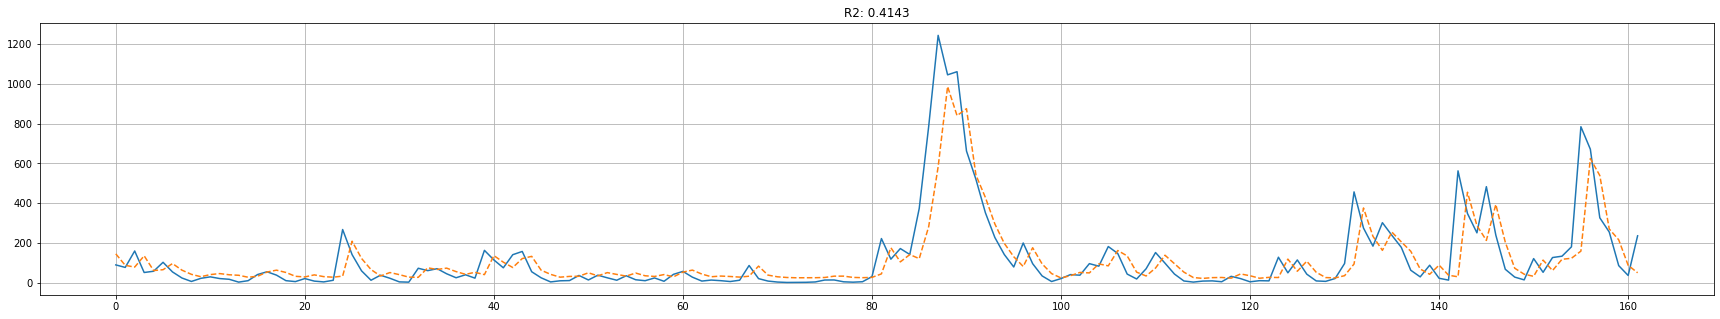

In [ ]:
import sklearn.metrics as metrics
plt.plot(test_[0])
plt.plot(test_.predictions_wf, '--')
plt.title('R2: %.4f'% metrics.r2_score(test_.predictions_wf, test_[0]))
plt.grid(True)
plt.show()
#error = sqrt(mean_squared_error(test.values, prediction))
#print ('Test RMSE for ARIMA with Walk-Forward Validation: ', error)

Implement ARIMAX model (endog variable -> EEG)

In [ ]:
import sklearn.metrics as metrics
metrics.r2_score(test_.predictions_wf, test_[0])

-0.14025189646075065

In [ ]:
test_[0]

0      298.229043
1      144.699798
2       45.825560
3       49.143528
4      110.239248
          ...    
139    122.244886
140     35.345547
141     47.870139
142     53.015400
143     59.859012
Name: 0, Length: 144, dtype: float64